In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataIncu/'
npz_name = 'Incucyte48.npz'
npz_val_name = 'Incucyte48Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd38SMALL.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 38
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 48
imagey = 48

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=38, epochs=250, gridx=1, gridy=1, imagex=48, imagey=48, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteresnetd38SMALL.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataSMALL/', npz_name='Incucyte64.npz', npz_val_name='Incucyte64Val.npz', residual=True, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 4059
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
number of  images:	 214
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
(4059, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4059 samples, validate on 214 samples
Epoch 1/250
4059/4059 [==============================] - 20s 5ms/step - loss: 3.1856 - acc: 0.1619 - val_loss: 3.0215 - val_acc: 0.2710

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 3.0214635612808656, 'val_acc': 0.2710280384972831, 'loss': 3.185580106814174, 'acc': 0.16186252848712585, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

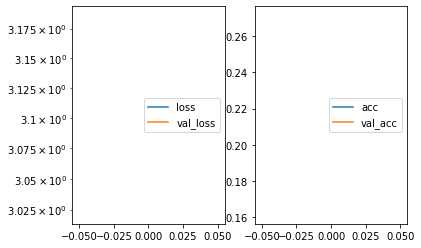

Predicted cell: Normal Probability: [[0.6574007]]
True Cell type: Cells
x [[0.4325553]]
True positional value x 0.5
y [[0.39576164]]
True positional value y 0.5


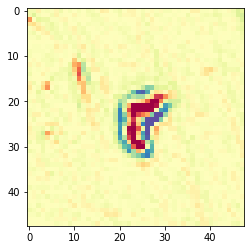

Epoch 2/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.9657 - acc: 0.2387 - val_loss: 2.8124 - val_acc: 0.2477

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.8123805144122827, 'val_acc': 0.24766355669387033, 'loss': 2.9657063077723165, 'acc': 0.23872875017863127, 'lr': 1e-06}


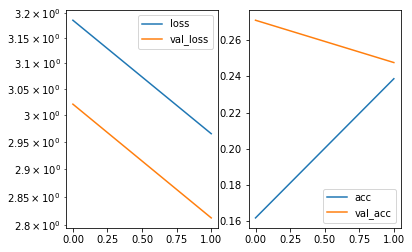

Predicted cell: Normal Probability: [[0.59069264]]
True Cell type: Cells
x [[0.75812924]]
True positional value x 0.7083333333333334
y [[0.49899745]]
True positional value y 0.5


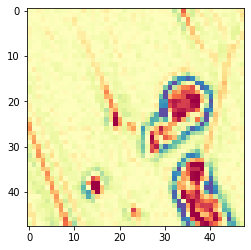

Epoch 3/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.7361 - acc: 0.2754 - val_loss: 2.5610 - val_acc: 0.3645

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.561019621162771, 'val_acc': 0.36448598660041237, 'loss': 2.7361148553224703, 'acc': 0.27543730240468467, 'lr': 1e-06}


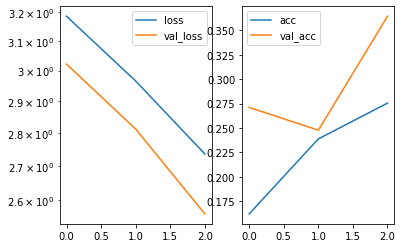

Predicted cell: Cells Probability: [[0.5203364]]
True Cell type: Cells
x [[0.53906053]]
True positional value x 0.2916666666666667
y [[0.22134028]]
True positional value y 0.2916666666666667


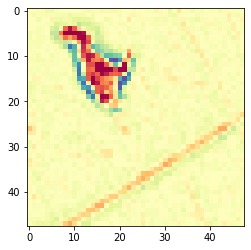

Epoch 4/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.5650 - acc: 0.3856 - val_loss: 2.4224 - val_acc: 0.4299

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.4224134694750066, 'val_acc': 0.42990654066344286, 'loss': 2.5649639845305576, 'acc': 0.3855629462522073, 'lr': 1e-06}


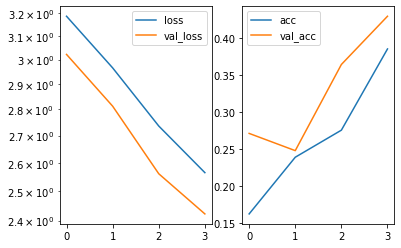

Predicted cell: Cells Probability: [[0.73015577]]
True Cell type: Cells
x [[0.8206068]]
True positional value x 0.7083333333333334
y [[0.27590942]]
True positional value y 0.2916666666666667


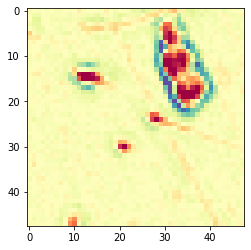

Epoch 5/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.4299 - acc: 0.4297 - val_loss: 2.3107 - val_acc: 0.5654

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.310667490290704, 'val_acc': 0.5654205540630305, 'loss': 2.42988446229313, 'acc': 0.42966247547668435, 'lr': 1e-06}


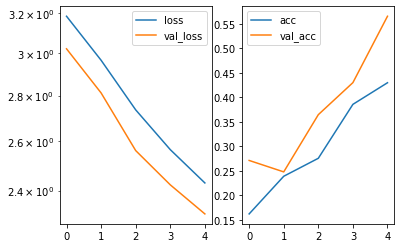

Predicted cell: Cells Probability: [[0.76655924]]
True Cell type: Normal
x [[0.26905385]]
True positional value x 0.5
y [[0.48117313]]
True positional value y 0.5


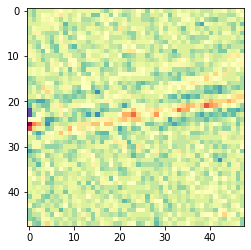

Epoch 6/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.3227 - acc: 0.5477 - val_loss: 2.2316 - val_acc: 0.6636

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.2315881920752125, 'val_acc': 0.6635514191377943, 'loss': 2.3226938210675563, 'acc': 0.5476718384017202, 'lr': 1e-06}


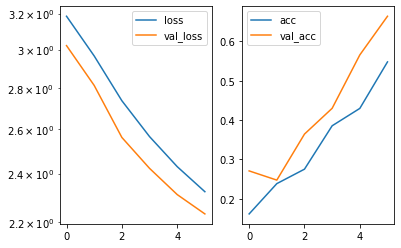

Predicted cell: Cells Probability: [[0.93094504]]
True Cell type: Cells
x [[0.4492389]]
True positional value x 0.2916666666666667
y [[0.31987843]]
True positional value y 0.2916666666666667


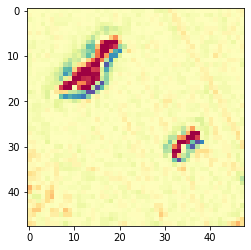

Epoch 7/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.2401 - acc: 0.6255 - val_loss: 2.1852 - val_acc: 0.7103

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.1852052234043584, 'val_acc': 0.7102803743888284, 'loss': 2.24005948718941, 'acc': 0.6255235299009148, 'lr': 1e-06}


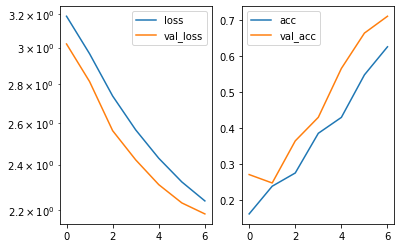

Predicted cell: Cells Probability: [[0.9396314]]
True Cell type: Cells
x [[0.7760855]]
True positional value x 0.7083333333333334
y [[0.383783]]
True positional value y 0.5


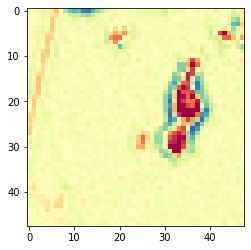

Epoch 8/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.1829 - acc: 0.7157 - val_loss: 2.1502 - val_acc: 0.7804

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.1502298874275705, 'val_acc': 0.7803738295474899, 'loss': 2.1828964015596988, 'acc': 0.715693524051811, 'lr': 1e-06}


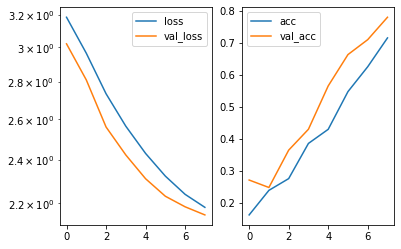

Predicted cell: Cells Probability: [[0.87664866]]
True Cell type: Cells
x [[0.40900064]]
True positional value x 0.5
y [[0.5618143]]
True positional value y 0.5


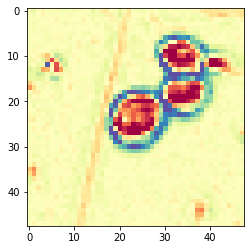

Epoch 9/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.1485 - acc: 0.7768 - val_loss: 2.1386 - val_acc: 0.8178

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.1386159725278335, 'val_acc': 0.8177570015470558, 'loss': 2.1485010004008336, 'acc': 0.7767923082380819, 'lr': 1e-06}


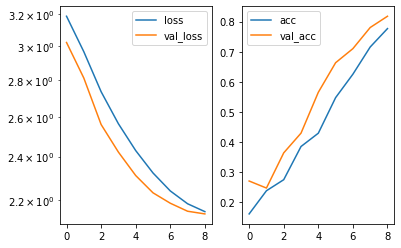

Predicted cell: Cells Probability: [[0.81734335]]
True Cell type: Normal
x [[0.4723116]]
True positional value x 0.5
y [[0.7174231]]
True positional value y 0.5


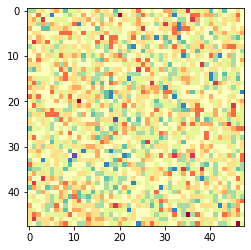

Epoch 10/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.1246 - acc: 0.8142 - val_loss: 2.1240 - val_acc: 0.8411

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.124027550777542, 'val_acc': 0.8411215014546831, 'loss': 2.124623378705262, 'acc': 0.8142399597297193, 'lr': 1e-06}


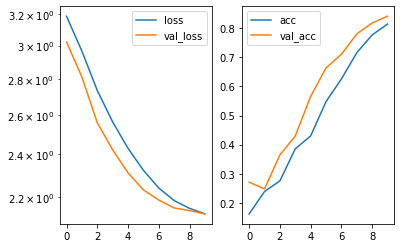

Predicted cell: Cells Probability: [[0.9606295]]
True Cell type: Cells
x [[0.34928393]]
True positional value x 0.2916666666666667
y [[0.59841746]]
True positional value y 0.7083333333333334


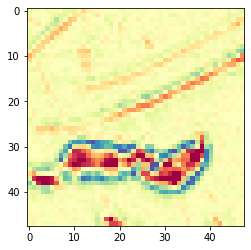

Epoch 11/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.1098 - acc: 0.8391 - val_loss: 2.1200 - val_acc: 0.8458

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.1200477486458893, 'val_acc': 0.8457943941945227, 'loss': 2.109753384323477, 'acc': 0.8391229291066773, 'lr': 1e-06}


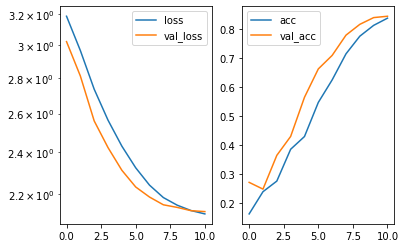

Predicted cell: Cells Probability: [[0.925903]]
True Cell type: Cells
x [[0.13840936]]
True positional value x 0.7083333333333334
y [[0.3814147]]
True positional value y 0.5


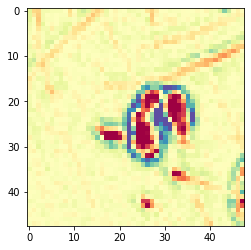

Epoch 12/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0947 - acc: 0.8482 - val_loss: 2.1083 - val_acc: 0.8505

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.108313274160724, 'val_acc': 0.8504672869343624, 'loss': 2.0946570804301787, 'acc': 0.8482384787577366, 'lr': 1e-06}


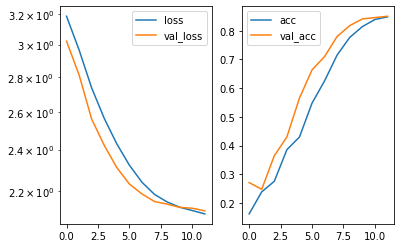

Predicted cell: Cells Probability: [[0.96678144]]
True Cell type: Cells
x [[0.61307967]]
True positional value x 0.5
y [[0.13855538]]
True positional value y 0.2916666666666667


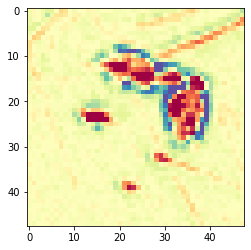

Epoch 13/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0824 - acc: 0.8522 - val_loss: 2.1017 - val_acc: 0.8505

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.101675269759704, 'val_acc': 0.8504672869343624, 'loss': 2.082351524156137, 'acc': 0.8521803408369227, 'lr': 1e-06}


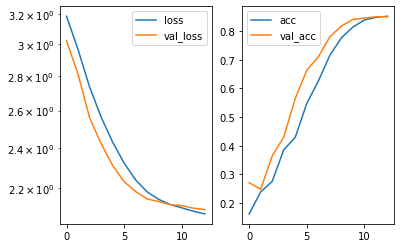

Predicted cell: Cells Probability: [[0.9799116]]
True Cell type: Cells
x [[0.4900327]]
True positional value x 0.5
y [[0.28589785]]
True positional value y 0.2916666666666667


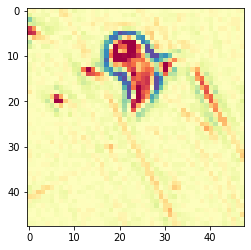

Epoch 14/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0719 - acc: 0.8569 - val_loss: 2.0949 - val_acc: 0.8505

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.094899313472142, 'val_acc': 0.8504672869343624, 'loss': 2.0719150756785187, 'acc': 0.8568612928312969, 'lr': 1e-06}


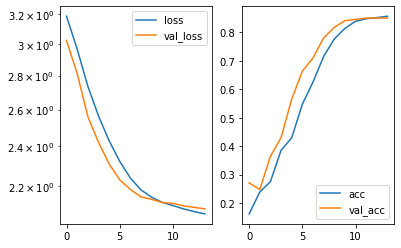

Predicted cell: Cells Probability: [[0.9351638]]
True Cell type: Cells
x [[0.6104488]]
True positional value x 0.7083333333333334
y [[0.39686972]]
True positional value y 0.2916666666666667


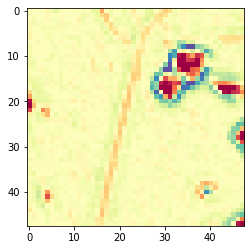

Epoch 15/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0625 - acc: 0.8581 - val_loss: 2.0893 - val_acc: 0.8505

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0893158177349056, 'val_acc': 0.8504672869343624, 'loss': 2.0625464844568575, 'acc': 0.8580931259893261, 'lr': 1e-06}


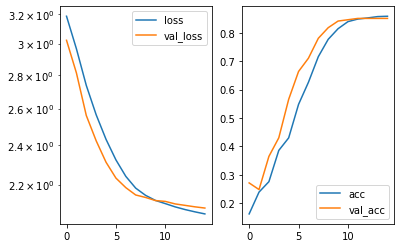

Predicted cell: Cells Probability: [[0.9481469]]
True Cell type: Cells
x [[0.65605366]]
True positional value x 0.7083333333333334
y [[0.6896106]]
True positional value y 0.5


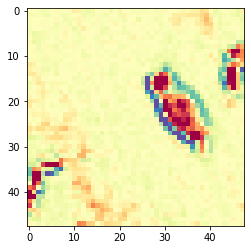

Epoch 16/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0538 - acc: 0.8620 - val_loss: 2.0852 - val_acc: 0.8505

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.085186599571014, 'val_acc': 0.8504672869343624, 'loss': 2.0537738963047487, 'acc': 0.8620349866000558, 'lr': 1e-06}


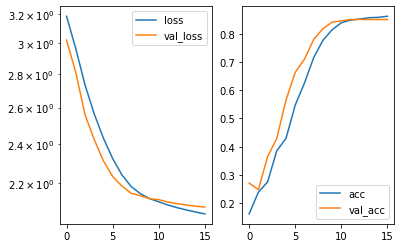

Predicted cell: Cells Probability: [[0.8555028]]
True Cell type: Normal
x [[0.2800103]]
True positional value x 0.5
y [[0.4903268]]
True positional value y 0.5


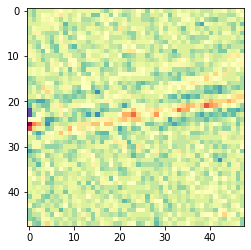

Epoch 17/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0448 - acc: 0.8628 - val_loss: 2.0804 - val_acc: 0.8505

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0804411897035404, 'val_acc': 0.8504672869343624, 'loss': 2.0447919772275713, 'acc': 0.8627740765446129, 'lr': 1e-06}


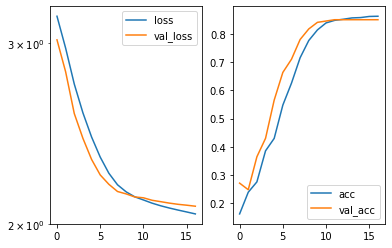

Predicted cell: Cells Probability: [[0.93635565]]
True Cell type: Cells
x [[0.6110743]]
True positional value x 0.7083333333333334
y [[0.38256317]]
True positional value y 0.2916666666666667


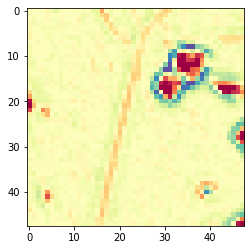

Epoch 18/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0363 - acc: 0.8643 - val_loss: 2.0768 - val_acc: 0.8551

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0768236434348277, 'val_acc': 0.8551401796742021, 'loss': 2.0362739925403317, 'acc': 0.8642522802667743, 'lr': 1e-06}


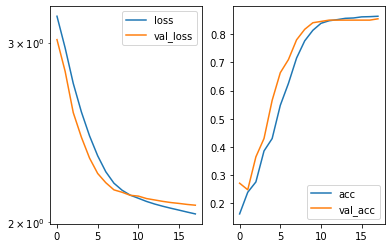

Predicted cell: Cells Probability: [[0.94248515]]
True Cell type: Cells
x [[0.88036484]]
True positional value x 0.7083333333333334
y [[0.2722573]]
True positional value y 0.2916666666666667


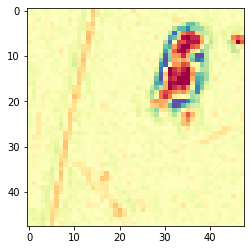

Epoch 19/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0268 - acc: 0.8667 - val_loss: 2.0730 - val_acc: 0.8551

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.073034756651549, 'val_acc': 0.8551401796742021, 'loss': 2.026811518966344, 'acc': 0.8667159403565776, 'lr': 1e-06}


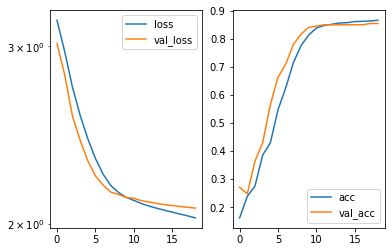

Predicted cell: Cells Probability: [[0.55626434]]
True Cell type: Cells
x [[0.5494606]]
True positional value x 0.5
y [[0.4644208]]
True positional value y 0.2916666666666667


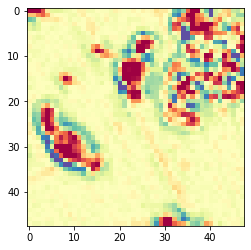

Epoch 20/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0208 - acc: 0.8667 - val_loss: 2.0695 - val_acc: 0.8551

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0694824991939225, 'val_acc': 0.8551401796742021, 'loss': 2.020780849909072, 'acc': 0.8667159395048729, 'lr': 1e-06}


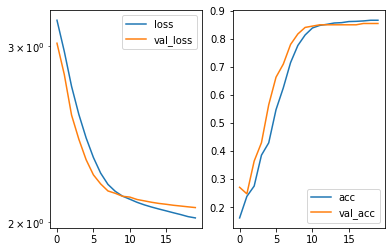

Predicted cell: Cells Probability: [[0.9254139]]
True Cell type: Cells
x [[0.2880481]]
True positional value x 0.2916666666666667
y [[0.81622547]]
True positional value y 0.7083333333333334


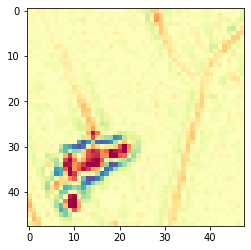

Epoch 21/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0124 - acc: 0.8677 - val_loss: 2.0656 - val_acc: 0.8551

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0656368364797575, 'val_acc': 0.8551401796742021, 'loss': 2.0124392464819376, 'acc': 0.8677014038168641, 'lr': 1e-06}


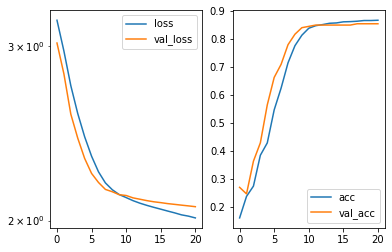

Predicted cell: Cells Probability: [[0.9780694]]
True Cell type: Cells
x [[0.7464827]]
True positional value x 0.5
y [[0.44793138]]
True positional value y 0.7083333333333334


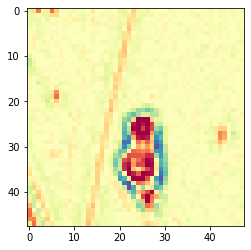

Epoch 22/250
4059/4059 [==============================] - 9s 2ms/step - loss: 2.0040 - acc: 0.8694 - val_loss: 2.0622 - val_acc: 0.8505

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.062218857702808, 'val_acc': 0.8504672869343624, 'loss': 2.003997004598959, 'acc': 0.8694259690134124, 'lr': 1e-06}


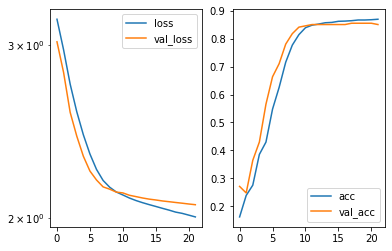

Predicted cell: Cells Probability: [[0.747958]]
True Cell type: Cells
x [[0.79834265]]
True positional value x 0.7083333333333334
y [[0.26596248]]
True positional value y 0.2916666666666667


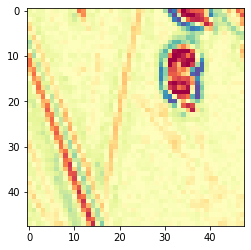

Epoch 23/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9974 - acc: 0.8687 - val_loss: 2.0594 - val_acc: 0.8551

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0593890263655474, 'val_acc': 0.8551401796742021, 'loss': 1.9973717158461592, 'acc': 0.8686868649569894, 'lr': 1e-06}


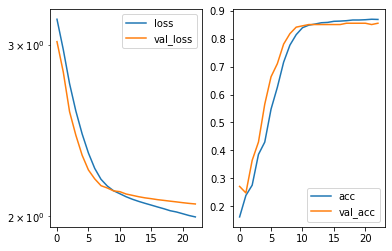

Predicted cell: Cells Probability: [[0.98008484]]
True Cell type: Cells
x [[0.18233249]]
True positional value x 0.2916666666666667
y [[0.2935491]]
True positional value y 0.2916666666666667


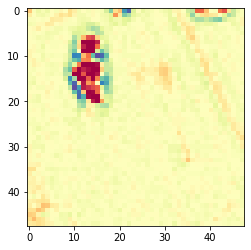

Epoch 24/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9906 - acc: 0.8682 - val_loss: 2.0552 - val_acc: 0.8505

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.05522956135117, 'val_acc': 0.8504672869343624, 'loss': 1.9905912913134252, 'acc': 0.8681941343869268, 'lr': 1e-06}


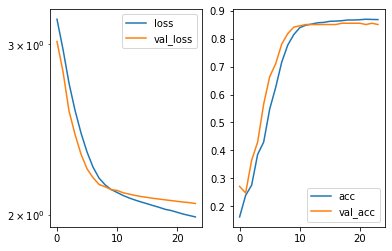

Predicted cell: Cells Probability: [[0.9511435]]
True Cell type: Cells
x [[0.31610954]]
True positional value x 0.2916666666666667
y [[0.28298926]]
True positional value y 0.5


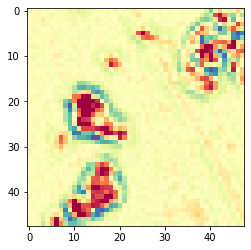

Epoch 25/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9839 - acc: 0.8694 - val_loss: 2.0533 - val_acc: 0.8505

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0533018000772065, 'val_acc': 0.8504672869343624, 'loss': 1.9839132811876905, 'acc': 0.8694259710545668, 'lr': 1e-06}


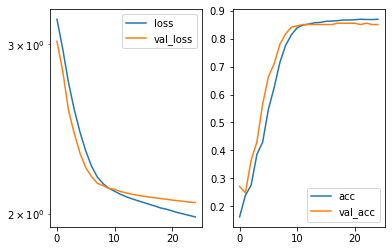

Predicted cell: Cells Probability: [[0.79519933]]
True Cell type: Normal
x [[0.27144563]]
True positional value x 0.5
y [[0.51684934]]
True positional value y 0.5


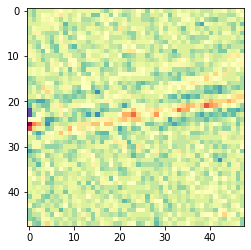

Epoch 26/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9779 - acc: 0.8692 - val_loss: 2.0494 - val_acc: 0.8505

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.049358971765108, 'val_acc': 0.8504672869343624, 'loss': 1.9778828637651047, 'acc': 0.8691795993156696, 'lr': 1e-06}


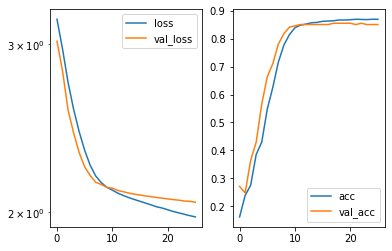

Predicted cell: Cells Probability: [[0.9673486]]
True Cell type: Cells
x [[0.25953913]]
True positional value x 0.2916666666666667
y [[0.15304857]]
True positional value y 0.2916666666666667


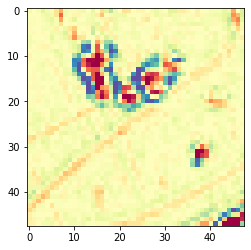

Epoch 27/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9713 - acc: 0.8719 - val_loss: 2.0476 - val_acc: 0.8505

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.047575113929321, 'val_acc': 0.8504672869343624, 'loss': 1.9713189388384635, 'acc': 0.8718896273851219, 'lr': 1e-06}


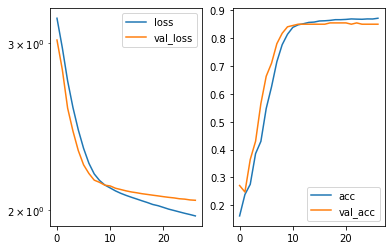

Predicted cell: Cells Probability: [[0.94375515]]
True Cell type: Cells
x [[0.5223616]]
True positional value x 0.5
y [[0.67981493]]
True positional value y 0.7083333333333334


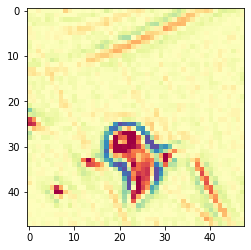

Epoch 28/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9665 - acc: 0.8721 - val_loss: 2.0445 - val_acc: 0.8505

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0445425031341125, 'val_acc': 0.8504672869343624, 'loss': 1.9664534635219588, 'acc': 0.8721359961430526, 'lr': 1e-06}


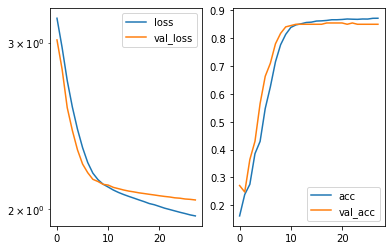

Predicted cell: Cells Probability: [[0.9497647]]
True Cell type: Cells
x [[0.72516674]]
True positional value x 0.7083333333333334
y [[0.22316985]]
True positional value y 0.2916666666666667


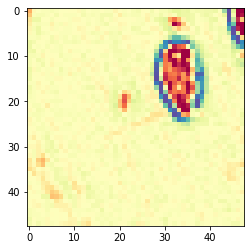

Epoch 29/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9603 - acc: 0.8716 - val_loss: 2.0433 - val_acc: 0.8505

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.043308702584739, 'val_acc': 0.8504672869343624, 'loss': 1.96025110424725, 'acc': 0.8716432632528288, 'lr': 1e-06}


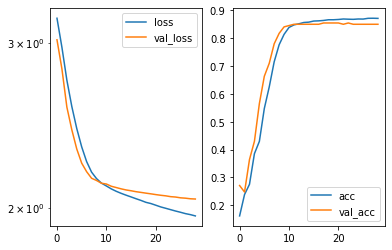

Predicted cell: Cells Probability: [[0.9506111]]
True Cell type: Cells
x [[0.28948107]]
True positional value x 0.2916666666666667
y [[0.75183356]]
True positional value y 0.7083333333333334


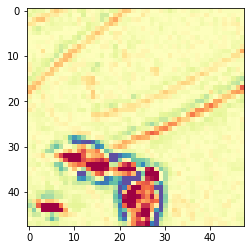

Epoch 30/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9549 - acc: 0.8724 - val_loss: 2.0402 - val_acc: 0.8505

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0402122535438183, 'val_acc': 0.8504672869343624, 'loss': 1.954895505795898, 'acc': 0.8723823605837214, 'lr': 1e-06}


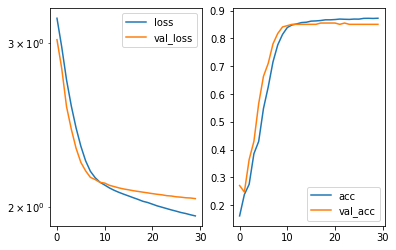

Predicted cell: Cells Probability: [[0.9459135]]
True Cell type: Normal
x [[0.78567255]]
True positional value x 0.5
y [[0.51806337]]
True positional value y 0.5


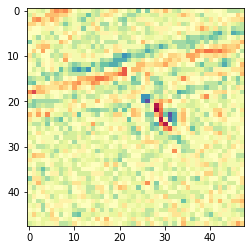

Epoch 31/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9494 - acc: 0.8736 - val_loss: 2.0376 - val_acc: 0.8505

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0375725387412813, 'val_acc': 0.8504672869343624, 'loss': 1.9493793735189313, 'acc': 0.8736141913334823, 'lr': 1e-06}


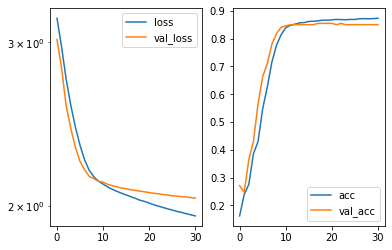

Predicted cell: Cells Probability: [[0.8662841]]
True Cell type: Cells
x [[0.7131116]]
True positional value x 0.7083333333333334
y [[0.743047]]
True positional value y 0.7083333333333334


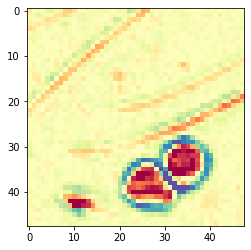

Epoch 32/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9444 - acc: 0.8734 - val_loss: 2.0356 - val_acc: 0.8505

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.035624164287175, 'val_acc': 0.8504672869343624, 'loss': 1.9443608412280933, 'acc': 0.8733678278326255, 'lr': 1e-06}


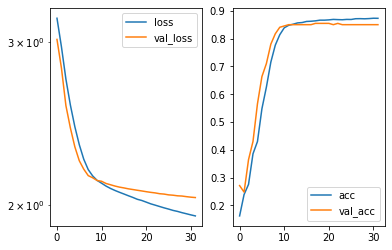

Predicted cell: Cells Probability: [[0.9415314]]
True Cell type: Cells
x [[0.72794676]]
True positional value x 0.5
y [[0.5408667]]
True positional value y 0.2916666666666667


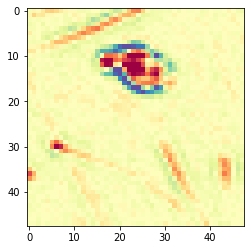

Epoch 33/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9395 - acc: 0.8766 - val_loss: 2.0328 - val_acc: 0.8505

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.03283846489737, 'val_acc': 0.8504672869343624, 'loss': 1.939495263266487, 'acc': 0.8765705834911738, 'lr': 1e-06}


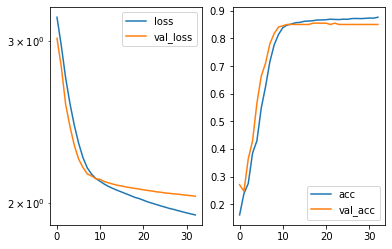

Predicted cell: Cells Probability: [[0.9425613]]
True Cell type: Cells
x [[0.20993012]]
True positional value x 0.2916666666666667
y [[0.35997042]]
True positional value y 0.5


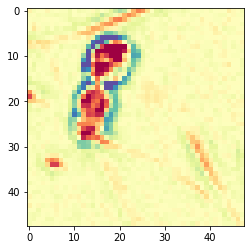

Epoch 34/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9343 - acc: 0.8736 - val_loss: 2.0318 - val_acc: 0.8505

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0318183642681515, 'val_acc': 0.8504672869343624, 'loss': 1.9343310841846773, 'acc': 0.873614191641858, 'lr': 1e-06}


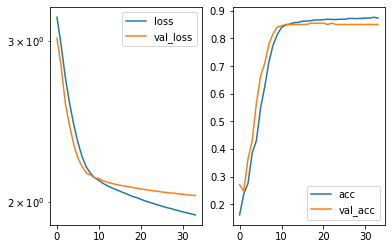

Predicted cell: Cells Probability: [[0.8832526]]
True Cell type: Cells
x [[0.7828219]]
True positional value x 0.7083333333333334
y [[0.28647777]]
True positional value y 0.2916666666666667


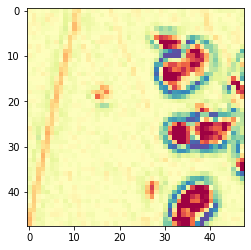

Epoch 35/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9302 - acc: 0.8756 - val_loss: 2.0290 - val_acc: 0.8505

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0289920802428343, 'val_acc': 0.8504672869343624, 'loss': 1.9302482632000066, 'acc': 0.8755851153171423, 'lr': 1e-06}


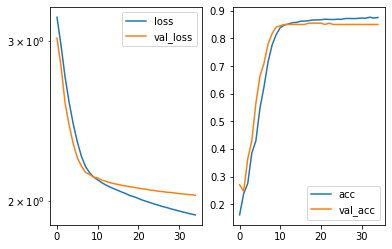

Predicted cell: Cells Probability: [[0.9425645]]
True Cell type: Cells
x [[0.6448148]]
True positional value x 0.5
y [[0.23242782]]
True positional value y 0.2916666666666667


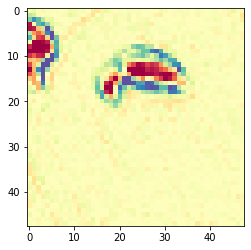

Epoch 36/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9245 - acc: 0.8756 - val_loss: 2.0273 - val_acc: 0.8505

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0273415396146683, 'val_acc': 0.8504672869343624, 'loss': 1.924511618818606, 'acc': 0.8755851168296525, 'lr': 1e-06}


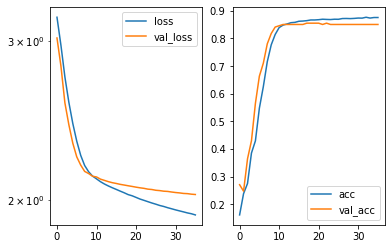

Predicted cell: Cells Probability: [[0.96704334]]
True Cell type: Cells
x [[0.75511605]]
True positional value x 0.7083333333333334
y [[0.23369466]]
True positional value y 0.2916666666666667


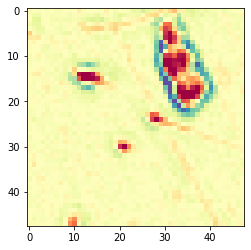

Epoch 37/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9208 - acc: 0.8773 - val_loss: 2.0244 - val_acc: 0.8505

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.024383671929903, 'val_acc': 0.8504672869343624, 'loss': 1.9208155036060703, 'acc': 0.8773096892803753, 'lr': 1e-06}


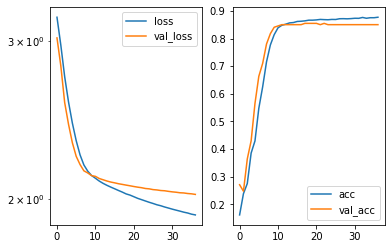

Predicted cell: Cells Probability: [[0.92203456]]
True Cell type: Normal
x [[0.8260676]]
True positional value x 0.5
y [[0.45100188]]
True positional value y 0.5


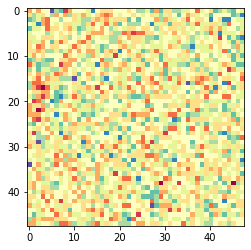

Epoch 38/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9168 - acc: 0.8793 - val_loss: 2.0236 - val_acc: 0.8551

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.023563475252312, 'val_acc': 0.8551401796742021, 'loss': 1.9167518204261176, 'acc': 0.8792806109585589, 'lr': 1e-06}


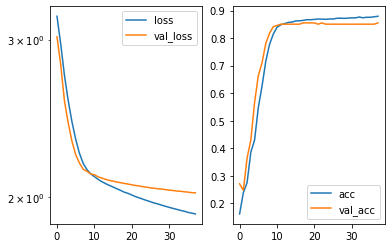

Predicted cell: Cells Probability: [[0.9617765]]
True Cell type: Cells
x [[0.20596653]]
True positional value x 0.2916666666666667
y [[0.29766497]]
True positional value y 0.2916666666666667


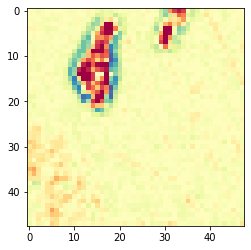

Epoch 39/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9128 - acc: 0.8773 - val_loss: 2.0204 - val_acc: 0.8505

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.020366452564703, 'val_acc': 0.8504672869343624, 'loss': 1.91279292356266, 'acc': 0.8773096816590866, 'lr': 1e-06}


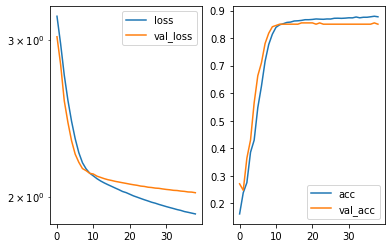

Predicted cell: Cells Probability: [[0.9391999]]
True Cell type: Cells
x [[0.6022765]]
True positional value x 0.7083333333333334
y [[0.3432384]]
True positional value y 0.2916666666666667


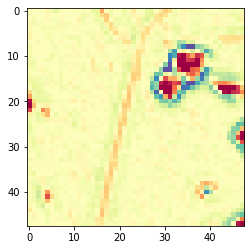

Epoch 40/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9088 - acc: 0.8795 - val_loss: 2.0206 - val_acc: 0.8551

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0205585666906054, 'val_acc': 0.8551401796742021, 'loss': 1.908793817573241, 'acc': 0.8795269794374829, 'lr': 1e-06}


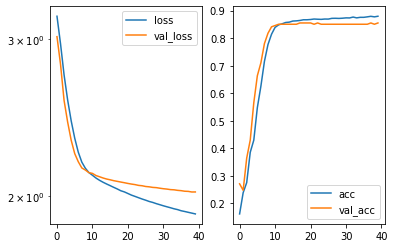

Predicted cell: Cells Probability: [[0.9862366]]
True Cell type: Cells
x [[0.4897725]]
True positional value x 0.5
y [[0.6468046]]
True positional value y 0.5


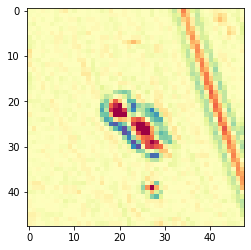

Epoch 41/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9046 - acc: 0.8788 - val_loss: 2.0169 - val_acc: 0.8505

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0168528868773272, 'val_acc': 0.8504672869343624, 'loss': 1.90456801310758, 'acc': 0.8787878786410331, 'lr': 1e-06}


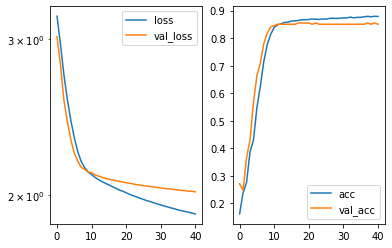

Predicted cell: Cells Probability: [[0.97679615]]
True Cell type: Cells
x [[0.5823801]]
True positional value x 0.7083333333333334
y [[0.2972995]]
True positional value y 0.2916666666666667


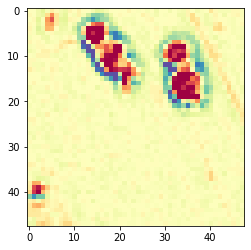

Epoch 42/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.9013 - acc: 0.8785 - val_loss: 2.0170 - val_acc: 0.8551

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.017043332073176, 'val_acc': 0.8551401796742021, 'loss': 1.9012802839572867, 'acc': 0.8785415121592098, 'lr': 1e-06}


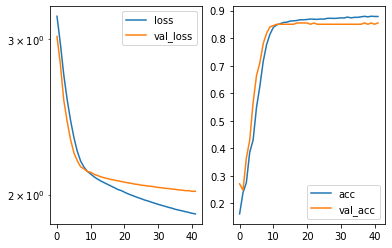

Predicted cell: Cells Probability: [[0.9569445]]
True Cell type: Cells
x [[0.6354032]]
True positional value x 0.5
y [[0.16314703]]
True positional value y 0.2916666666666667


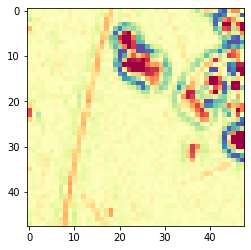

Epoch 43/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8970 - acc: 0.8808 - val_loss: 2.0132 - val_acc: 0.8505

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.013236351102312, 'val_acc': 0.8504672869343624, 'loss': 1.8969990022078498, 'acc': 0.880758808762841, 'lr': 1e-06}


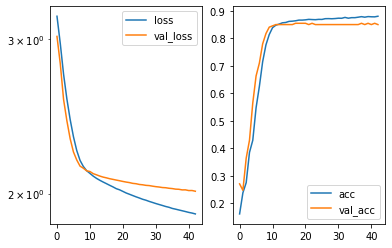

Predicted cell: Cells Probability: [[0.955674]]
True Cell type: Cells
x [[0.32988614]]
True positional value x 0.2916666666666667
y [[0.27638546]]
True positional value y 0.5


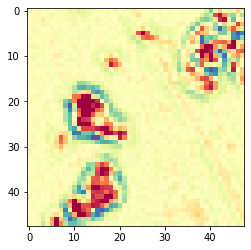

Epoch 44/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8925 - acc: 0.8810 - val_loss: 2.0128 - val_acc: 0.8551

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.012806243985613, 'val_acc': 0.8551401796742021, 'loss': 1.8924781409176914, 'acc': 0.8810051722783824, 'lr': 1e-06}


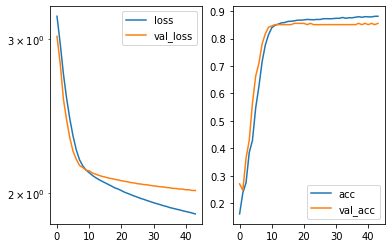

Predicted cell: Cells Probability: [[0.9454475]]
True Cell type: Cells
x [[0.72188085]]
True positional value x 0.5
y [[0.544702]]
True positional value y 0.2916666666666667


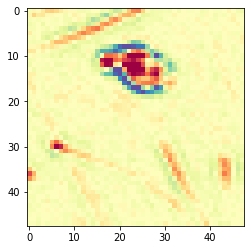

Epoch 45/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8886 - acc: 0.8822 - val_loss: 2.0100 - val_acc: 0.8505

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.009999678513714, 'val_acc': 0.8504672869343624, 'loss': 1.888593647332578, 'acc': 0.8822370028078746, 'lr': 1e-06}


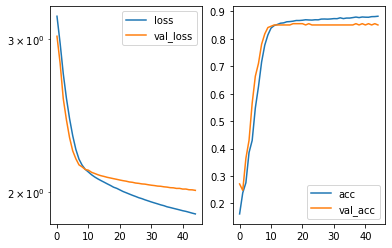

Predicted cell: Cells Probability: [[0.95269835]]
True Cell type: Cells
x [[0.6955711]]
True positional value x 0.7083333333333334
y [[0.57667917]]
True positional value y 0.5


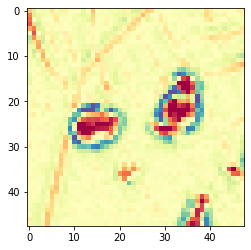

Epoch 46/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8866 - acc: 0.8815 - val_loss: 2.0105 - val_acc: 0.8551

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.010543270645855, 'val_acc': 0.8551401796742021, 'loss': 1.8865701013904805, 'acc': 0.8814979084432639, 'lr': 1e-06}


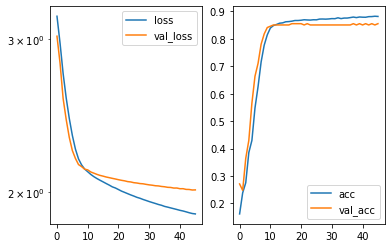

Predicted cell: Cells Probability: [[0.9797507]]
True Cell type: Cells
x [[0.39701813]]
True positional value x 0.2916666666666667
y [[0.4199901]]
True positional value y 0.2916666666666667


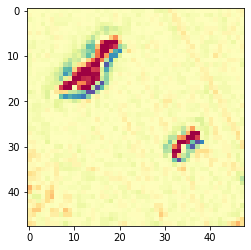

Epoch 47/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8833 - acc: 0.8827 - val_loss: 2.0070 - val_acc: 0.8551

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.006972490070022, 'val_acc': 0.8551401796742021, 'loss': 1.8832752948677813, 'acc': 0.8827297360064743, 'lr': 1e-06}


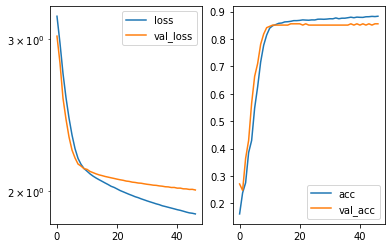

Predicted cell: Cells Probability: [[0.9683848]]
True Cell type: Cells
x [[0.27604154]]
True positional value x 0.2916666666666667
y [[0.18131867]]
True positional value y 0.2916666666666667


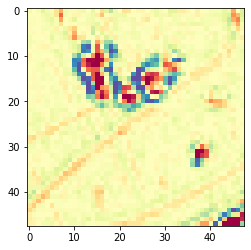

Epoch 48/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8803 - acc: 0.8830 - val_loss: 2.0066 - val_acc: 0.8551

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0066026070407617, 'val_acc': 0.8551401796742021, 'loss': 1.8803370046216181, 'acc': 0.8829761068349286, 'lr': 1e-06}


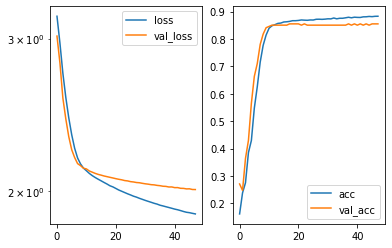

Predicted cell: Cells Probability: [[0.989263]]
True Cell type: Cells
x [[0.14774616]]
True positional value x 0.2916666666666667
y [[0.21593228]]
True positional value y 0.2916666666666667


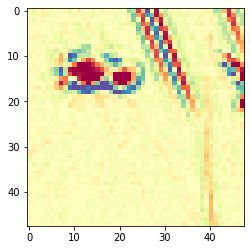

Epoch 49/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8761 - acc: 0.8827 - val_loss: 2.0043 - val_acc: 0.8551

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0042830438257377, 'val_acc': 0.8551401796742021, 'loss': 1.876090841388491, 'acc': 0.8827297333632528, 'lr': 1e-06}


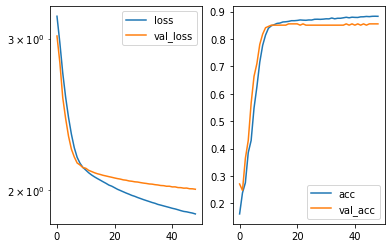

Predicted cell: Cells Probability: [[0.93583405]]
True Cell type: Cells
x [[0.28481364]]
True positional value x 0.2916666666666667
y [[0.79111904]]
True positional value y 0.7083333333333334


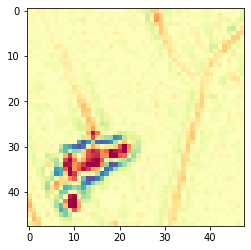

Epoch 50/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8738 - acc: 0.8837 - val_loss: 2.0034 - val_acc: 0.8598

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.003369286795643, 'val_acc': 0.8598130724140417, 'loss': 1.873821120392545, 'acc': 0.8837152059132843, 'lr': 1e-06}


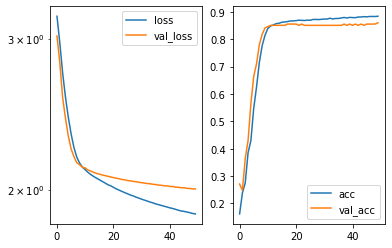

Predicted cell: Cells Probability: [[0.97302014]]
True Cell type: Cells
x [[0.1719688]]
True positional value x 0.2916666666666667
y [[0.6787821]]
True positional value y 0.7083333333333334


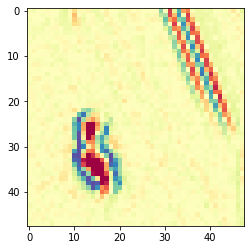

Epoch 51/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8710 - acc: 0.8845 - val_loss: 2.0017 - val_acc: 0.8551

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.0016658495519764, 'val_acc': 0.8551401796742021, 'loss': 1.870952609226192, 'acc': 0.8844542999988884, 'lr': 1e-06}


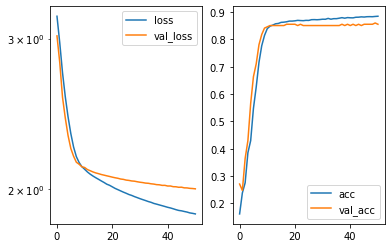

Predicted cell: Cells Probability: [[0.9542492]]
True Cell type: Cells
x [[0.12610199]]
True positional value x 0.7083333333333334
y [[0.32122874]]
True positional value y 0.5


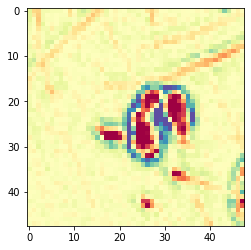

Epoch 52/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8668 - acc: 0.8869 - val_loss: 2.0000 - val_acc: 0.8598

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9999864725308998, 'val_acc': 0.8598130724140417, 'loss': 1.8668336675330963, 'acc': 0.8869179592223025, 'lr': 1e-06}


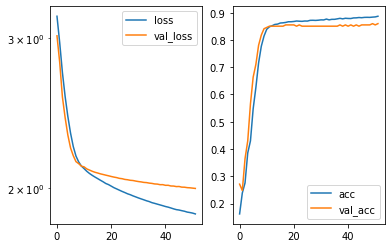

Predicted cell: Cells Probability: [[0.7380123]]
True Cell type: Cells
x [[0.5246316]]
True positional value x 0.2916666666666667
y [[0.33476374]]
True positional value y 0.5


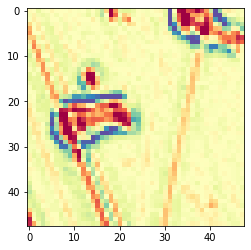

Epoch 53/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8637 - acc: 0.8867 - val_loss: 2.0001 - val_acc: 0.8598

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 2.000056623298431, 'val_acc': 0.8598130724140417, 'loss': 1.863707961135088, 'acc': 0.8866715945613651, 'lr': 1e-06}


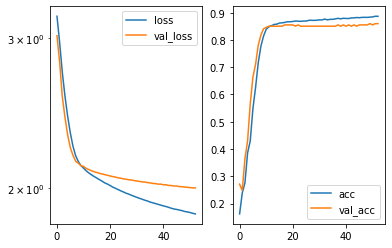

Predicted cell: Cells Probability: [[0.9476334]]
True Cell type: Cells
x [[0.21724239]]
True positional value x 0.2916666666666667
y [[0.74711126]]
True positional value y 0.7083333333333334


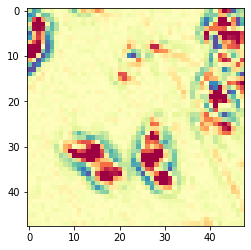

Epoch 54/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8618 - acc: 0.8854 - val_loss: 1.9971 - val_acc: 0.8598

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9971104414663583, 'val_acc': 0.8598130724140417, 'loss': 1.8618368913340844, 'acc': 0.8854397669541011, 'lr': 1e-06}


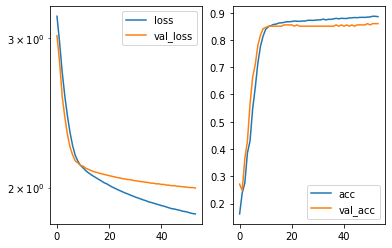

Predicted cell: Cells Probability: [[0.96201473]]
True Cell type: Cells
x [[0.24182725]]
True positional value x 0.2916666666666667
y [[0.4370098]]
True positional value y 0.2916666666666667


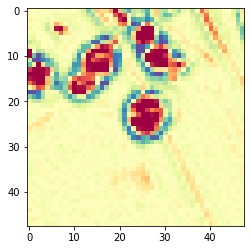

Epoch 55/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8601 - acc: 0.8891 - val_loss: 1.9968 - val_acc: 0.8598

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9968213778789912, 'val_acc': 0.8598130724140417, 'loss': 1.8600656758625833, 'acc': 0.8891352534764034, 'lr': 1e-06}


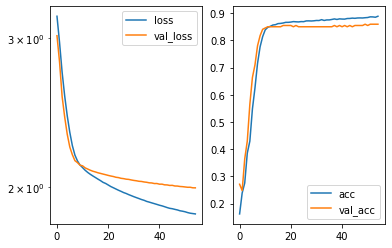

Predicted cell: Cells Probability: [[0.97646415]]
True Cell type: Cells
x [[0.59276736]]
True positional value x 0.5
y [[0.77574605]]
True positional value y 0.7083333333333334


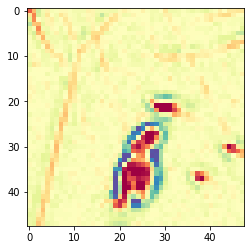

Epoch 56/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8561 - acc: 0.8886 - val_loss: 1.9949 - val_acc: 0.8598

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9948550106209015, 'val_acc': 0.8598130724140417, 'loss': 1.8560987017547652, 'acc': 0.888642522627334, 'lr': 1e-06}


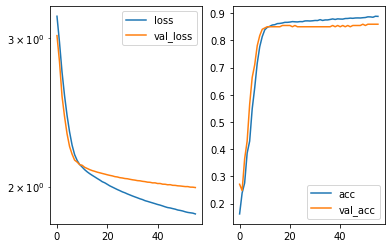

Predicted cell: Cells Probability: [[0.90583545]]
True Cell type: Cells
x [[0.3421968]]
True positional value x 0.2916666666666667
y [[0.21980083]]
True positional value y 0.2916666666666667


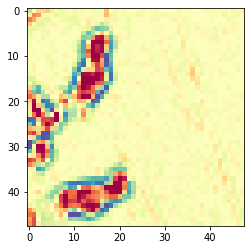

Epoch 57/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8531 - acc: 0.8896 - val_loss: 1.9935 - val_acc: 0.8551

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9935041710595105, 'val_acc': 0.855140177445991, 'loss': 1.8530977230173051, 'acc': 0.8896279834590836, 'lr': 1e-06}


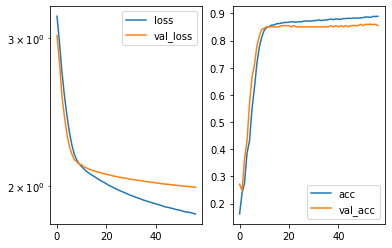

Predicted cell: Normal Probability: [[0.5190389]]
True Cell type: Normal
x [[0.5468306]]
True positional value x 0.5
y [[0.5698327]]
True positional value y 0.5


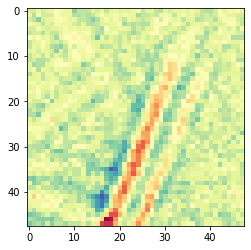

Epoch 58/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8514 - acc: 0.8872 - val_loss: 1.9924 - val_acc: 0.8598

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9923689421092239, 'val_acc': 0.8598130724140417, 'loss': 1.851387039021513, 'acc': 0.8871643309611997, 'lr': 1e-06}


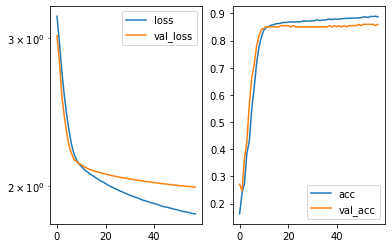

Predicted cell: Cells Probability: [[0.7385696]]
True Cell type: Normal
x [[0.46879476]]
True positional value x 0.5
y [[0.5545008]]
True positional value y 0.5


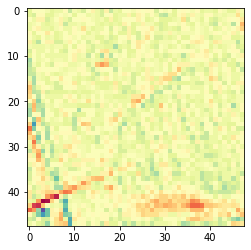

Epoch 59/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8483 - acc: 0.8899 - val_loss: 1.9913 - val_acc: 0.8551

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9912893181649325, 'val_acc': 0.855140177445991, 'loss': 1.8482977988009794, 'acc': 0.8898743554769875, 'lr': 1e-06}


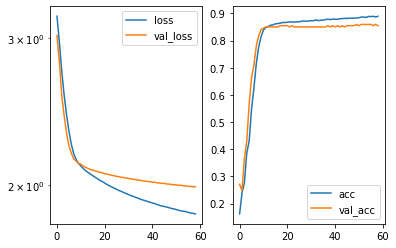

Predicted cell: Cells Probability: [[0.9792028]]
True Cell type: Cells
x [[0.608028]]
True positional value x 0.5
y [[0.16916534]]
True positional value y 0.2916666666666667


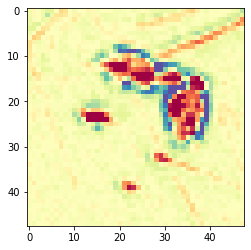

Epoch 60/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8459 - acc: 0.8894 - val_loss: 1.9907 - val_acc: 0.8551

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9906755774934715, 'val_acc': 0.855140177445991, 'loss': 1.8459072585586376, 'acc': 0.8893816219993811, 'lr': 1e-06}


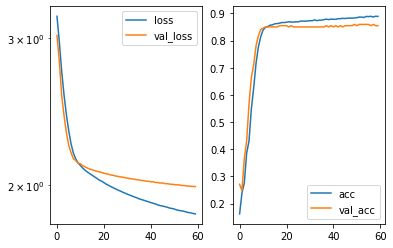

Predicted cell: Cells Probability: [[0.9131381]]
True Cell type: Cells
x [[0.24297148]]
True positional value x 0.2916666666666667
y [[0.47979295]]
True positional value y 0.2916666666666667


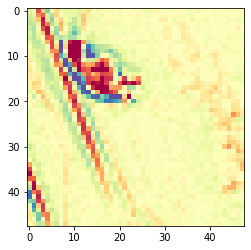

Epoch 61/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8433 - acc: 0.8904 - val_loss: 1.9892 - val_acc: 0.8598

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9892409338015262, 'val_acc': 0.8598130701858306, 'loss': 1.8432625481341678, 'acc': 0.8903670895713455, 'lr': 1e-06}


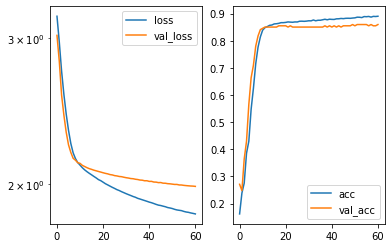

Predicted cell: Cells Probability: [[0.94764996]]
True Cell type: Cells
x [[0.45032635]]
True positional value x 0.5
y [[0.26386997]]
True positional value y 0.2916666666666667


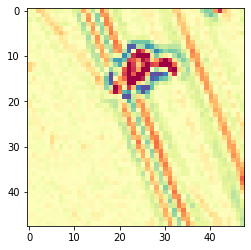

Epoch 62/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8406 - acc: 0.8921 - val_loss: 1.9887 - val_acc: 0.8598

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9887003831774275, 'val_acc': 0.8598130701858306, 'loss': 1.8406114148870423, 'acc': 0.8920916544448334, 'lr': 1e-06}


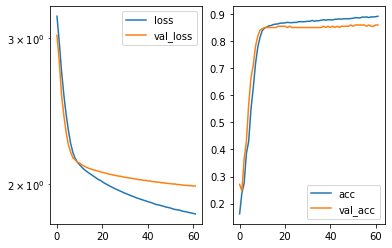

Predicted cell: Cells Probability: [[0.9799529]]
True Cell type: Cells
x [[0.60258186]]
True positional value x 0.5
y [[0.17108157]]
True positional value y 0.2916666666666667


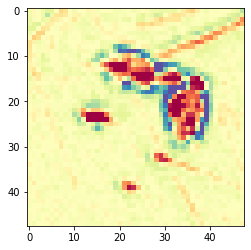

Epoch 63/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8391 - acc: 0.8923 - val_loss: 1.9872 - val_acc: 0.8598

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9871635147344286, 'val_acc': 0.8598130701858306, 'loss': 1.8390584221670974, 'acc': 0.8923380179603748, 'lr': 1e-06}


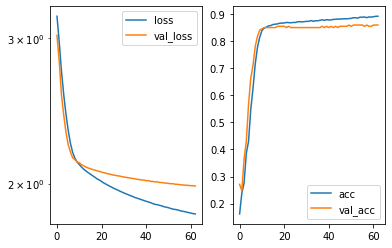

Predicted cell: Cells Probability: [[0.8768286]]
True Cell type: Cells
x [[0.26148638]]
True positional value x 0.2916666666666667
y [[0.15571743]]
True positional value y 0.2916666666666667


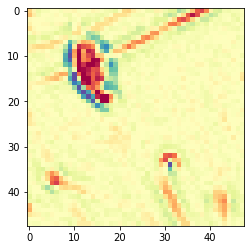

Epoch 64/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8370 - acc: 0.8936 - val_loss: 1.9869 - val_acc: 0.8598

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9868651528224768, 'val_acc': 0.8598130701858306, 'loss': 1.836987236474764, 'acc': 0.89356984434882, 'lr': 1e-06}


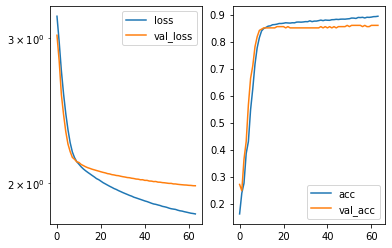

Predicted cell: Cells Probability: [[0.9620517]]
True Cell type: Cells
x [[0.3222613]]
True positional value x 0.2916666666666667
y [[0.29184023]]
True positional value y 0.5


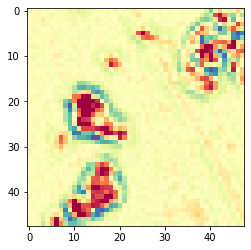

Epoch 65/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8349 - acc: 0.8909 - val_loss: 1.9846 - val_acc: 0.8598

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9846129617958426, 'val_acc': 0.8598130701858306, 'loss': 1.834933254013334, 'acc': 0.8908598148402805, 'lr': 1e-06}


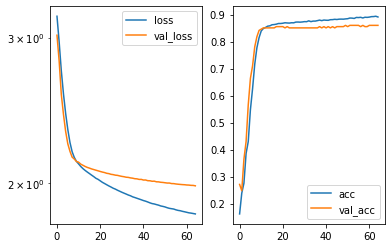

Predicted cell: Cells Probability: [[0.980172]]
True Cell type: Cells
x [[0.7256079]]
True positional value x 0.7083333333333334
y [[0.16104504]]
True positional value y 0.2916666666666667


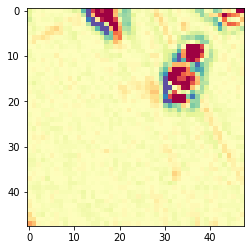

Epoch 66/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8310 - acc: 0.8958 - val_loss: 1.9842 - val_acc: 0.8598

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.984201879144829, 'val_acc': 0.8598130701858306, 'loss': 1.8310176274493928, 'acc': 0.8957871433019814, 'lr': 1e-06}


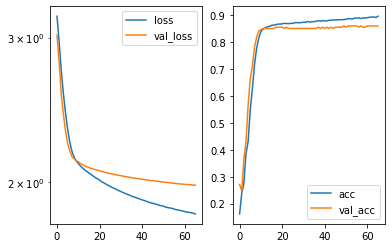

Predicted cell: Cells Probability: [[0.7447234]]
True Cell type: Cells
x [[0.81778884]]
True positional value x 0.7083333333333334
y [[0.7164043]]
True positional value y 0.7083333333333334


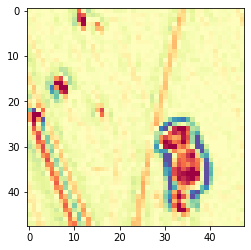

Epoch 67/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8298 - acc: 0.8933 - val_loss: 1.9827 - val_acc: 0.8598

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.982724496137316, 'val_acc': 0.8598130701858306, 'loss': 1.829841535794497, 'acc': 0.893323475840527, 'lr': 1e-06}


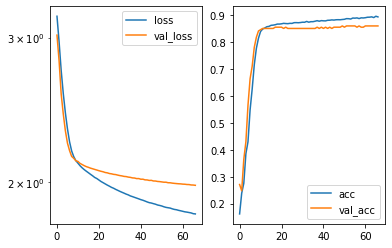

Predicted cell: Cells Probability: [[0.5617577]]
True Cell type: Cells
x [[0.5332059]]
True positional value x 0.5
y [[0.4330359]]
True positional value y 0.2916666666666667


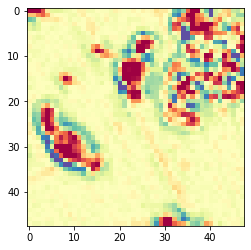

Epoch 68/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8276 - acc: 0.8948 - val_loss: 1.9819 - val_acc: 0.8598

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9819381794082784, 'val_acc': 0.8598130701858306, 'loss': 1.8275888950609167, 'acc': 0.8948016754363258, 'lr': 1e-06}


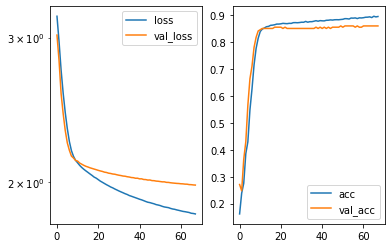

Predicted cell: Cells Probability: [[0.807677]]
True Cell type: Normal
x [[0.44396386]]
True positional value x 0.5
y [[0.5700614]]
True positional value y 0.5


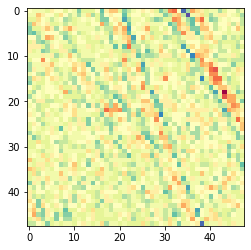

Epoch 69/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8255 - acc: 0.8958 - val_loss: 1.9802 - val_acc: 0.8598

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9802005992871579, 'val_acc': 0.8598130701858306, 'loss': 1.8254867993895425, 'acc': 0.8957871371344646, 'lr': 1e-06}


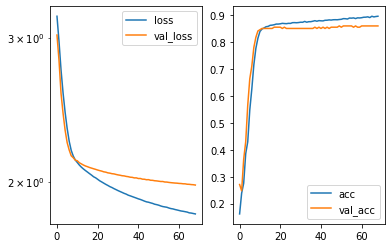

Predicted cell: Cells Probability: [[0.9320079]]
True Cell type: Cells
x [[0.19118854]]
True positional value x 0.2916666666666667
y [[0.56564474]]
True positional value y 0.7083333333333334


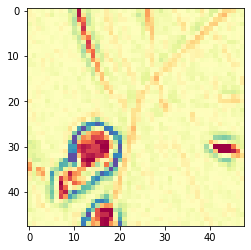

Epoch 70/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8233 - acc: 0.8965 - val_loss: 1.9801 - val_acc: 0.8598

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9800592382377553, 'val_acc': 0.8598130701858306, 'loss': 1.823294631217201, 'acc': 0.8965262370792096, 'lr': 1e-06}


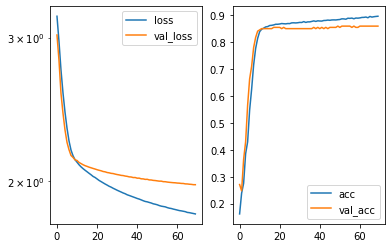

Predicted cell: Cells Probability: [[0.82414776]]
True Cell type: Cells
x [[0.47211218]]
True positional value x 0.5
y [[0.4811157]]
True positional value y 0.2916666666666667


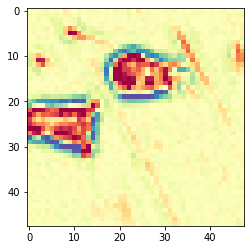

Epoch 71/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8215 - acc: 0.8987 - val_loss: 1.9783 - val_acc: 0.8598

Epoch 00071: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.978255195038341, 'val_acc': 0.8598130701858306, 'loss': 1.8215448945342216, 'acc': 0.8987435292481025, 'lr': 1e-06}


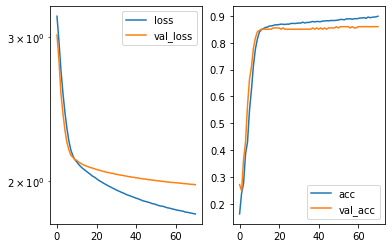

Predicted cell: Cells Probability: [[0.9909155]]
True Cell type: Cells
x [[0.6690711]]
True positional value x 0.7083333333333334
y [[0.5007511]]
True positional value y 0.2916666666666667


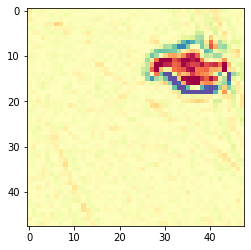

Epoch 72/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8195 - acc: 0.8990 - val_loss: 1.9776 - val_acc: 0.8598

Epoch 00072: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9776191845118443, 'val_acc': 0.8598130701858306, 'loss': 1.819451261488902, 'acc': 0.898989900707993, 'lr': 1e-06}


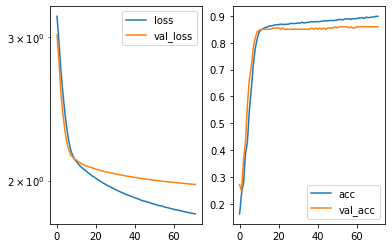

Predicted cell: Cells Probability: [[0.95771015]]
True Cell type: Cells
x [[0.6688318]]
True positional value x 0.7083333333333334
y [[0.3068419]]
True positional value y 0.2916666666666667


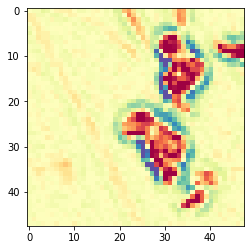

Epoch 73/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8179 - acc: 0.8987 - val_loss: 1.9768 - val_acc: 0.8598

Epoch 00073: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.976773797908676, 'val_acc': 0.8598130701858306, 'loss': 1.8178906105045733, 'acc': 0.8987435312892569, 'lr': 1e-06}


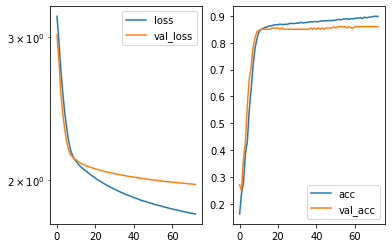

Predicted cell: Cells Probability: [[0.96518075]]
True Cell type: Cells
x [[0.71709025]]
True positional value x 0.7083333333333334
y [[0.55149883]]
True positional value y 0.5


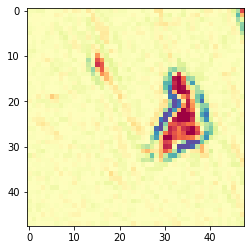

Epoch 74/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8156 - acc: 0.8997 - val_loss: 1.9759 - val_acc: 0.8598

Epoch 00074: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9759034007509177, 'val_acc': 0.8598130701858306, 'loss': 1.815563606992676, 'acc': 0.8997289968347514, 'lr': 1e-06}


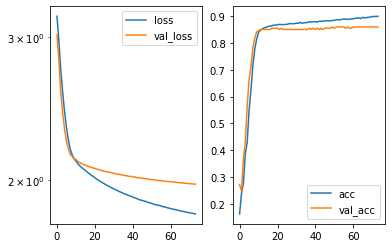

Predicted cell: Cells Probability: [[0.96717894]]
True Cell type: Cells
x [[0.63466215]]
True positional value x 0.7083333333333334
y [[0.5972352]]
True positional value y 0.5


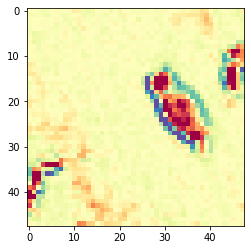

Epoch 75/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8144 - acc: 0.9022 - val_loss: 1.9749 - val_acc: 0.8645

Epoch 00075: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9748661083595775, 'val_acc': 0.8644859629256703, 'loss': 1.814421121197165, 'acc': 0.9021926655003402, 'lr': 1e-06}


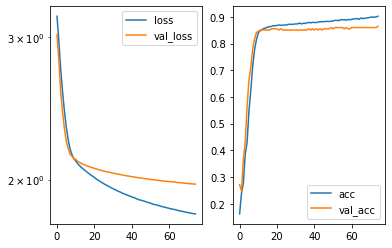

Predicted cell: Cells Probability: [[0.9759389]]
True Cell type: Cells
x [[0.38649437]]
True positional value x 0.5
y [[0.61006504]]
True positional value y 0.2916666666666667


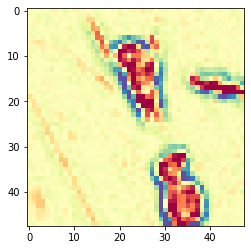

Epoch 76/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8121 - acc: 0.9005 - val_loss: 1.9741 - val_acc: 0.8645

Epoch 00076: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9740972117842914, 'val_acc': 0.8644859629256703, 'loss': 1.8120533877565639, 'acc': 0.900468096794181, 'lr': 1e-06}


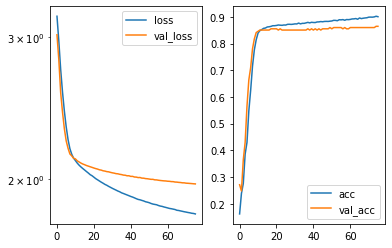

Predicted cell: Cells Probability: [[0.6983756]]
True Cell type: Normal
x [[0.46685648]]
True positional value x 0.5
y [[0.5657634]]
True positional value y 0.5


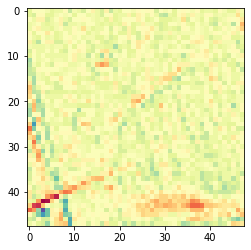

Epoch 77/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8109 - acc: 0.9010 - val_loss: 1.9728 - val_acc: 0.8645

Epoch 00077: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.972813085974934, 'val_acc': 0.8644859629256703, 'loss': 1.8108926081956975, 'acc': 0.9009608279075726, 'lr': 1e-06}


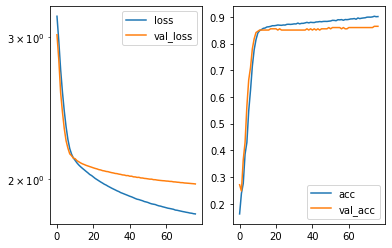

Predicted cell: Cells Probability: [[0.879107]]
True Cell type: Normal
x [[0.5540342]]
True positional value x 0.5
y [[0.6318743]]
True positional value y 0.5


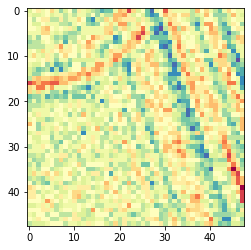

Epoch 78/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8084 - acc: 0.9027 - val_loss: 1.9725 - val_acc: 0.8645

Epoch 00078: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9725107177395687, 'val_acc': 0.8644859629256703, 'loss': 1.8084260591822734, 'acc': 0.9026853875239866, 'lr': 1e-06}


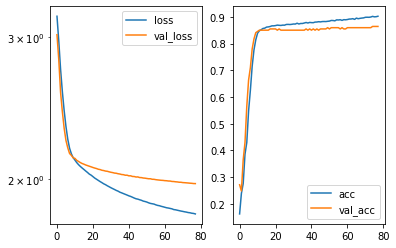

Predicted cell: Cells Probability: [[0.9767329]]
True Cell type: Cells
x [[0.5821451]]
True positional value x 0.5
y [[0.77736545]]
True positional value y 0.7083333333333334


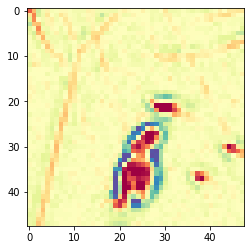

Epoch 79/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8070 - acc: 0.9039 - val_loss: 1.9714 - val_acc: 0.8645

Epoch 00079: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9714437890275616, 'val_acc': 0.8644859629256703, 'loss': 1.8070105938936107, 'acc': 0.9039172235748749, 'lr': 1e-06}


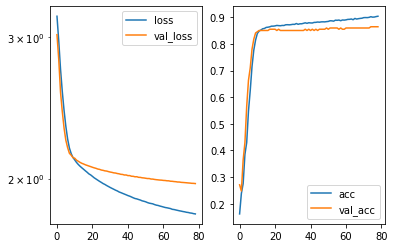

Predicted cell: Cells Probability: [[0.91529286]]
True Cell type: Cells
x [[0.5564012]]
True positional value x 0.7083333333333334
y [[0.5256001]]
True positional value y 0.5


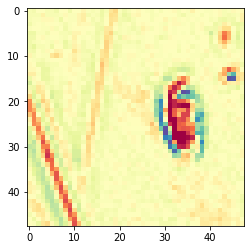

Epoch 80/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8052 - acc: 0.9032 - val_loss: 1.9704 - val_acc: 0.8645

Epoch 00080: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9704472049374446, 'val_acc': 0.8644859629256703, 'loss': 1.8052118010461022, 'acc': 0.9031781259796601, 'lr': 1e-06}


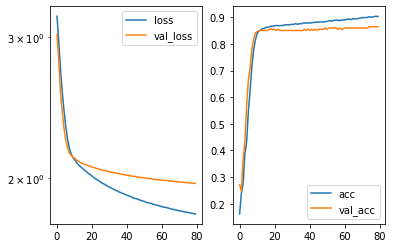

Predicted cell: Cells Probability: [[0.95375067]]
True Cell type: Cells
x [[0.3721276]]
True positional value x 0.2916666666666667
y [[0.324197]]
True positional value y 0.2916666666666667


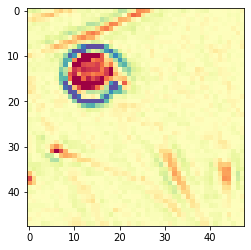

Epoch 81/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8034 - acc: 0.9044 - val_loss: 1.9703 - val_acc: 0.8645

Epoch 00081: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9703314048107539, 'val_acc': 0.8644859629256703, 'loss': 1.8033892182946705, 'acc': 0.9044099576692329, 'lr': 1e-06}


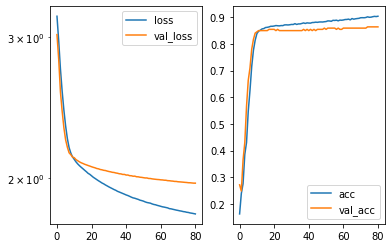

Predicted cell: Cells Probability: [[0.98420966]]
True Cell type: Cells
x [[0.4705308]]
True positional value x 0.5
y [[0.4580256]]
True positional value y 0.5


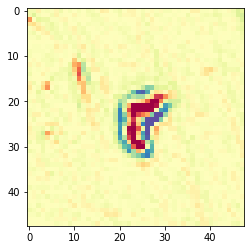

Epoch 82/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.8012 - acc: 0.9049 - val_loss: 1.9685 - val_acc: 0.8645

Epoch 00082: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9684542216987253, 'val_acc': 0.8644859629256703, 'loss': 1.8011700020954802, 'acc': 0.9049026888266782, 'lr': 1e-06}


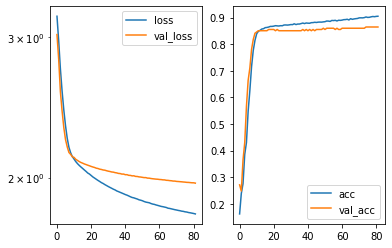

Predicted cell: Cells Probability: [[0.9800837]]
True Cell type: Cells
x [[0.50512046]]
True positional value x 0.5
y [[0.73407495]]
True positional value y 0.7083333333333334


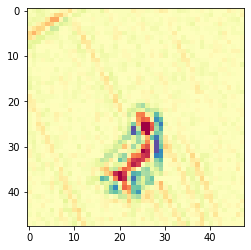

Epoch 83/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7998 - acc: 0.9047 - val_loss: 1.9684 - val_acc: 0.8645

Epoch 00083: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9684480785209442, 'val_acc': 0.8644859629256703, 'loss': 1.79975152050929, 'acc': 0.9046563247237542, 'lr': 1e-06}


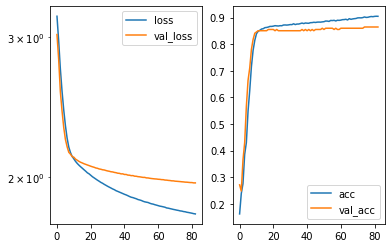

Predicted cell: Cells Probability: [[0.935093]]
True Cell type: Cells
x [[0.15878128]]
True positional value x 0.2916666666666667
y [[0.24832076]]
True positional value y 0.2916666666666667


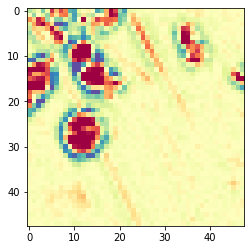

Epoch 84/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7988 - acc: 0.9064 - val_loss: 1.9664 - val_acc: 0.8692

Epoch 00084: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.966385102717676, 'val_acc': 0.8691588835181477, 'loss': 1.7988389272295098, 'acc': 0.9063808848981817, 'lr': 1e-06}


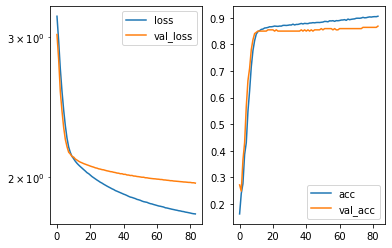

Predicted cell: Cells Probability: [[0.99376714]]
True Cell type: Cells
x [[0.5854571]]
True positional value x 0.7083333333333334
y [[0.2933641]]
True positional value y 0.2916666666666667


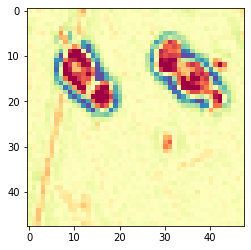

Epoch 85/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7969 - acc: 0.9081 - val_loss: 1.9664 - val_acc: 0.8692

Epoch 00085: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9664300201095153, 'val_acc': 0.8691588835181477, 'loss': 1.796913652004177, 'acc': 0.9081054424293877, 'lr': 1e-06}


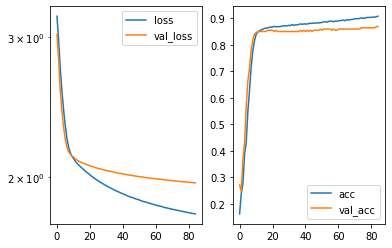

Predicted cell: Cells Probability: [[0.64403784]]
True Cell type: Normal
x [[0.15326035]]
True positional value x 0.5
y [[0.58769536]]
True positional value y 0.5


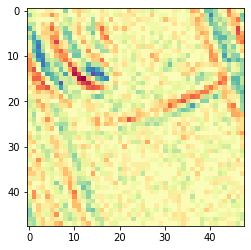

Epoch 86/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7953 - acc: 0.9084 - val_loss: 1.9646 - val_acc: 0.8692

Epoch 00086: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9645533038076954, 'val_acc': 0.8691588835181477, 'loss': 1.795252647356436, 'acc': 0.9083518135955869, 'lr': 1e-06}


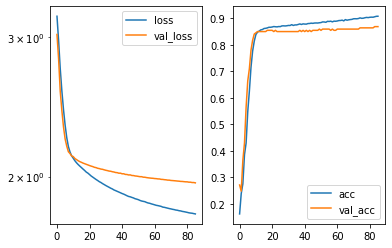

Predicted cell: Cells Probability: [[0.993212]]
True Cell type: Cells
x [[0.4106194]]
True positional value x 0.5
y [[0.47175062]]
True positional value y 0.7083333333333334


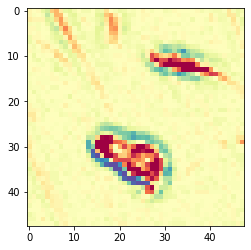

Epoch 87/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7938 - acc: 0.9076 - val_loss: 1.9654 - val_acc: 0.8692

Epoch 00087: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9653988954062773, 'val_acc': 0.8691588835181477, 'loss': 1.7937865818507215, 'acc': 0.9076127136508418, 'lr': 1e-06}


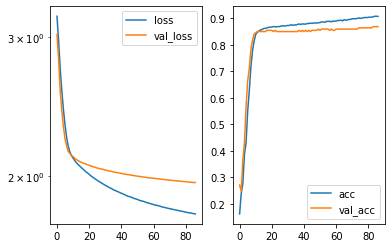

Predicted cell: Cells Probability: [[0.9760016]]
True Cell type: Cells
x [[0.20774823]]
True positional value x 0.2916666666666667
y [[0.6251106]]
True positional value y 0.7083333333333334


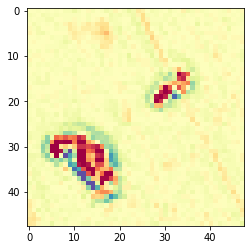

Epoch 88/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7923 - acc: 0.9081 - val_loss: 1.9633 - val_acc: 0.8692

Epoch 00088: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9632801452529764, 'val_acc': 0.8691588835181477, 'loss': 1.7922589333370478, 'acc': 0.9081054465410656, 'lr': 1e-06}


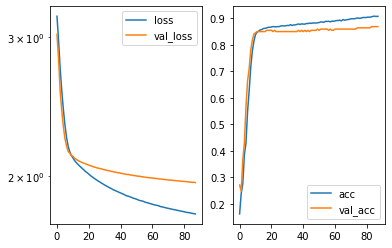

Predicted cell: Cells Probability: [[0.9852195]]
True Cell type: Cells
x [[0.47795117]]
True positional value x 0.5
y [[0.45321319]]
True positional value y 0.5


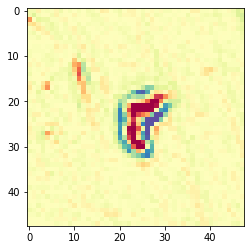

Epoch 89/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7912 - acc: 0.9108 - val_loss: 1.9634 - val_acc: 0.8738

Epoch 00089: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9633742392620193, 'val_acc': 0.8738317762579874, 'loss': 1.791241873570574, 'acc': 0.910815472246303, 'lr': 1e-06}


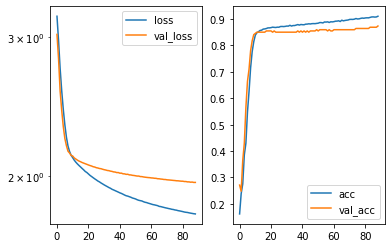

Predicted cell: Cells Probability: [[0.95139474]]
True Cell type: Cells
x [[0.15383764]]
True positional value x 0.2916666666666667
y [[0.6967077]]
True positional value y 0.7083333333333334


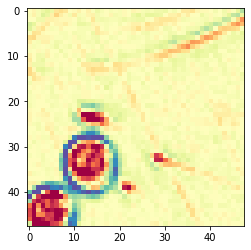

Epoch 90/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7887 - acc: 0.9106 - val_loss: 1.9620 - val_acc: 0.8738

Epoch 00090: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9620304508744, 'val_acc': 0.8738317762579874, 'loss': 1.7886914299990515, 'acc': 0.9105691037086407, 'lr': 1e-06}


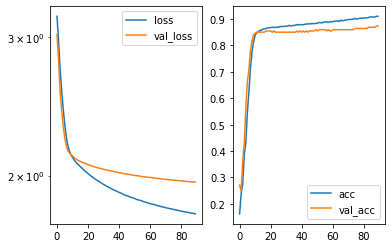

Predicted cell: Cells Probability: [[0.9599776]]
True Cell type: Cells
x [[0.39717245]]
True positional value x 0.2916666666666667
y [[0.27553388]]
True positional value y 0.2916666666666667


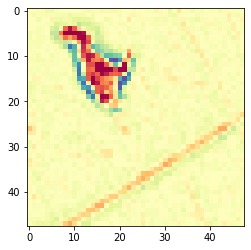

Epoch 91/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7874 - acc: 0.9111 - val_loss: 1.9624 - val_acc: 0.8738

Epoch 00091: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9623756486678792, 'val_acc': 0.8738317762579874, 'loss': 1.7873954797619287, 'acc': 0.9110618433684485, 'lr': 1e-06}


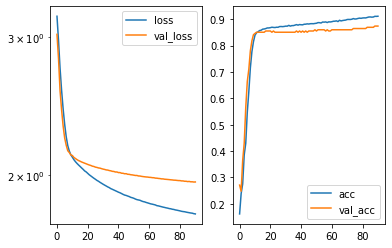

Predicted cell: Cells Probability: [[0.9738283]]
True Cell type: Cells
x [[0.26501843]]
True positional value x 0.2916666666666667
y [[0.5848732]]
True positional value y 0.5


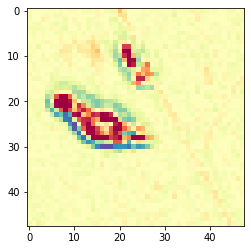

Epoch 92/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7870 - acc: 0.9116 - val_loss: 1.9605 - val_acc: 0.8738

Epoch 00092: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9605406199660256, 'val_acc': 0.8738317762579874, 'loss': 1.7870454389375252, 'acc': 0.911554574246887, 'lr': 1e-06}


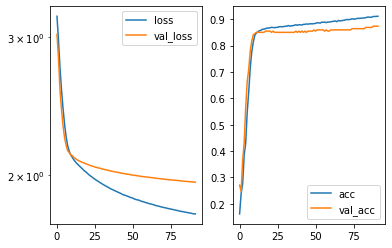

Predicted cell: Cells Probability: [[0.9636936]]
True Cell type: Cells
x [[0.2006189]]
True positional value x 0.2916666666666667
y [[0.6834141]]
True positional value y 0.2916666666666667


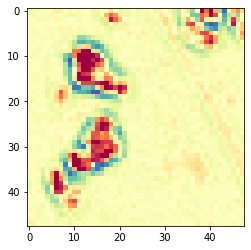

Epoch 93/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7847 - acc: 0.9125 - val_loss: 1.9607 - val_acc: 0.8738

Epoch 00093: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9606629220124716, 'val_acc': 0.8738317762579874, 'loss': 1.7846800028382044, 'acc': 0.912540031833348, 'lr': 1e-06}


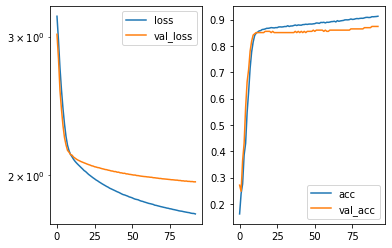

Predicted cell: Cells Probability: [[0.95073944]]
True Cell type: Cells
x [[0.7269301]]
True positional value x 0.7083333333333334
y [[0.5856281]]
True positional value y 0.7083333333333334


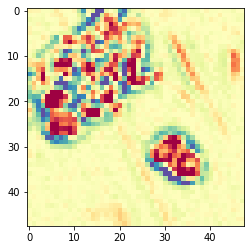

Epoch 94/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7841 - acc: 0.9133 - val_loss: 1.9585 - val_acc: 0.8738

Epoch 00094: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9584863720653214, 'val_acc': 0.8738317762579874, 'loss': 1.7841339871694843, 'acc': 0.9132791344066299, 'lr': 1e-06}


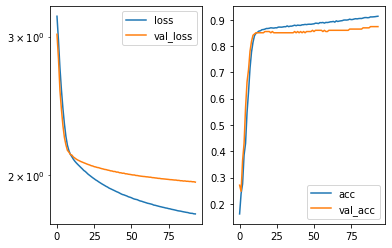

Predicted cell: Cells Probability: [[0.8536325]]
True Cell type: Cells
x [[0.25650677]]
True positional value x 0.2916666666666667
y [[0.7780841]]
True positional value y 0.7083333333333334


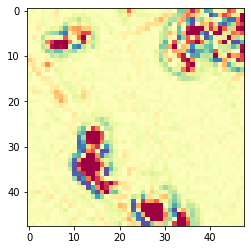

Epoch 95/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7833 - acc: 0.9138 - val_loss: 1.9588 - val_acc: 0.8738

Epoch 00095: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9588185091999089, 'val_acc': 0.8738317762579874, 'loss': 1.783251607967263, 'acc': 0.9137718673115383, 'lr': 1e-06}


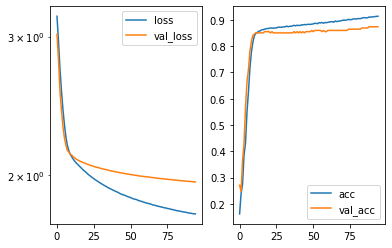

Predicted cell: Cells Probability: [[0.8809009]]
True Cell type: Normal
x [[0.7954781]]
True positional value x 0.5
y [[0.4294499]]
True positional value y 0.5


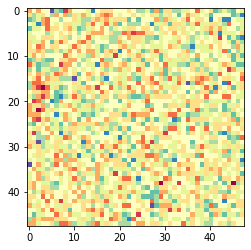

Epoch 96/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7809 - acc: 0.9150 - val_loss: 1.9573 - val_acc: 0.8738

Epoch 00096: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9573462109699427, 'val_acc': 0.8738317762579874, 'loss': 1.780858931120877, 'acc': 0.9150036969305876, 'lr': 1e-06}


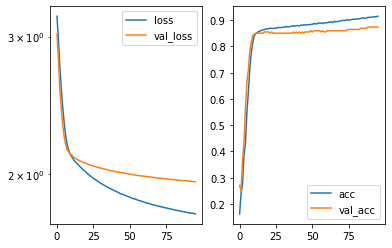

Predicted cell: Cells Probability: [[0.9259683]]
True Cell type: Cells
x [[0.14363857]]
True positional value x 0.2916666666666667
y [[0.71432036]]
True positional value y 0.5


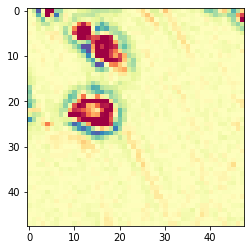

Epoch 97/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7796 - acc: 0.9140 - val_loss: 1.9566 - val_acc: 0.8738

Epoch 00097: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9565517969220598, 'val_acc': 0.8738317762579874, 'loss': 1.7795669571405914, 'acc': 0.9140182258343279, 'lr': 1e-06}


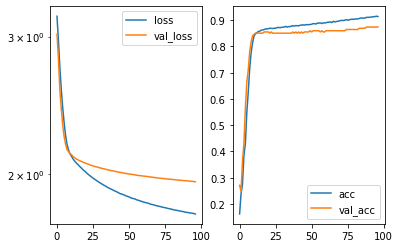

Predicted cell: Cells Probability: [[0.9262797]]
True Cell type: Cells
x [[0.13973393]]
True positional value x 0.2916666666666667
y [[0.7104239]]
True positional value y 0.5


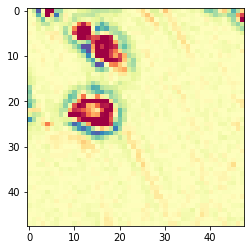

Epoch 98/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7773 - acc: 0.9165 - val_loss: 1.9562 - val_acc: 0.8738

Epoch 00098: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9561947417036396, 'val_acc': 0.8738317762579874, 'loss': 1.7773202759023077, 'acc': 0.916481897686467, 'lr': 1e-06}


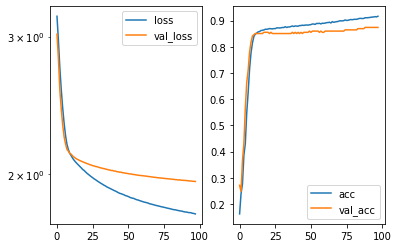

Predicted cell: Cells Probability: [[0.69463795]]
True Cell type: Normal
x [[0.36172196]]
True positional value x 0.5
y [[0.48997012]]
True positional value y 0.5


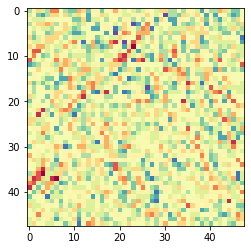

Epoch 99/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7767 - acc: 0.9180 - val_loss: 1.9553 - val_acc: 0.8785

Epoch 00099: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9553031498026625, 'val_acc': 0.8785046968504647, 'loss': 1.7766992711879903, 'acc': 0.9179600937726551, 'lr': 1e-06}


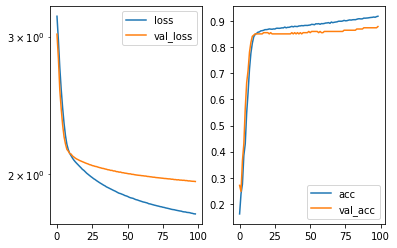

Predicted cell: Cells Probability: [[0.97054356]]
True Cell type: Cells
x [[0.43440154]]
True positional value x 0.5
y [[0.81432426]]
True positional value y 0.7083333333333334


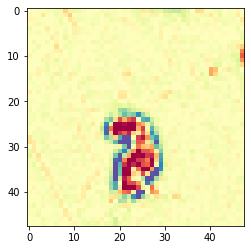

Epoch 100/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7753 - acc: 0.9170 - val_loss: 1.9549 - val_acc: 0.8738

Epoch 00100: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.954906204036463, 'val_acc': 0.8738317762579874, 'loss': 1.775339374638567, 'acc': 0.9169746232784626, 'lr': 1e-06}


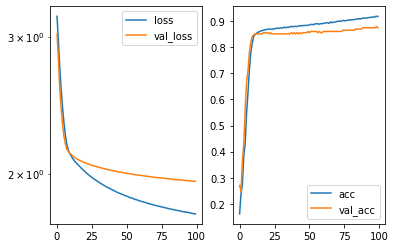

Predicted cell: Cells Probability: [[0.98544365]]
True Cell type: Cells
x [[0.6571946]]
True positional value x 0.7083333333333334
y [[0.26600125]]
True positional value y 0.2916666666666667


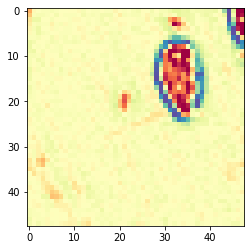

Epoch 101/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7745 - acc: 0.9199 - val_loss: 1.9534 - val_acc: 0.8785

Epoch 00101: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9534491267159722, 'val_acc': 0.8785046968504647, 'loss': 1.7745334954648277, 'acc': 0.9199310183436978, 'lr': 1e-06}


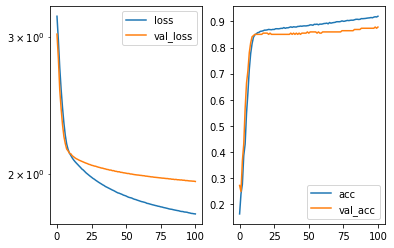

Predicted cell: Cells Probability: [[0.9689484]]
True Cell type: Cells
x [[0.27980024]]
True positional value x 0.2916666666666667
y [[0.20565253]]
True positional value y 0.2916666666666667


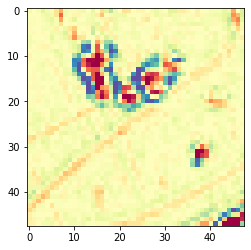

Epoch 102/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7728 - acc: 0.9192 - val_loss: 1.9536 - val_acc: 0.8785

Epoch 00102: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9535504223030304, 'val_acc': 0.8785046968504647, 'loss': 1.7728236054340352, 'acc': 0.9191919210568588, 'lr': 1e-06}


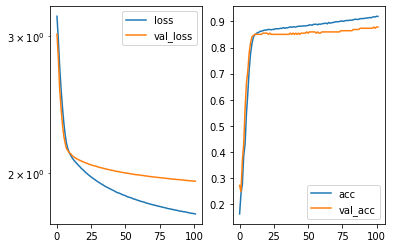

Predicted cell: Cells Probability: [[0.93157184]]
True Cell type: Cells
x [[0.70643365]]
True positional value x 0.7083333333333334
y [[0.55249536]]
True positional value y 0.5


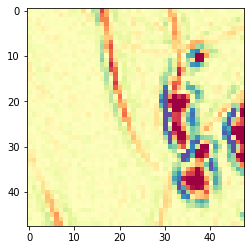

Epoch 103/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7720 - acc: 0.9194 - val_loss: 1.9518 - val_acc: 0.8785

Epoch 00103: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.951807527898628, 'val_acc': 0.8785046968504647, 'loss': 1.7719696245336802, 'acc': 0.9194382869072458, 'lr': 1e-06}


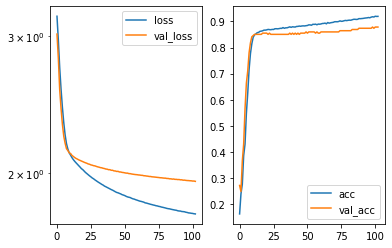

Predicted cell: Cells Probability: [[0.9929409]]
True Cell type: Cells
x [[0.66993815]]
True positional value x 0.7083333333333334
y [[0.49434736]]
True positional value y 0.2916666666666667


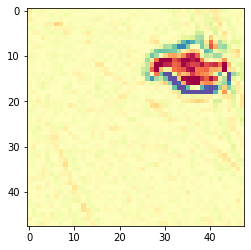

Epoch 104/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7704 - acc: 0.9204 - val_loss: 1.9516 - val_acc: 0.8785

Epoch 00104: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9515822011733723, 'val_acc': 0.8785046968504647, 'loss': 1.7704296470657597, 'acc': 0.9204237506318544, 'lr': 1e-06}


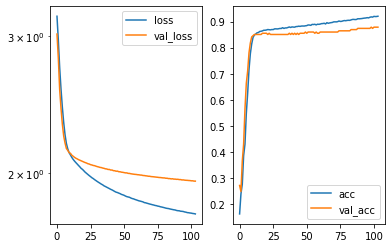

Predicted cell: Cells Probability: [[0.9615182]]
True Cell type: Cells
x [[0.8339701]]
True positional value x 0.7083333333333334
y [[0.26060504]]
True positional value y 0.2916666666666667


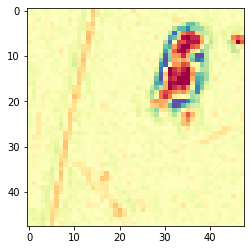

Epoch 105/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7699 - acc: 0.9226 - val_loss: 1.9508 - val_acc: 0.8785

Epoch 00105: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9508094520212333, 'val_acc': 0.8785046968504647, 'loss': 1.7699083320963527, 'acc': 0.9226410463690964, 'lr': 1e-06}


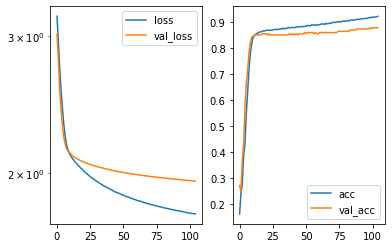

Predicted cell: Cells Probability: [[0.9334045]]
True Cell type: Cells
x [[0.19975583]]
True positional value x 0.2916666666666667
y [[0.5760022]]
True positional value y 0.7083333333333334


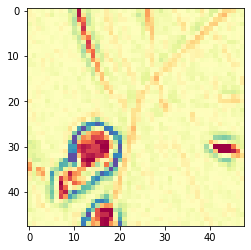

Epoch 106/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7671 - acc: 0.9241 - val_loss: 1.9496 - val_acc: 0.8832

Epoch 00106: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9496205699778049, 'val_acc': 0.8831775895903043, 'loss': 1.7670519046520299, 'acc': 0.924119245700573, 'lr': 1e-06}


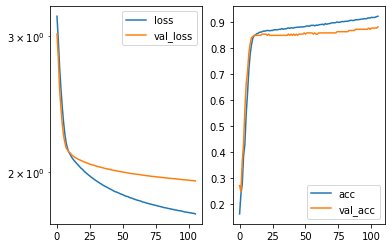

Predicted cell: Cells Probability: [[0.9863766]]
True Cell type: Cells
x [[0.36982822]]
True positional value x 0.5
y [[0.34591064]]
True positional value y 0.2916666666666667


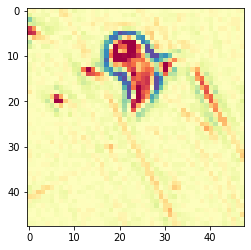

Epoch 107/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7665 - acc: 0.9244 - val_loss: 1.9499 - val_acc: 0.8832

Epoch 00107: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.949931296232705, 'val_acc': 0.8831775895903043, 'loss': 1.7665338848400187, 'acc': 0.9243656092014298, 'lr': 1e-06}


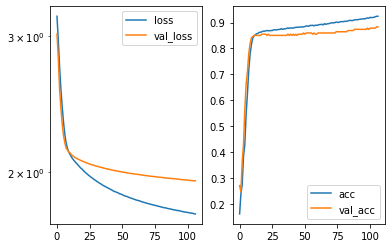

Predicted cell: Cells Probability: [[0.5406259]]
True Cell type: Normal
x [[0.29490018]]
True positional value x 0.5
y [[0.5248226]]
True positional value y 0.5


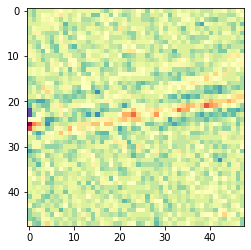

Epoch 108/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7664 - acc: 0.9241 - val_loss: 1.9487 - val_acc: 0.8832

Epoch 00108: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.94866331492629, 'val_acc': 0.8831775895903043, 'loss': 1.7664027714793922, 'acc': 0.9241192442321167, 'lr': 1e-06}


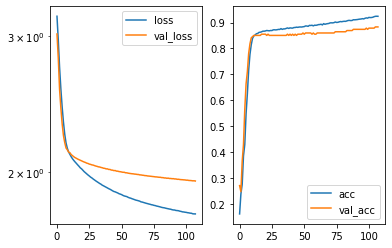

Predicted cell: Cells Probability: [[0.94562936]]
True Cell type: Cells
x [[0.261313]]
True positional value x 0.2916666666666667
y [[0.6814751]]
True positional value y 0.7083333333333334


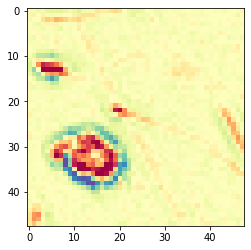

Epoch 109/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7635 - acc: 0.9244 - val_loss: 1.9478 - val_acc: 0.8832

Epoch 00109: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9477864180769875, 'val_acc': 0.8831775895903043, 'loss': 1.7635403120567659, 'acc': 0.9243656047960607, 'lr': 1e-06}


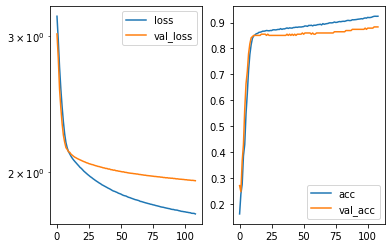

Predicted cell: Cells Probability: [[0.6067132]]
True Cell type: Normal
x [[0.15610659]]
True positional value x 0.5
y [[0.5887342]]
True positional value y 0.5


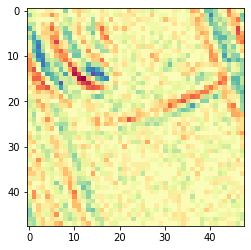

Epoch 110/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7635 - acc: 0.9271 - val_loss: 1.9477 - val_acc: 0.8832

Epoch 00110: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9476926215341157, 'val_acc': 0.8831775895903043, 'loss': 1.7634603816847931, 'acc': 0.9270756322487612, 'lr': 1e-06}


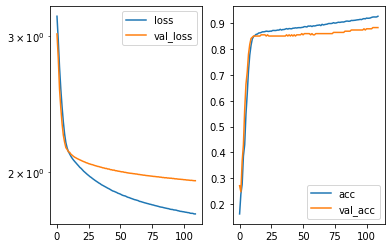

Predicted cell: Cells Probability: [[0.9942496]]
True Cell type: Cells
x [[0.5301941]]
True positional value x 0.7083333333333334
y [[0.7193743]]
True positional value y 0.7083333333333334


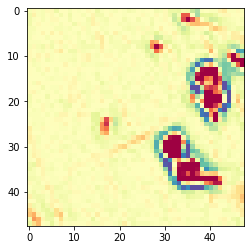

Epoch 111/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7622 - acc: 0.9273 - val_loss: 1.9461 - val_acc: 0.8832

Epoch 00111: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9461369781850655, 'val_acc': 0.8831775895903043, 'loss': 1.7621506473999888, 'acc': 0.9273220048834168, 'lr': 1e-06}


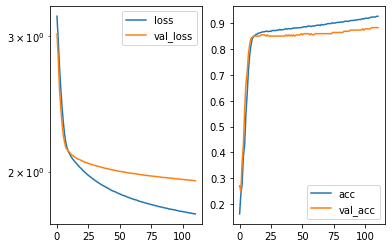

Predicted cell: Cells Probability: [[0.945937]]
True Cell type: Cells
x [[0.25760162]]
True positional value x 0.2916666666666667
y [[0.677884]]
True positional value y 0.7083333333333334


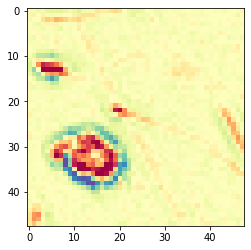

Epoch 112/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7604 - acc: 0.9273 - val_loss: 1.9465 - val_acc: 0.8832

Epoch 00112: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9465423699851347, 'val_acc': 0.8831775895903043, 'loss': 1.7604291618208077, 'acc': 0.9273219987012155, 'lr': 1e-06}


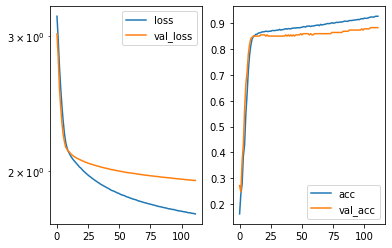

Predicted cell: Cells Probability: [[0.9590091]]
True Cell type: Cells
x [[0.5982061]]
True positional value x 0.5
y [[0.16319387]]
True positional value y 0.2916666666666667


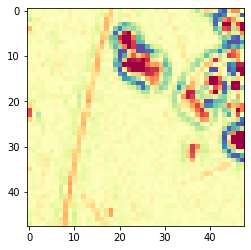

Epoch 113/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7596 - acc: 0.9273 - val_loss: 1.9443 - val_acc: 0.8832

Epoch 00113: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9443338206995313, 'val_acc': 0.8831775895903043, 'loss': 1.7596088988230598, 'acc': 0.927322004575041, 'lr': 1e-06}


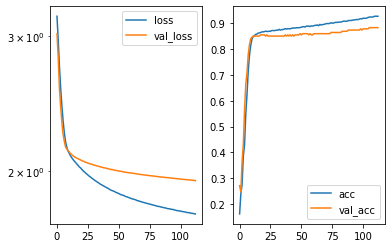

Predicted cell: Cells Probability: [[0.9761761]]
True Cell type: Cells
x [[0.44816542]]
True positional value x 0.7083333333333334
y [[0.37508947]]
True positional value y 0.5


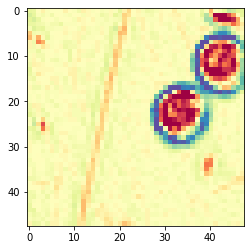

Epoch 114/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7583 - acc: 0.9278 - val_loss: 1.9451 - val_acc: 0.8832

Epoch 00114: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.945114657143566, 'val_acc': 0.8831775895903043, 'loss': 1.75831418150192, 'acc': 0.9278147366135601, 'lr': 1e-06}


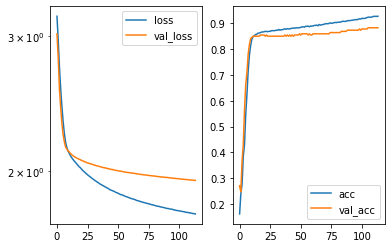

Predicted cell: Cells Probability: [[0.980995]]
True Cell type: Cells
x [[0.70323044]]
True positional value x 0.7083333333333334
y [[0.52607083]]
True positional value y 0.5


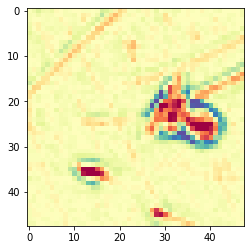

Epoch 115/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7579 - acc: 0.9283 - val_loss: 1.9433 - val_acc: 0.8832

Epoch 00115: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9433014883059208, 'val_acc': 0.8831775895903043, 'loss': 1.7578612082284728, 'acc': 0.928307469797475, 'lr': 1e-06}


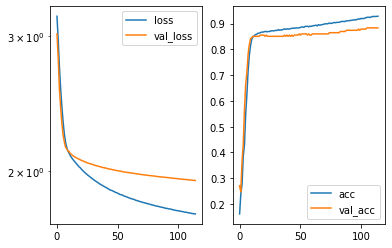

Predicted cell: Cells Probability: [[0.953687]]
True Cell type: Cells
x [[0.15809715]]
True positional value x 0.2916666666666667
y [[0.7834331]]
True positional value y 0.7083333333333334


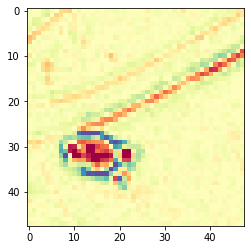

Epoch 116/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7565 - acc: 0.9286 - val_loss: 1.9435 - val_acc: 0.8832

Epoch 00116: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9435326384606761, 'val_acc': 0.8831775895903043, 'loss': 1.7565172656647352, 'acc': 0.9285538350898487, 'lr': 1e-06}


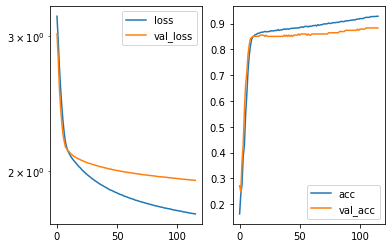

Predicted cell: Cells Probability: [[0.9880535]]
True Cell type: Cells
x [[0.6487019]]
True positional value x 0.7083333333333334
y [[0.2714306]]
True positional value y 0.2916666666666667


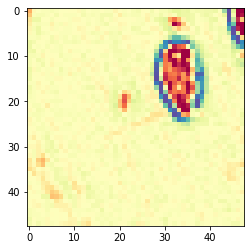

Epoch 117/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7560 - acc: 0.9295 - val_loss: 1.9428 - val_acc: 0.8832

Epoch 00117: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9427553426439517, 'val_acc': 0.8831775895903043, 'loss': 1.7560083813254954, 'acc': 0.9295392976690613, 'lr': 1e-06}


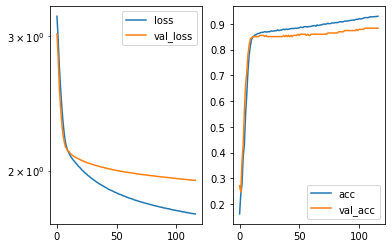

Predicted cell: Cells Probability: [[0.955212]]
True Cell type: Cells
x [[0.4510787]]
True positional value x 0.5
y [[0.66050494]]
True positional value y 0.7083333333333334


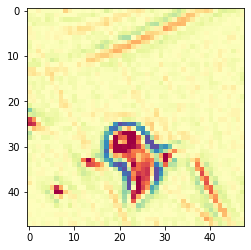

Epoch 118/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7552 - acc: 0.9295 - val_loss: 1.9415 - val_acc: 0.8832

Epoch 00118: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9415292695303943, 'val_acc': 0.8831775895903043, 'loss': 1.7551883158057626, 'acc': 0.9295392976690613, 'lr': 1e-06}


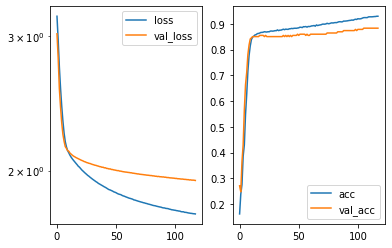

Predicted cell: Cells Probability: [[0.9623295]]
True Cell type: Cells
x [[0.5134386]]
True positional value x 0.5
y [[0.6450531]]
True positional value y 0.5


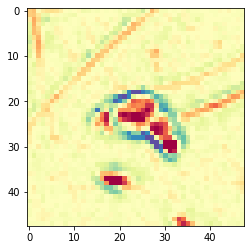

Epoch 119/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7538 - acc: 0.9310 - val_loss: 1.9418 - val_acc: 0.8832

Epoch 00119: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9418437514349678, 'val_acc': 0.8831775895903043, 'loss': 1.7538497083790345, 'acc': 0.9310174878667393, 'lr': 1e-06}


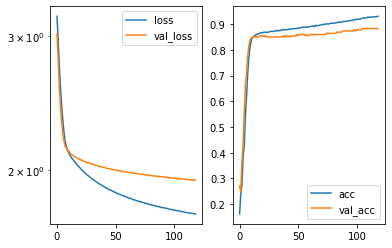

Predicted cell: Normal Probability: [[0.5297032]]
True Cell type: Normal
x [[0.5890745]]
True positional value x 0.5
y [[0.574858]]
True positional value y 0.5


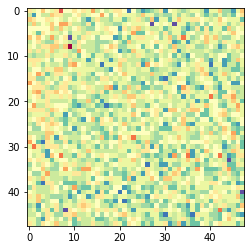

Epoch 120/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7522 - acc: 0.9300 - val_loss: 1.9405 - val_acc: 0.8832

Epoch 00120: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.940473583257087, 'val_acc': 0.8831775895903043, 'loss': 1.7522027947450982, 'acc': 0.9300320264476072, 'lr': 1e-06}


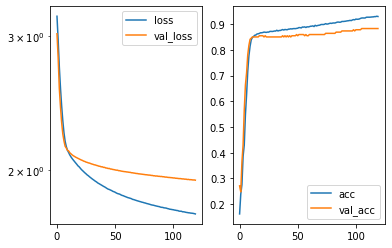

Predicted cell: Cells Probability: [[0.9858235]]
True Cell type: Cells
x [[0.582531]]
True positional value x 0.5
y [[0.26188755]]
True positional value y 0.2916666666666667


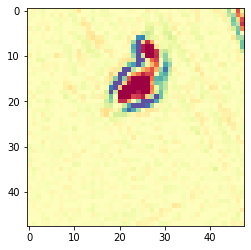

Epoch 121/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7520 - acc: 0.9318 - val_loss: 1.9398 - val_acc: 0.8832

Epoch 00121: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.939841293842993, 'val_acc': 0.8831775895903043, 'loss': 1.751953560632272, 'acc': 0.9317565913357797, 'lr': 1e-06}


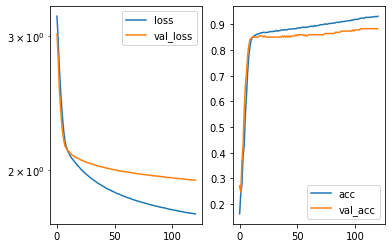

Predicted cell: Cells Probability: [[0.95508295]]
True Cell type: Cells
x [[0.15704595]]
True positional value x 0.2916666666666667
y [[0.7830956]]
True positional value y 0.7083333333333334


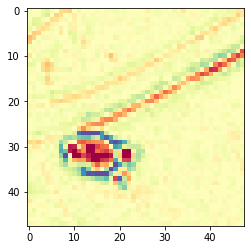

Epoch 122/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7507 - acc: 0.9320 - val_loss: 1.9391 - val_acc: 0.8832

Epoch 00122: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9391046862735926, 'val_acc': 0.8831775895903043, 'loss': 1.7507064793902274, 'acc': 0.9320029589336298, 'lr': 1e-06}


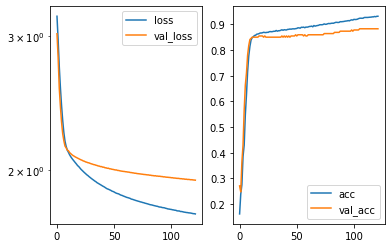

Predicted cell: Cells Probability: [[0.9688612]]
True Cell type: Cells
x [[0.21101174]]
True positional value x 0.2916666666666667
y [[0.68267244]]
True positional value y 0.2916666666666667


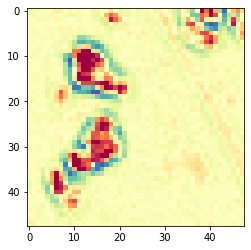

Epoch 123/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7481 - acc: 0.9322 - val_loss: 1.9385 - val_acc: 0.8832

Epoch 00123: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9384799995154978, 'val_acc': 0.8831775895903043, 'loss': 1.7481038115182572, 'acc': 0.9322493277502988, 'lr': 1e-06}


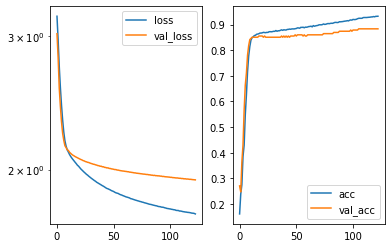

Predicted cell: Cells Probability: [[0.7957525]]
True Cell type: Normal
x [[0.54987454]]
True positional value x 0.5
y [[0.6315765]]
True positional value y 0.5


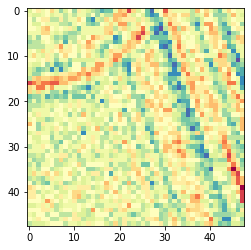

Epoch 124/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7482 - acc: 0.9337 - val_loss: 1.9377 - val_acc: 0.8832

Epoch 00124: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9376871741820718, 'val_acc': 0.8831775895903043, 'loss': 1.7481724689323404, 'acc': 0.9337275208848895, 'lr': 1e-06}


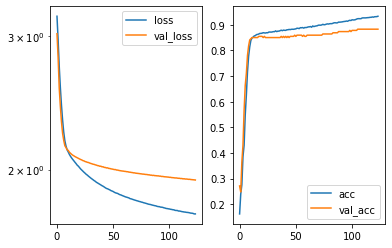

Predicted cell: Cells Probability: [[0.9583685]]
True Cell type: Cells
x [[0.6019658]]
True positional value x 0.5
y [[0.16167364]]
True positional value y 0.2916666666666667


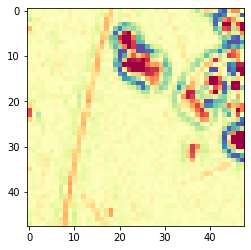

Epoch 125/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7484 - acc: 0.9332 - val_loss: 1.9372 - val_acc: 0.8832

Epoch 00125: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9372077890645678, 'val_acc': 0.8831775895903043, 'loss': 1.7484387125573038, 'acc': 0.933234785630451, 'lr': 1e-06}


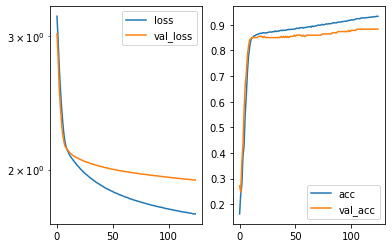

Predicted cell: Cells Probability: [[0.96141857]]
True Cell type: Cells
x [[0.6313158]]
True positional value x 0.7083333333333334
y [[0.3938905]]
True positional value y 0.5


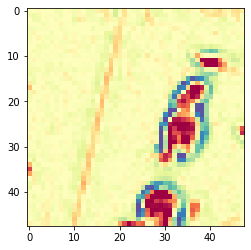

Epoch 126/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7461 - acc: 0.9327 - val_loss: 1.9362 - val_acc: 0.8832

Epoch 00126: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9361643390120746, 'val_acc': 0.8831775895903043, 'loss': 1.7460971900059337, 'acc': 0.9327420559561467, 'lr': 1e-06}


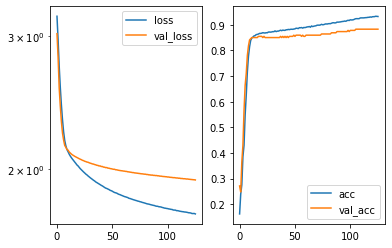

Predicted cell: Cells Probability: [[0.96655846]]
True Cell type: Cells
x [[0.7181348]]
True positional value x 0.7083333333333334
y [[0.34902605]]
True positional value y 0.2916666666666667


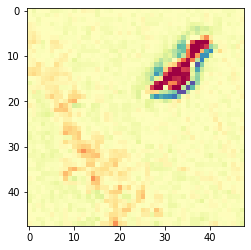

Epoch 127/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7452 - acc: 0.9352 - val_loss: 1.9358 - val_acc: 0.8832

Epoch 00127: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9358466262015226, 'val_acc': 0.8831775895903043, 'loss': 1.745168336743526, 'acc': 0.9352057166920709, 'lr': 1e-06}


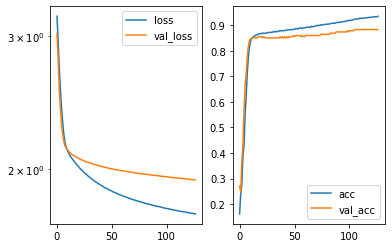

Predicted cell: Cells Probability: [[0.9541867]]
True Cell type: Cells
x [[0.81007653]]
True positional value x 0.7083333333333334
y [[0.7317997]]
True positional value y 0.7083333333333334


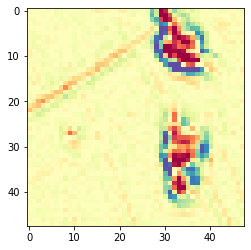

Epoch 128/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7439 - acc: 0.9345 - val_loss: 1.9348 - val_acc: 0.8832

Epoch 00128: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9347556940863067, 'val_acc': 0.8831775895903043, 'loss': 1.7438858843225655, 'acc': 0.9344666220043997, 'lr': 1e-06}


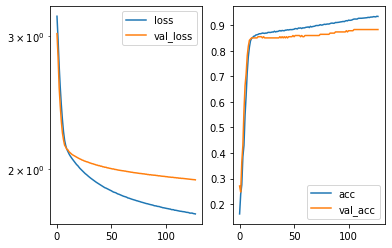

Predicted cell: Cells Probability: [[0.96964407]]
True Cell type: Cells
x [[0.20995976]]
True positional value x 0.2916666666666667
y [[0.6818915]]
True positional value y 0.2916666666666667


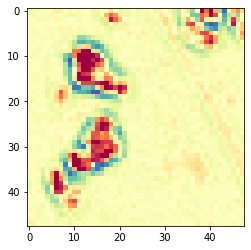

Epoch 129/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7435 - acc: 0.9345 - val_loss: 1.9348 - val_acc: 0.8832

Epoch 00129: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9347589127371245, 'val_acc': 0.8831775895903043, 'loss': 1.7434620553561988, 'acc': 0.9344666143831111, 'lr': 1e-06}


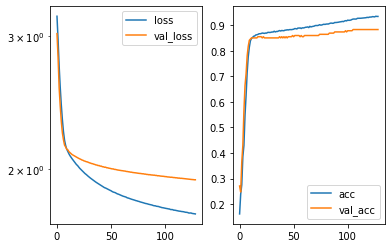

Predicted cell: Cells Probability: [[0.9725032]]
True Cell type: Cells
x [[0.3332925]]
True positional value x 0.2916666666666667
y [[0.6862466]]
True positional value y 0.7083333333333334


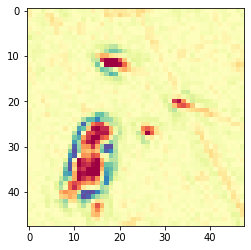

Epoch 130/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7431 - acc: 0.9359 - val_loss: 1.9338 - val_acc: 0.8879

Epoch 00130: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.933795731758403, 'val_acc': 0.887850482330144, 'loss': 1.7431445033364061, 'acc': 0.9359448122020777, 'lr': 1e-06}


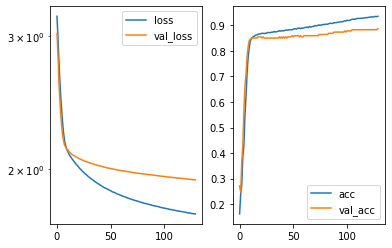

Predicted cell: Cells Probability: [[0.9511714]]
True Cell type: Cells
x [[0.33654118]]
True positional value x 0.2916666666666667
y [[0.65269345]]
True positional value y 0.5


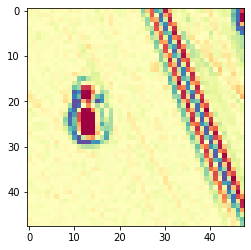

Epoch 131/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7418 - acc: 0.9367 - val_loss: 1.9327 - val_acc: 0.8879

Epoch 00131: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9327058669562651, 'val_acc': 0.887850482330144, 'loss': 1.7417817134873625, 'acc': 0.9366839147900442, 'lr': 1e-06}


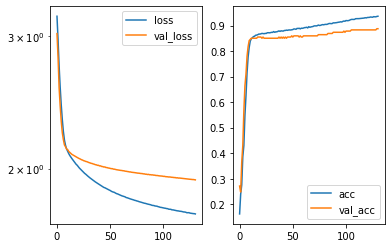

Predicted cell: Cells Probability: [[0.9934465]]
True Cell type: Cells
x [[0.19016643]]
True positional value x 0.2916666666666667
y [[0.3093937]]
True positional value y 0.2916666666666667


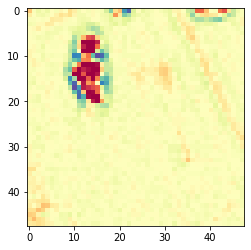

Epoch 132/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7411 - acc: 0.9379 - val_loss: 1.9323 - val_acc: 0.8879

Epoch 00132: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9322569682219317, 'val_acc': 0.887850482330144, 'loss': 1.7410759304978924, 'acc': 0.9379157438363956, 'lr': 1e-06}


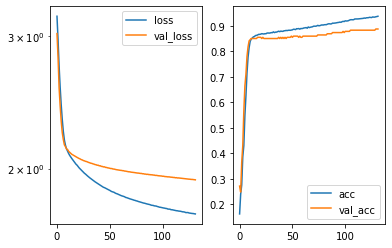

Predicted cell: Cells Probability: [[0.98253363]]
True Cell type: Cells
x [[0.40535796]]
True positional value x 0.5
y [[0.6173344]]
True positional value y 0.2916666666666667


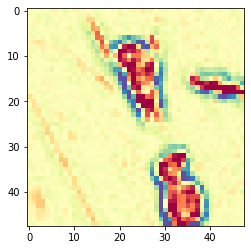

Epoch 133/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7394 - acc: 0.9372 - val_loss: 1.9315 - val_acc: 0.8879

Epoch 00133: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9315421848653633, 'val_acc': 0.887850482330144, 'loss': 1.7393522434088948, 'acc': 0.9371766465201875, 'lr': 1e-06}


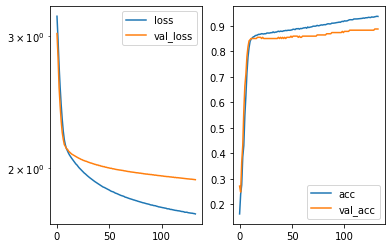

Predicted cell: Cells Probability: [[0.9560666]]
True Cell type: Cells
x [[0.44393566]]
True positional value x 0.5
y [[0.6615894]]
True positional value y 0.7083333333333334


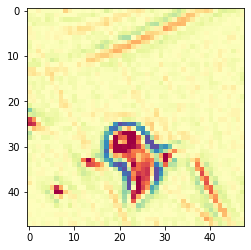

Epoch 134/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7390 - acc: 0.9384 - val_loss: 1.9314 - val_acc: 0.8879

Epoch 00134: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.931374480791181, 'val_acc': 0.887850482330144, 'loss': 1.7390024138366273, 'acc': 0.9384084767266194, 'lr': 1e-06}


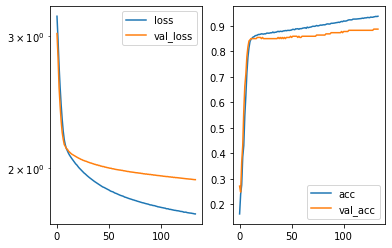

Predicted cell: Cells Probability: [[0.95625705]]
True Cell type: Cells
x [[0.44484663]]
True positional value x 0.5
y [[0.66479725]]
True positional value y 0.7083333333333334


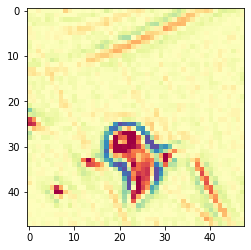

Epoch 135/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7377 - acc: 0.9374 - val_loss: 1.9303 - val_acc: 0.8879

Epoch 00135: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9302739762814245, 'val_acc': 0.887850482330144, 'loss': 1.737692366447552, 'acc': 0.9374230138537155, 'lr': 1e-06}


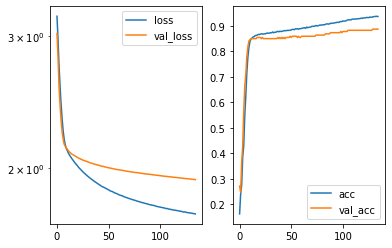

Predicted cell: Cells Probability: [[0.97791517]]
True Cell type: Cells
x [[0.7890551]]
True positional value x 0.7083333333333334
y [[0.48324347]]
True positional value y 0.5


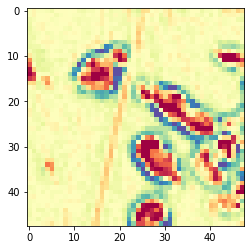

Epoch 136/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7367 - acc: 0.9379 - val_loss: 1.9296 - val_acc: 0.8879

Epoch 00136: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9295864539725758, 'val_acc': 0.887850482330144, 'loss': 1.736693778452717, 'acc': 0.9379157426469459, 'lr': 1e-06}


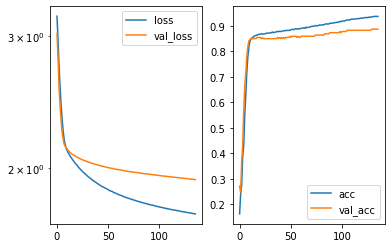

Predicted cell: Cells Probability: [[0.9652528]]
True Cell type: Cells
x [[0.33324847]]
True positional value x 0.2916666666666667
y [[0.6907516]]
True positional value y 0.7083333333333334


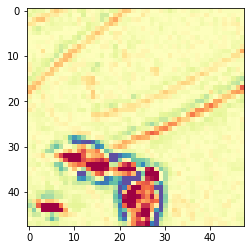

Epoch 137/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7362 - acc: 0.9394 - val_loss: 1.9295 - val_acc: 0.8879

Epoch 00137: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9294615248653377, 'val_acc': 0.887850482330144, 'loss': 1.7362101530318015, 'acc': 0.9393939410826643, 'lr': 1e-06}


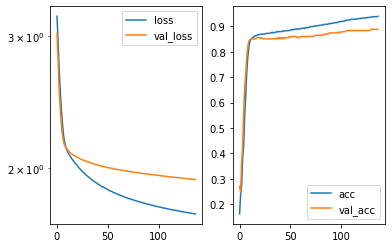

Predicted cell: Cells Probability: [[0.9734465]]
True Cell type: Cells
x [[0.3316212]]
True positional value x 0.2916666666666667
y [[0.6856433]]
True positional value y 0.7083333333333334


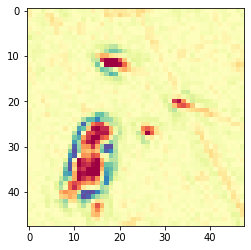

Epoch 138/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7349 - acc: 0.9391 - val_loss: 1.9285 - val_acc: 0.8879

Epoch 00138: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9284585658634934, 'val_acc': 0.887850482330144, 'loss': 1.7348711020137677, 'acc': 0.9391475737344517, 'lr': 1e-06}


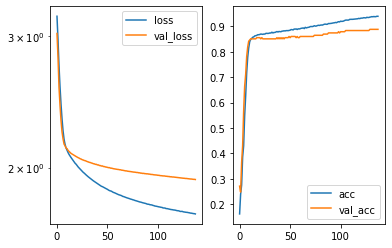

Predicted cell: Cells Probability: [[0.9777659]]
True Cell type: Cells
x [[0.5650932]]
True positional value x 0.5
y [[0.7789418]]
True positional value y 0.7083333333333334


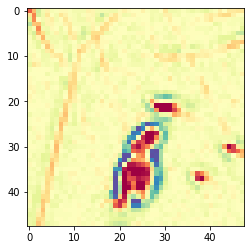

Epoch 139/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7346 - acc: 0.9389 - val_loss: 1.9273 - val_acc: 0.8879

Epoch 00139: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9273461070016167, 'val_acc': 0.887850482330144, 'loss': 1.7346289707657503, 'acc': 0.9389012093378365, 'lr': 1e-06}


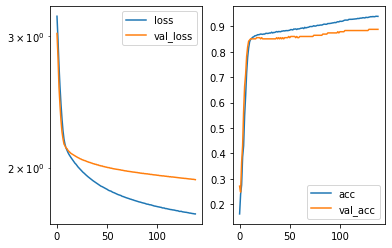

Predicted cell: Cells Probability: [[0.9501167]]
True Cell type: Cells
x [[0.7537627]]
True positional value x 0.2916666666666667
y [[0.70109797]]
True positional value y 0.7083333333333334


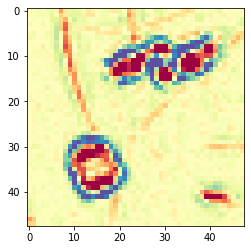

Epoch 140/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7341 - acc: 0.9396 - val_loss: 1.9269 - val_acc: 0.8879

Epoch 00140: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9269083259261657, 'val_acc': 0.887850482330144, 'loss': 1.7340908803267854, 'acc': 0.9396403054352258, 'lr': 1e-06}


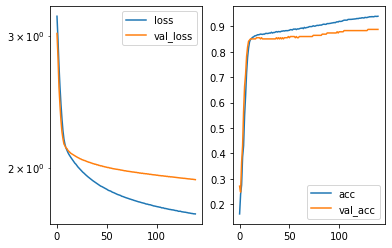

Predicted cell: Cells Probability: [[0.9825151]]
True Cell type: Cells
x [[0.70453703]]
True positional value x 0.7083333333333334
y [[0.5107577]]
True positional value y 0.5


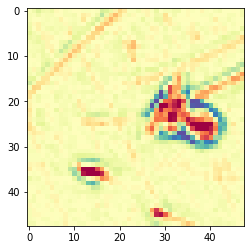

Epoch 141/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7322 - acc: 0.9396 - val_loss: 1.9266 - val_acc: 0.8879

Epoch 00141: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9265765809567175, 'val_acc': 0.887850482330144, 'loss': 1.7322322218604322, 'acc': 0.9396403096056419, 'lr': 1e-06}


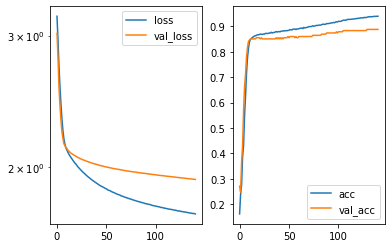

Predicted cell: Cells Probability: [[0.97921294]]
True Cell type: Cells
x [[0.7256004]]
True positional value x 0.7083333333333334
y [[0.5450385]]
True positional value y 0.5


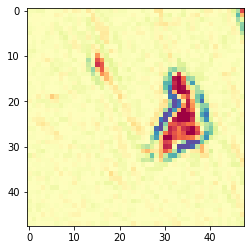

Epoch 142/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7310 - acc: 0.9424 - val_loss: 1.9258 - val_acc: 0.8879

Epoch 00142: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9258401705839923, 'val_acc': 0.887850482330144, 'loss': 1.731005820184836, 'acc': 0.9423503352815102, 'lr': 1e-06}


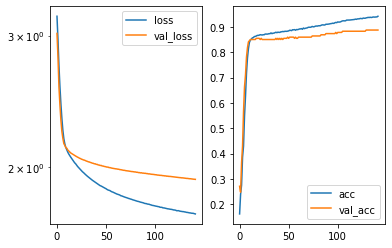

Predicted cell: Cells Probability: [[0.8852838]]
True Cell type: Cells
x [[0.70714545]]
True positional value x 0.7083333333333334
y [[0.86433333]]
True positional value y 0.7083333333333334


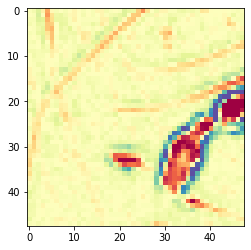

Epoch 143/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7299 - acc: 0.9416 - val_loss: 1.9254 - val_acc: 0.8879

Epoch 00143: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9254413898860183, 'val_acc': 0.887850482330144, 'loss': 1.7299416049944119, 'acc': 0.9416112365262148, 'lr': 1e-06}


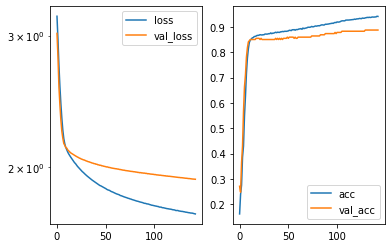

Predicted cell: Cells Probability: [[0.94153416]]
True Cell type: Cells
x [[0.6353957]]
True positional value x 0.7083333333333334
y [[0.4802506]]
True positional value y 0.2916666666666667


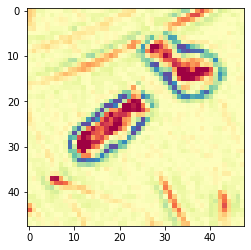

Epoch 144/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7300 - acc: 0.9416 - val_loss: 1.9244 - val_acc: 0.8879

Epoch 00144: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.924416159915033, 'val_acc': 0.887850482330144, 'loss': 1.7300319846083478, 'acc': 0.9416112338683088, 'lr': 1e-06}


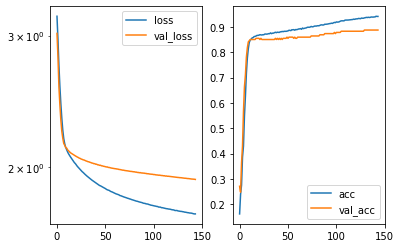

Predicted cell: Cells Probability: [[0.9591662]]
True Cell type: Cells
x [[0.6238747]]
True positional value x 0.7083333333333334
y [[0.31525806]]
True positional value y 0.2916666666666667


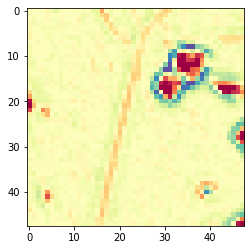

Epoch 145/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7290 - acc: 0.9421 - val_loss: 1.9251 - val_acc: 0.8879

Epoch 00145: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9250546950046148, 'val_acc': 0.887850482330144, 'loss': 1.7290362242143946, 'acc': 0.9421039685353648, 'lr': 1e-06}


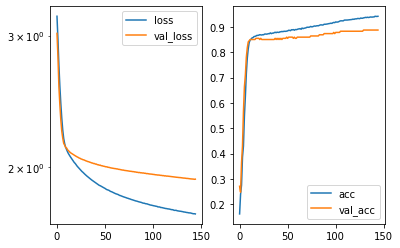

Predicted cell: Cells Probability: [[0.97969407]]
True Cell type: Cells
x [[0.36219352]]
True positional value x 0.2916666666666667
y [[0.70674497]]
True positional value y 0.7083333333333334


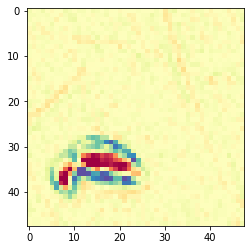

Epoch 146/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7285 - acc: 0.9421 - val_loss: 1.9229 - val_acc: 0.8879

Epoch 00146: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9228532982763844, 'val_acc': 0.887850482330144, 'loss': 1.7284736061777555, 'acc': 0.9421039685206802, 'lr': 1e-06}


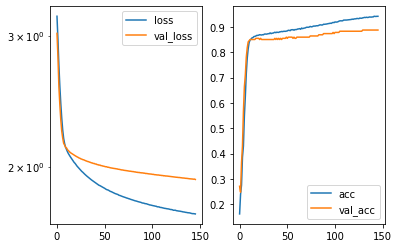

Predicted cell: Cells Probability: [[0.95938826]]
True Cell type: Cells
x [[0.6251682]]
True positional value x 0.7083333333333334
y [[0.3141384]]
True positional value y 0.2916666666666667


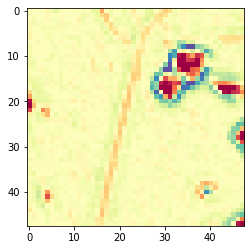

Epoch 147/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7283 - acc: 0.9443 - val_loss: 1.9239 - val_acc: 0.8879

Epoch 00147: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9239054740032302, 'val_acc': 0.887850482330144, 'loss': 1.72825559047855, 'acc': 0.9443212654473717, 'lr': 1e-06}


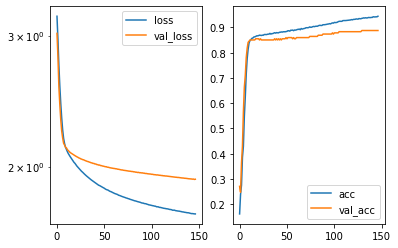

Predicted cell: Cells Probability: [[0.9880399]]
True Cell type: Cells
x [[0.5727962]]
True positional value x 0.5
y [[0.26981184]]
True positional value y 0.2916666666666667


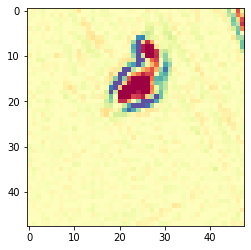

Epoch 148/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7255 - acc: 0.9441 - val_loss: 1.9215 - val_acc: 0.8879

Epoch 00148: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9214852212745452, 'val_acc': 0.887850482330144, 'loss': 1.725523431479094, 'acc': 0.9440748969243941, 'lr': 1e-06}


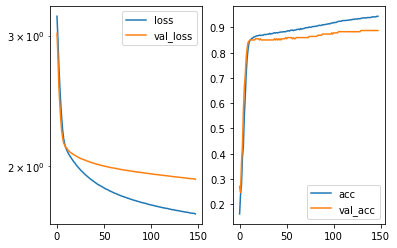

Predicted cell: Cells Probability: [[0.98305756]]
True Cell type: Cells
x [[0.3553327]]
True positional value x 0.2916666666666667
y [[0.61556786]]
True positional value y 0.7083333333333334


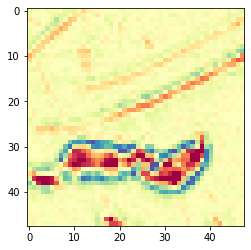

Epoch 149/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7254 - acc: 0.9453 - val_loss: 1.9223 - val_acc: 0.8879

Epoch 00149: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9222549879662345, 'val_acc': 0.887850482330144, 'loss': 1.7254093072777987, 'acc': 0.9453067247666112, 'lr': 1e-06}


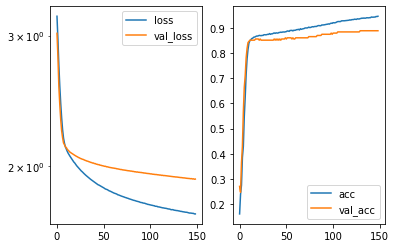

Predicted cell: Cells Probability: [[0.9874529]]
True Cell type: Cells
x [[0.2645262]]
True positional value x 0.2916666666666667
y [[0.34237075]]
True positional value y 0.5


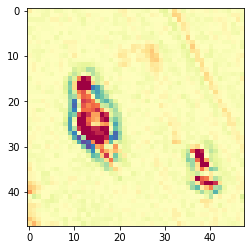

Epoch 150/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7243 - acc: 0.9441 - val_loss: 1.9204 - val_acc: 0.8879

Epoch 00150: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9204409790930348, 'val_acc': 0.887850482330144, 'loss': 1.7243292556369383, 'acc': 0.9440748987012263, 'lr': 1e-06}


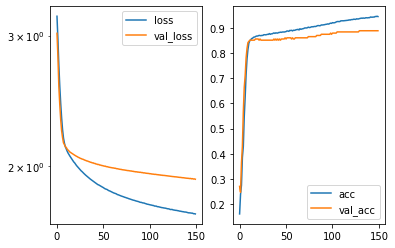

Predicted cell: Cells Probability: [[0.5518781]]
True Cell type: Normal
x [[0.43001065]]
True positional value x 0.5
y [[0.5532397]]
True positional value y 0.5


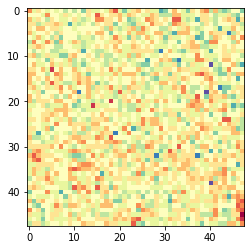

Epoch 151/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7241 - acc: 0.9458 - val_loss: 1.9206 - val_acc: 0.8925

Epoch 00151: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9206220234665916, 'val_acc': 0.8925233750699837, 'loss': 1.7241295816335047, 'acc': 0.9457994588609692, 'lr': 1e-06}


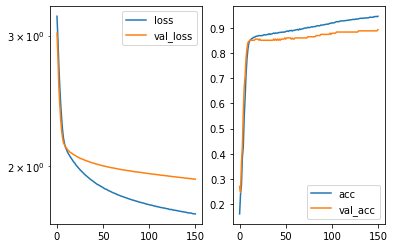

Predicted cell: Cells Probability: [[0.95560247]]
True Cell type: Cells
x [[0.84795463]]
True positional value x 0.7083333333333334
y [[0.5035555]]
True positional value y 0.5


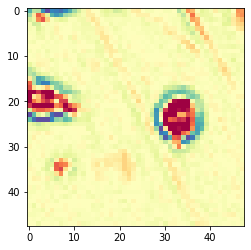

Epoch 152/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7242 - acc: 0.9438 - val_loss: 1.9199 - val_acc: 0.8925

Epoch 00152: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9199126011857361, 'val_acc': 0.8925233750699837, 'loss': 1.7242387046541419, 'acc': 0.9438285307509466, 'lr': 1e-06}


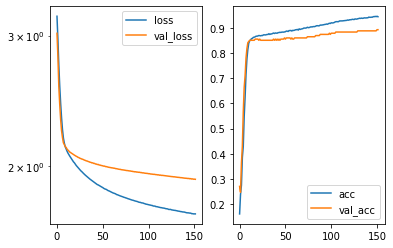

Predicted cell: Cells Probability: [[0.9933814]]
True Cell type: Cells
x [[0.15312223]]
True positional value x 0.2916666666666667
y [[0.23211299]]
True positional value y 0.2916666666666667


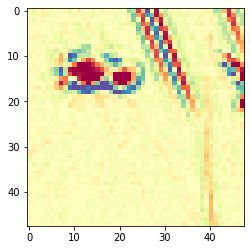

Epoch 153/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7218 - acc: 0.9473 - val_loss: 1.9188 - val_acc: 0.8925

Epoch 00153: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9188122816174944, 'val_acc': 0.8925233750699837, 'loss': 1.72179431861244, 'acc': 0.9472776575756943, 'lr': 1e-06}


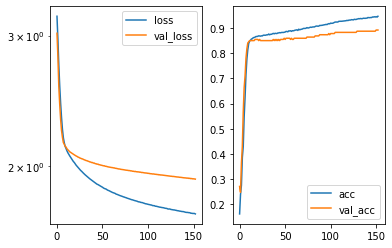

Predicted cell: Cells Probability: [[0.9814229]]
True Cell type: Cells
x [[0.19783863]]
True positional value x 0.2916666666666667
y [[0.4702746]]
True positional value y 0.2916666666666667


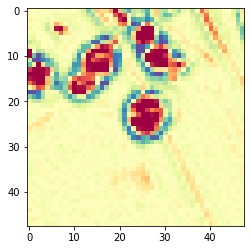

Epoch 154/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7223 - acc: 0.9480 - val_loss: 1.9185 - val_acc: 0.8925

Epoch 00154: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9184830678957645, 'val_acc': 0.8925233750699837, 'loss': 1.7222773664013509, 'acc': 0.9480167557436071, 'lr': 1e-06}


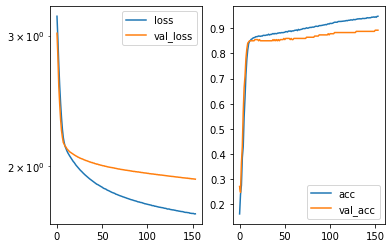

Predicted cell: Cells Probability: [[0.91944844]]
True Cell type: Cells
x [[0.27536362]]
True positional value x 0.2916666666666667
y [[0.5025509]]
True positional value y 0.2916666666666667


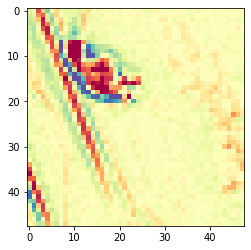

Epoch 155/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7202 - acc: 0.9470 - val_loss: 1.9178 - val_acc: 0.8925

Epoch 00155: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9178295725973966, 'val_acc': 0.8925233750699837, 'loss': 1.7202303788731856, 'acc': 0.9470312908148643, 'lr': 1e-06}


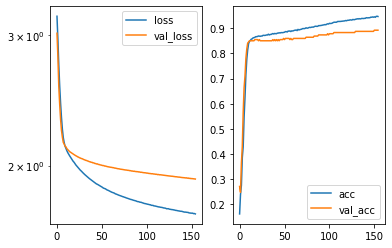

Predicted cell: Cells Probability: [[0.66478217]]
True Cell type: Cells
x [[0.49094832]]
True positional value x 0.5
y [[0.39228895]]
True positional value y 0.2916666666666667


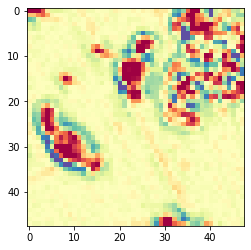

Epoch 156/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7209 - acc: 0.9480 - val_loss: 1.9172 - val_acc: 0.8925

Epoch 00156: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9172266989110787, 'val_acc': 0.8925233750699837, 'loss': 1.7209079700844956, 'acc': 0.9480167522193117, 'lr': 1e-06}


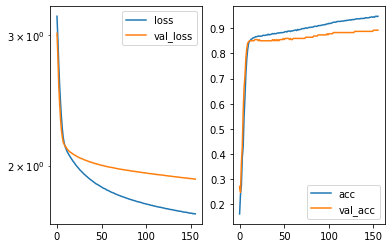

Predicted cell: Cells Probability: [[0.6662484]]
True Cell type: Cells
x [[0.49079815]]
True positional value x 0.5
y [[0.39160705]]
True positional value y 0.2916666666666667


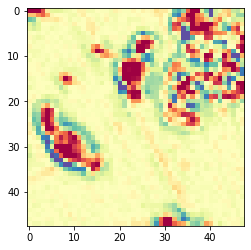

Epoch 157/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7200 - acc: 0.9500 - val_loss: 1.9169 - val_acc: 0.8925

Epoch 00157: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.916865185042408, 'val_acc': 0.8925233750699837, 'loss': 1.719986782986767, 'acc': 0.9499876859094686, 'lr': 1e-06}


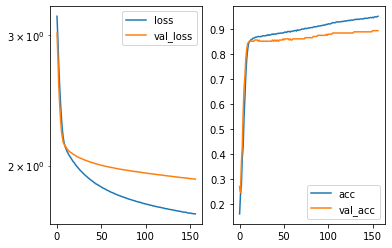

Predicted cell: Cells Probability: [[0.6677294]]
True Cell type: Cells
x [[0.48964334]]
True positional value x 0.5
y [[0.39307377]]
True positional value y 0.2916666666666667


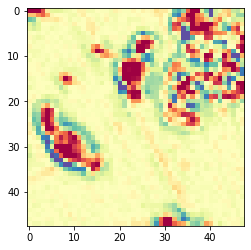

Epoch 158/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7185 - acc: 0.9495 - val_loss: 1.9162 - val_acc: 0.8925

Epoch 00158: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.916235366714335, 'val_acc': 0.8925233750699837, 'loss': 1.7185189287543268, 'acc': 0.9494949488781979, 'lr': 1e-06}


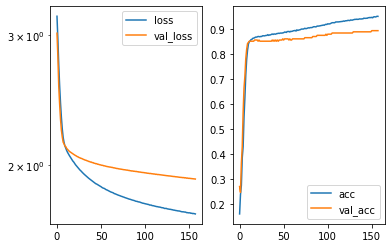

Predicted cell: Cells Probability: [[0.9907184]]
True Cell type: Cells
x [[0.29031128]]
True positional value x 0.2916666666666667
y [[0.48678082]]
True positional value y 0.7083333333333334


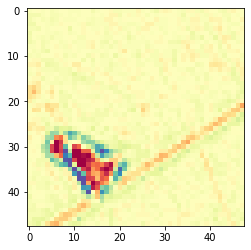

Epoch 159/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7178 - acc: 0.9500 - val_loss: 1.9154 - val_acc: 0.8925

Epoch 00159: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9154463070575323, 'val_acc': 0.8925233750699837, 'loss': 1.7177779126795796, 'acc': 0.9499876829725559, 'lr': 1e-06}


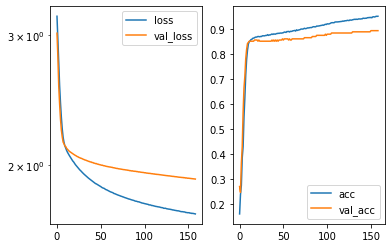

Predicted cell: Cells Probability: [[0.9748728]]
True Cell type: Cells
x [[0.30889535]]
True positional value x 0.2916666666666667
y [[0.3082518]]
True positional value y 0.5


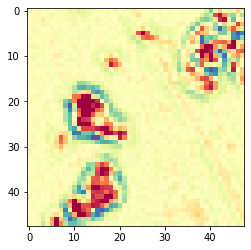

Epoch 160/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7167 - acc: 0.9507 - val_loss: 1.9146 - val_acc: 0.8925

Epoch 00160: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.914584212214033, 'val_acc': 0.8925233750699837, 'loss': 1.7166718488316373, 'acc': 0.9507267838130593, 'lr': 1e-06}


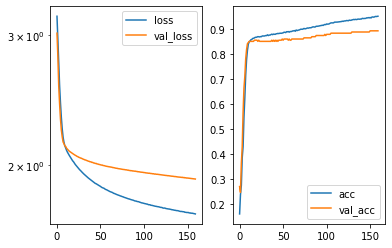

Predicted cell: Cells Probability: [[0.98988825]]
True Cell type: Cells
x [[0.52201474]]
True positional value x 0.5
y [[0.6267797]]
True positional value y 0.5


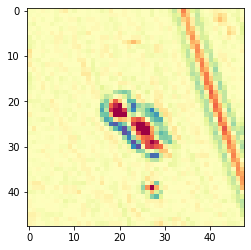

Epoch 161/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7153 - acc: 0.9507 - val_loss: 1.9146 - val_acc: 0.8972

Epoch 00161: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9146281068570146, 'val_acc': 0.8971962678098233, 'loss': 1.7153154761663767, 'acc': 0.9507267802593948, 'lr': 1e-06}


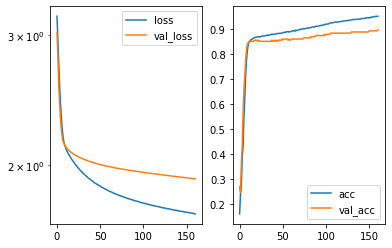

Predicted cell: Cells Probability: [[0.9826592]]
True Cell type: Cells
x [[0.19652677]]
True positional value x 0.2916666666666667
y [[0.47477603]]
True positional value y 0.2916666666666667


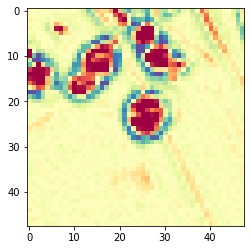

Epoch 162/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7148 - acc: 0.9515 - val_loss: 1.9136 - val_acc: 0.8972

Epoch 00162: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9136466044131841, 'val_acc': 0.8971962678098233, 'loss': 1.7148477417049985, 'acc': 0.9514658784713613, 'lr': 1e-06}


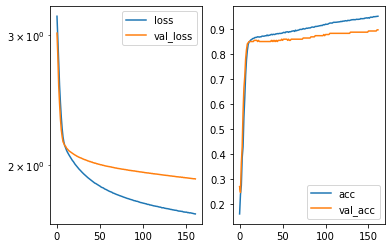

Predicted cell: Cells Probability: [[0.7680441]]
True Cell type: Cells
x [[0.2668942]]
True positional value x 0.2916666666666667
y [[0.45002556]]
True positional value y 0.2916666666666667


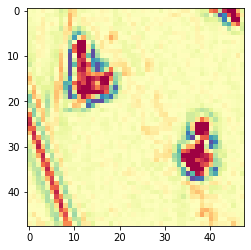

Epoch 163/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7148 - acc: 0.9534 - val_loss: 1.9131 - val_acc: 0.8972

Epoch 00163: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9131318408752156, 'val_acc': 0.8971962678098233, 'loss': 1.7148219873882273, 'acc': 0.9534368077120954, 'lr': 1e-06}


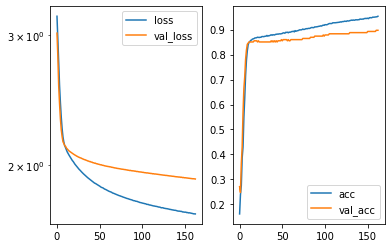

Predicted cell: Cells Probability: [[0.9663304]]
True Cell type: Cells
x [[0.50883317]]
True positional value x 0.5
y [[0.6489002]]
True positional value y 0.5


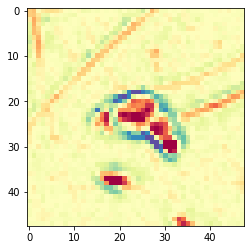

Epoch 164/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7142 - acc: 0.9539 - val_loss: 1.9125 - val_acc: 0.8972

Epoch 00164: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.912543716831742, 'val_acc': 0.8971962678098233, 'loss': 1.714172760058166, 'acc': 0.9539295474012722, 'lr': 1e-06}


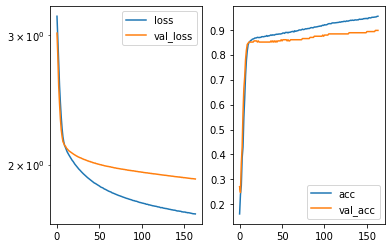

Predicted cell: Cells Probability: [[0.96005684]]
True Cell type: Cells
x [[0.6253207]]
True positional value x 0.7083333333333334
y [[0.31996456]]
True positional value y 0.2916666666666667


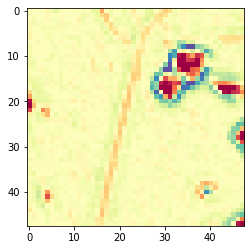

Epoch 165/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7120 - acc: 0.9537 - val_loss: 1.9117 - val_acc: 0.8972

Epoch 00165: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9116699929549315, 'val_acc': 0.8971962678098233, 'loss': 1.7120016867317394, 'acc': 0.9536831774098381, 'lr': 1e-06}


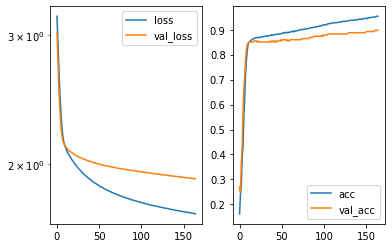

Predicted cell: Cells Probability: [[0.95044786]]
True Cell type: Cells
x [[0.45728576]]
True positional value x 0.5
y [[0.25547445]]
True positional value y 0.2916666666666667


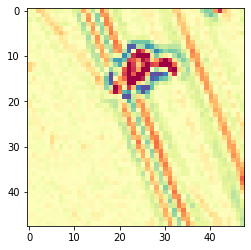

Epoch 166/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7127 - acc: 0.9544 - val_loss: 1.9114 - val_acc: 0.8972

Epoch 00166: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9113717424535306, 'val_acc': 0.8971962678098233, 'loss': 1.712656831911674, 'acc': 0.9544222758861268, 'lr': 1e-06}


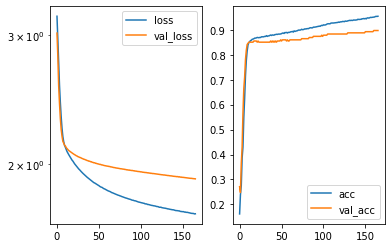

Predicted cell: Cells Probability: [[0.9365348]]
True Cell type: Cells
x [[0.2100888]]
True positional value x 0.2916666666666667
y [[0.58396727]]
True positional value y 0.7083333333333334


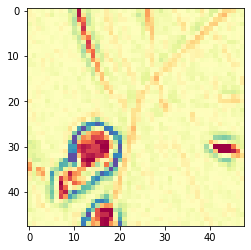

Epoch 167/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7121 - acc: 0.9529 - val_loss: 1.9107 - val_acc: 0.8972

Epoch 00167: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.910749859899004, 'val_acc': 0.8971962678098233, 'loss': 1.71214614935948, 'acc': 0.9529440768777105, 'lr': 1e-06}


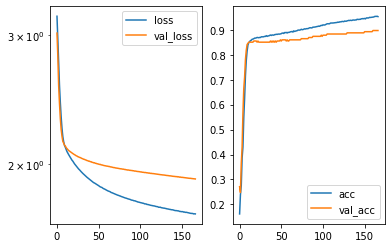

Predicted cell: Cells Probability: [[0.9536939]]
True Cell type: Cells
x [[0.24945693]]
True positional value x 0.2916666666666667
y [[0.6707878]]
True positional value y 0.7083333333333334


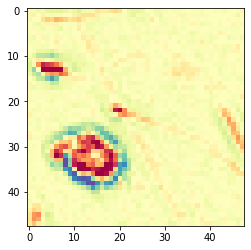

Epoch 168/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7111 - acc: 0.9539 - val_loss: 1.9107 - val_acc: 0.8972

Epoch 00168: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.910682264889512, 'val_acc': 0.8971962678098233, 'loss': 1.7111321143488427, 'acc': 0.9539295432749098, 'lr': 1e-06}


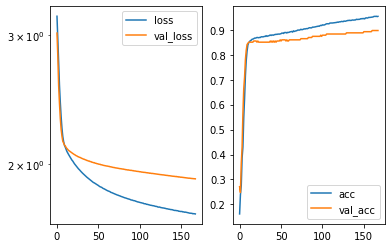

Predicted cell: Cells Probability: [[0.97051585]]
True Cell type: Cells
x [[0.49356216]]
True positional value x 0.5
y [[0.4753988]]
True positional value y 0.2916666666666667


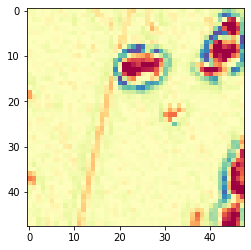

Epoch 169/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7108 - acc: 0.9542 - val_loss: 1.9094 - val_acc: 0.8972

Epoch 00169: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9093544115529997, 'val_acc': 0.8971962678098233, 'loss': 1.7108043928573977, 'acc': 0.9541759073631492, 'lr': 1e-06}


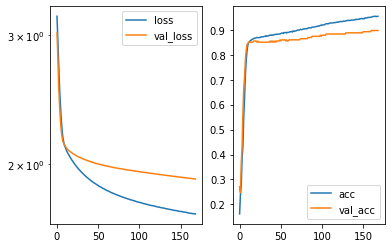

Predicted cell: Cells Probability: [[0.9008152]]
True Cell type: Cells
x [[0.17634022]]
True positional value x 0.2916666666666667
y [[0.2812681]]
True positional value y 0.2916666666666667


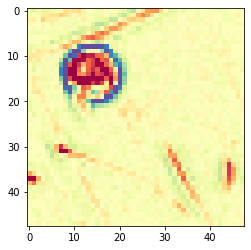

Epoch 170/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7090 - acc: 0.9554 - val_loss: 1.9095 - val_acc: 0.8972

Epoch 00170: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.909480949428594, 'val_acc': 0.8971962678098233, 'loss': 1.708974092046038, 'acc': 0.9554077425917019, 'lr': 1e-06}


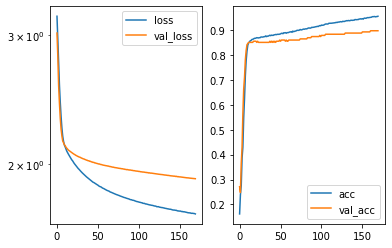

Predicted cell: Cells Probability: [[0.96019983]]
True Cell type: Cells
x [[0.76332384]]
True positional value x 0.7083333333333334
y [[0.4481977]]
True positional value y 0.5


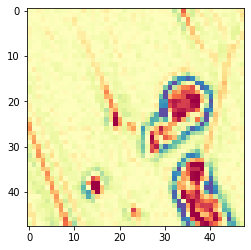

Epoch 171/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7088 - acc: 0.9554 - val_loss: 1.9084 - val_acc: 0.8972

Epoch 00171: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9083607007409924, 'val_acc': 0.8971962678098233, 'loss': 1.7087943044370193, 'acc': 0.9554077402421717, 'lr': 1e-06}


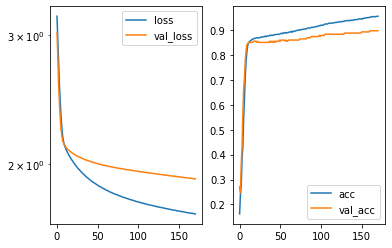

Predicted cell: Cells Probability: [[0.9705841]]
True Cell type: Cells
x [[0.24827486]]
True positional value x 0.2916666666666667
y [[0.4391851]]
True positional value y 0.2916666666666667


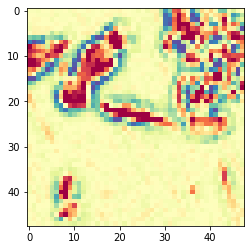

Epoch 172/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7085 - acc: 0.9549 - val_loss: 1.9081 - val_acc: 0.8972

Epoch 00172: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.908061939979268, 'val_acc': 0.8971962678098233, 'loss': 1.7084829318579209, 'acc': 0.95491500761627, 'lr': 1e-06}


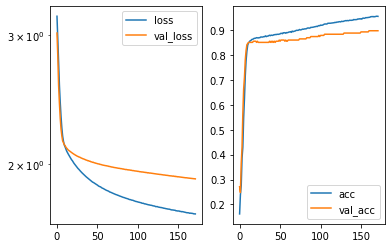

Predicted cell: Cells Probability: [[0.9913344]]
True Cell type: Cells
x [[0.28506026]]
True positional value x 0.2916666666666667
y [[0.48512557]]
True positional value y 0.7083333333333334


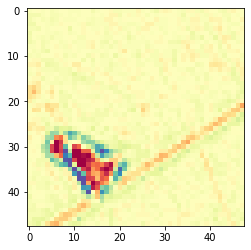

Epoch 173/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7073 - acc: 0.9564 - val_loss: 1.9072 - val_acc: 0.8972

Epoch 00173: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9071643475060152, 'val_acc': 0.8971962678098233, 'loss': 1.7073082002873314, 'acc': 0.9563932045541629, 'lr': 1e-06}


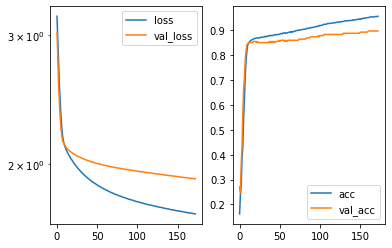

Predicted cell: Cells Probability: [[0.9645371]]
True Cell type: Cells
x [[0.5841145]]
True positional value x 0.7083333333333334
y [[0.7095549]]
True positional value y 0.7083333333333334


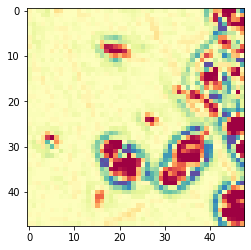

Epoch 174/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7062 - acc: 0.9576 - val_loss: 1.9068 - val_acc: 0.8972

Epoch 00174: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9067539288618853, 'val_acc': 0.8971962678098233, 'loss': 1.7061756940920618, 'acc': 0.9576250339088901, 'lr': 1e-06}


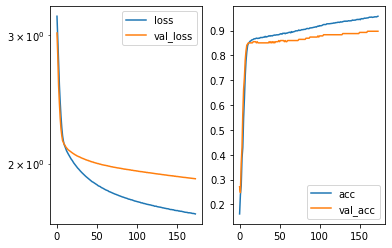

Predicted cell: Cells Probability: [[0.96863896]]
True Cell type: Cells
x [[0.41838428]]
True positional value x 0.5
y [[0.48179162]]
True positional value y 0.5


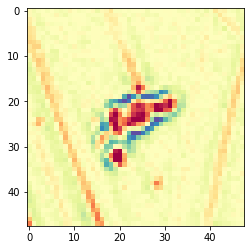

Epoch 175/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7062 - acc: 0.9571 - val_loss: 1.9063 - val_acc: 0.8972

Epoch 00175: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9062839757616274, 'val_acc': 0.8971962678098233, 'loss': 1.7062350146492646, 'acc': 0.9571322980523843, 'lr': 1e-06}


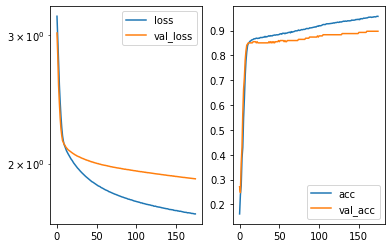

Predicted cell: Cells Probability: [[0.9943948]]
True Cell type: Cells
x [[0.57694966]]
True positional value x 0.5
y [[0.25442436]]
True positional value y 0.2916666666666667


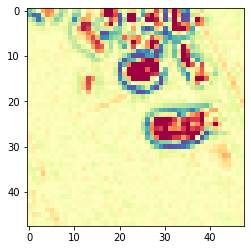

Epoch 176/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7050 - acc: 0.9569 - val_loss: 1.9057 - val_acc: 0.8972

Epoch 00176: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9056762033533827, 'val_acc': 0.8971962678098233, 'loss': 1.7050245693969914, 'acc': 0.9568859380611383, 'lr': 1e-06}


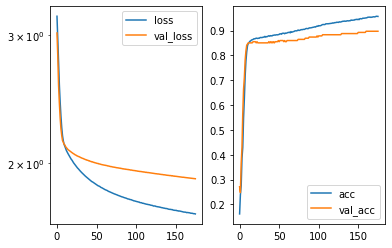

Predicted cell: Cells Probability: [[0.9649469]]
True Cell type: Cells
x [[0.5806908]]
True positional value x 0.7083333333333334
y [[0.7086929]]
True positional value y 0.7083333333333334


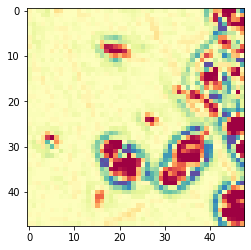

Epoch 177/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7048 - acc: 0.9571 - val_loss: 1.9050 - val_acc: 0.8972

Epoch 00177: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9049796300513722, 'val_acc': 0.8971962678098233, 'loss': 1.7048335348511305, 'acc': 0.9571322992418341, 'lr': 1e-06}


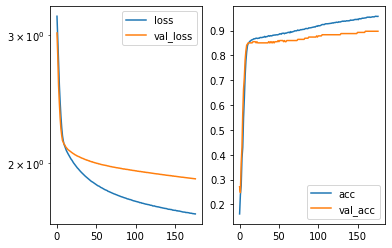

Predicted cell: Cells Probability: [[0.9925107]]
True Cell type: Cells
x [[0.4448219]]
True positional value x 0.5
y [[0.10291736]]
True positional value y 0.2916666666666667


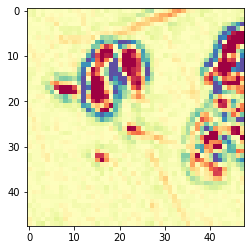

Epoch 178/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7048 - acc: 0.9581 - val_loss: 1.9052 - val_acc: 0.9019

Epoch 00178: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.905229974015851, 'val_acc': 0.9018691605496629, 'loss': 1.7048161835410849, 'acc': 0.9581177650222816, 'lr': 1e-06}


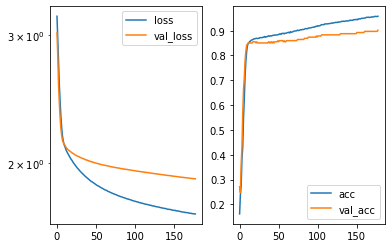

Predicted cell: Cells Probability: [[0.94174534]]
True Cell type: Cells
x [[0.87377805]]
True positional value x 0.7083333333333334
y [[0.2626073]]
True positional value y 0.2916666666666667


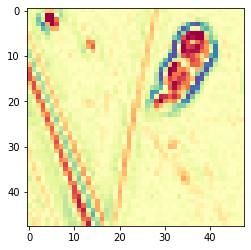

Epoch 179/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7032 - acc: 0.9569 - val_loss: 1.9041 - val_acc: 0.9019

Epoch 00179: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9040750387673067, 'val_acc': 0.9018691605496629, 'loss': 1.7032314497545218, 'acc': 0.9568859351242255, 'lr': 1e-06}


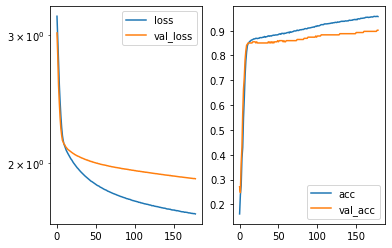

Predicted cell: Cells Probability: [[0.7414071]]
True Cell type: Cells
x [[0.8547446]]
True positional value x 0.7083333333333334
y [[0.60584223]]
True positional value y 0.7083333333333334


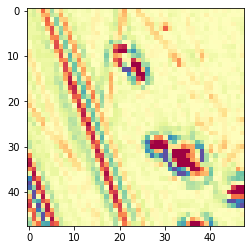

Epoch 180/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7025 - acc: 0.9606 - val_loss: 1.9042 - val_acc: 0.9019

Epoch 00180: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9041830334707954, 'val_acc': 0.9018691605496629, 'loss': 1.702499376872867, 'acc': 0.9605814331004877, 'lr': 1e-06}


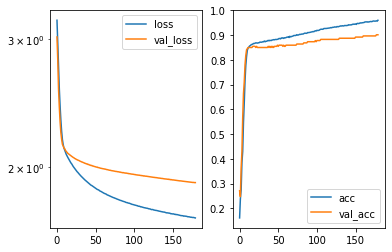

Predicted cell: Cells Probability: [[0.99262434]]
True Cell type: Cells
x [[0.05442002]]
True positional value x 0.2916666666666667
y [[0.3500225]]
True positional value y 0.5


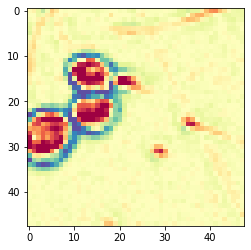

Epoch 181/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7024 - acc: 0.9589 - val_loss: 1.9031 - val_acc: 0.9019

Epoch 00181: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9031413470473244, 'val_acc': 0.9018691605496629, 'loss': 1.702405952825779, 'acc': 0.9588568629258722, 'lr': 1e-06}


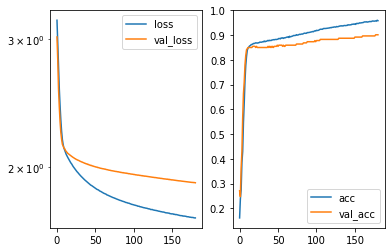

Predicted cell: Cells Probability: [[0.97546047]]
True Cell type: Cells
x [[0.5911553]]
True positional value x 0.5
y [[0.4790101]]
True positional value y 0.5


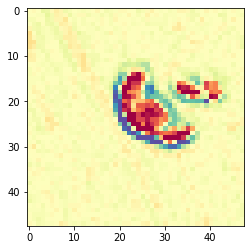

Epoch 182/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7020 - acc: 0.9606 - val_loss: 1.9029 - val_acc: 0.9019

Epoch 00182: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9029357890102352, 'val_acc': 0.9018691605496629, 'loss': 1.7019576069814697, 'acc': 0.9605814272266622, 'lr': 1e-06}


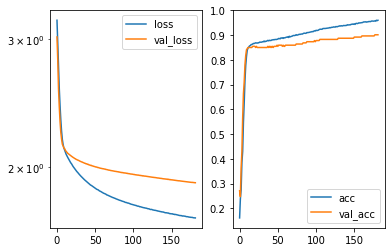

Predicted cell: Cells Probability: [[0.93883276]]
True Cell type: Cells
x [[0.22238399]]
True positional value x 0.2916666666666667
y [[0.48725975]]
True positional value y 0.2916666666666667


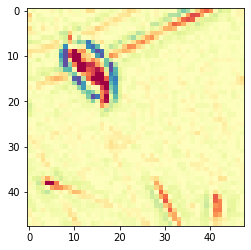

Epoch 183/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7004 - acc: 0.9613 - val_loss: 1.9028 - val_acc: 0.9019

Epoch 00183: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9028043590973471, 'val_acc': 0.9018691605496629, 'loss': 1.7003925214056959, 'acc': 0.9613205280377966, 'lr': 1e-06}


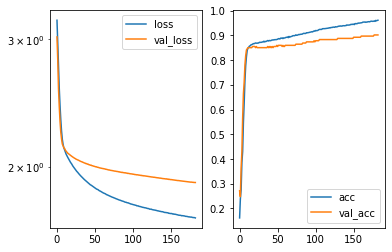

Predicted cell: Cells Probability: [[0.8253843]]
True Cell type: Cells
x [[0.5445328]]
True positional value x 0.5
y [[0.36129165]]
True positional value y 0.2916666666666667


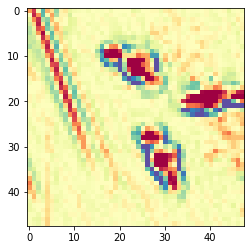

Epoch 184/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.7010 - acc: 0.9613 - val_loss: 1.9014 - val_acc: 0.9019

Epoch 00184: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.901364744266617, 'val_acc': 0.9018691605496629, 'loss': 1.7010157295094537, 'acc': 0.9613205289188703, 'lr': 1e-06}


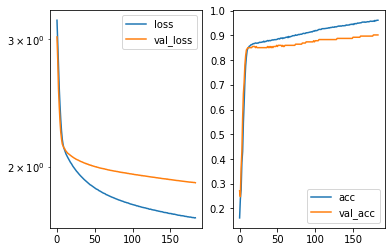

Predicted cell: Cells Probability: [[0.9626766]]
True Cell type: Cells
x [[0.66025025]]
True positional value x 0.5
y [[0.526576]]
True positional value y 0.2916666666666667


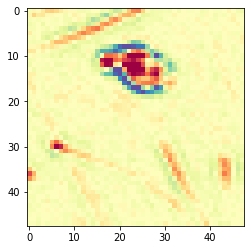

Epoch 185/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6992 - acc: 0.9613 - val_loss: 1.9014 - val_acc: 0.9019

Epoch 00185: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.901440344124197, 'val_acc': 0.9018691605496629, 'loss': 1.6992436241240125, 'acc': 0.9613205262609643, 'lr': 1e-06}


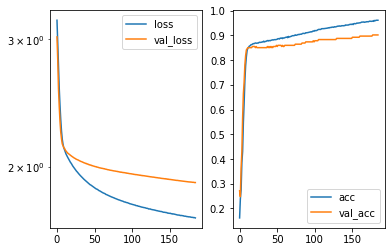

Predicted cell: Cells Probability: [[0.76847035]]
True Cell type: Cells
x [[0.2685871]]
True positional value x 0.2916666666666667
y [[0.45350382]]
True positional value y 0.2916666666666667


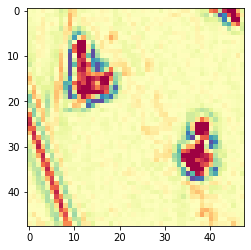

Epoch 186/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6985 - acc: 0.9628 - val_loss: 1.9008 - val_acc: 0.9019

Epoch 00186: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.9008293051585974, 'val_acc': 0.9018691605496629, 'loss': 1.698503138073914, 'acc': 0.9627987288230451, 'lr': 1e-06}


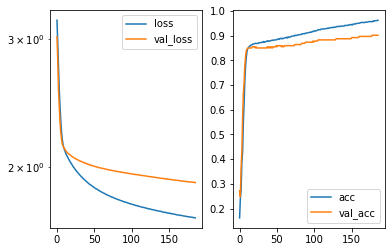

Predicted cell: Cells Probability: [[0.98986673]]
True Cell type: Cells
x [[0.3681018]]
True positional value x 0.5
y [[0.7132523]]
True positional value y 0.5


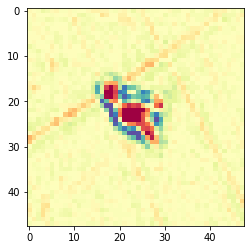

Epoch 187/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6981 - acc: 0.9628 - val_loss: 1.9002 - val_acc: 0.9019

Epoch 00187: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.900208258183203, 'val_acc': 0.9018691605496629, 'loss': 1.6981351009934194, 'acc': 0.9627987200123067, 'lr': 1e-06}


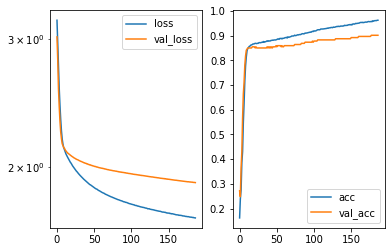

Predicted cell: Cells Probability: [[0.9918051]]
True Cell type: Cells
x [[0.18825844]]
True positional value x 0.2916666666666667
y [[0.67953557]]
True positional value y 0.7083333333333334


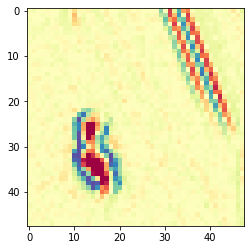

Epoch 188/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6971 - acc: 0.9618 - val_loss: 1.8999 - val_acc: 0.9019

Epoch 00188: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8999153386766665, 'val_acc': 0.9018691605496629, 'loss': 1.6970952946025475, 'acc': 0.961813259488933, 'lr': 1e-06}


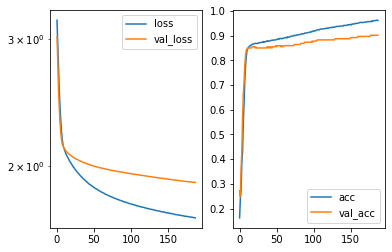

Predicted cell: Normal Probability: [[0.7528148]]
True Cell type: Normal
x [[0.55150723]]
True positional value x 0.5
y [[0.42005938]]
True positional value y 0.5


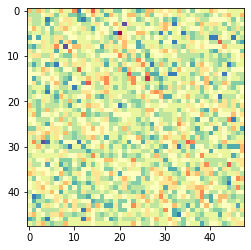

Epoch 189/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6977 - acc: 0.9611 - val_loss: 1.8989 - val_acc: 0.9019

Epoch 00189: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8988881077721855, 'val_acc': 0.9018691605496629, 'loss': 1.6976667886357144, 'acc': 0.9610741589568055, 'lr': 1e-06}


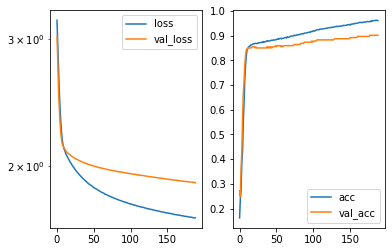

Predicted cell: Cells Probability: [[0.93923193]]
True Cell type: Cells
x [[0.22123829]]
True positional value x 0.2916666666666667
y [[0.48648235]]
True positional value y 0.2916666666666667


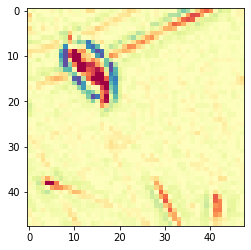

Epoch 190/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6958 - acc: 0.9633 - val_loss: 1.8991 - val_acc: 0.9019

Epoch 00190: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8991105556488037, 'val_acc': 0.9018691605496629, 'loss': 1.695823788995313, 'acc': 0.9632914546793627, 'lr': 1e-06}


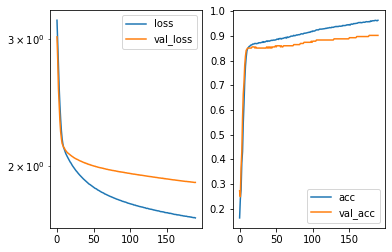

Predicted cell: Cells Probability: [[0.98065925]]
True Cell type: Cells
x [[0.3898603]]
True positional value x 0.2916666666666667
y [[0.42344543]]
True positional value y 0.2916666666666667


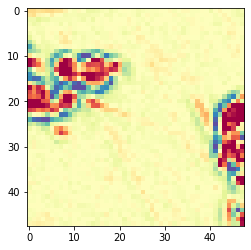

Epoch 191/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6961 - acc: 0.9633 - val_loss: 1.8978 - val_acc: 0.9019

Epoch 00191: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8978355398802, 'val_acc': 0.9018691605496629, 'loss': 1.6961215519793487, 'acc': 0.9632914567352017, 'lr': 1e-06}


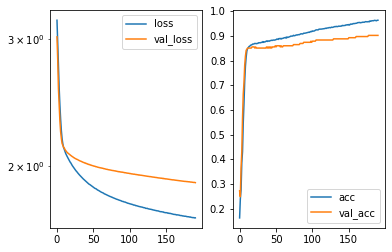

Predicted cell: Normal Probability: [[0.5276271]]
True Cell type: Normal
x [[0.15745829]]
True positional value x 0.5
y [[0.5972569]]
True positional value y 0.5


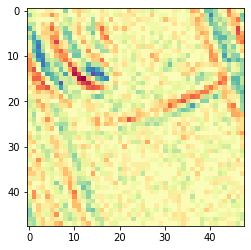

Epoch 192/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6956 - acc: 0.9643 - val_loss: 1.8984 - val_acc: 0.9019

Epoch 00192: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8984269616759826, 'val_acc': 0.9018691605496629, 'loss': 1.695648010125387, 'acc': 0.9642769152027364, 'lr': 1e-06}


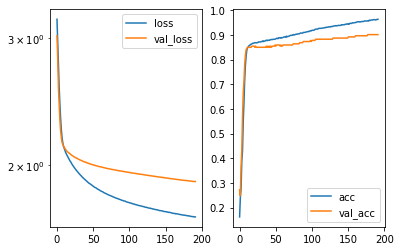

Predicted cell: Cells Probability: [[0.5784082]]
True Cell type: Normal
x [[0.5029454]]
True positional value x 0.5
y [[0.38989794]]
True positional value y 0.5


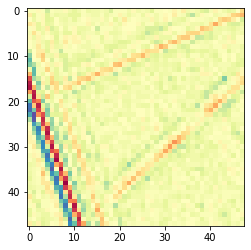

Epoch 193/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6942 - acc: 0.9648 - val_loss: 1.8968 - val_acc: 0.9019

Epoch 00193: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.896806967592685, 'val_acc': 0.9018691605496629, 'loss': 1.6941935321796584, 'acc': 0.9647696501487991, 'lr': 1e-06}


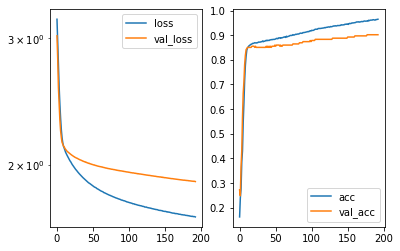

Predicted cell: Cells Probability: [[0.82873017]]
True Cell type: Cells
x [[0.5465962]]
True positional value x 0.5
y [[0.35608312]]
True positional value y 0.2916666666666667


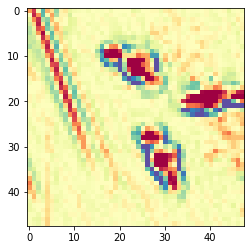

Epoch 194/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6939 - acc: 0.9653 - val_loss: 1.8973 - val_acc: 0.9019

Epoch 00194: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8972891947933446, 'val_acc': 0.9018691605496629, 'loss': 1.6938965478005683, 'acc': 0.9652623862843115, 'lr': 1e-06}


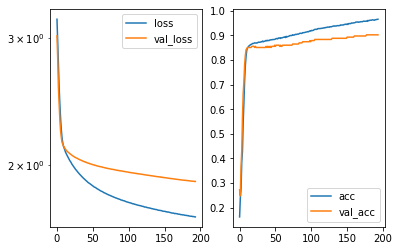

Predicted cell: Cells Probability: [[0.99676394]]
True Cell type: Cells
x [[0.40937197]]
True positional value x 0.5
y [[0.50980943]]
True positional value y 0.7083333333333334


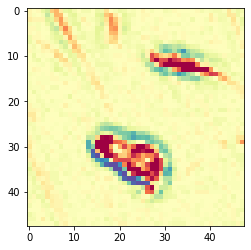

Epoch 195/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6942 - acc: 0.9655 - val_loss: 1.8961 - val_acc: 0.9019

Epoch 00195: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8960614694613163, 'val_acc': 0.9018691605496629, 'loss': 1.694223506898826, 'acc': 0.9655087562757456, 'lr': 1e-06}


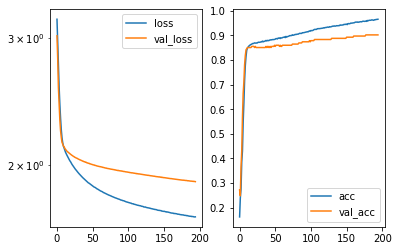

Predicted cell: Cells Probability: [[0.9792876]]
True Cell type: Cells
x [[0.5556904]]
True positional value x 0.7083333333333334
y [[0.5680319]]
True positional value y 0.5


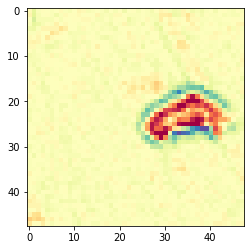

Epoch 196/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6927 - acc: 0.9655 - val_loss: 1.8959 - val_acc: 0.9019

Epoch 00196: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.895939925006617, 'val_acc': 0.9018691605496629, 'loss': 1.6927178197965507, 'acc': 0.965508753030457, 'lr': 1e-06}


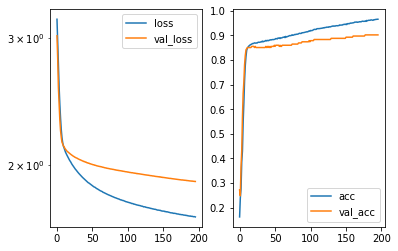

Predicted cell: Cells Probability: [[0.51960343]]
True Cell type: Normal
x [[0.3382319]]
True positional value x 0.5
y [[0.4753073]]
True positional value y 0.5


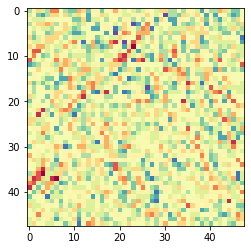

Epoch 197/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6927 - acc: 0.9667 - val_loss: 1.8954 - val_acc: 0.9019

Epoch 00197: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.895389826498299, 'val_acc': 0.9018691605496629, 'loss': 1.6927493793913284, 'acc': 0.9667405814747412, 'lr': 1e-06}


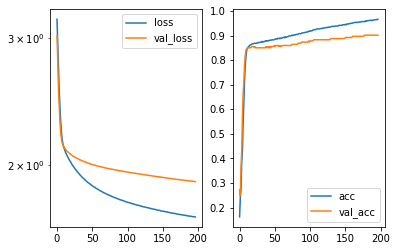

Predicted cell: Cells Probability: [[0.9898662]]
True Cell type: Cells
x [[0.61332184]]
True positional value x 0.2916666666666667
y [[0.43944696]]
True positional value y 0.2916666666666667


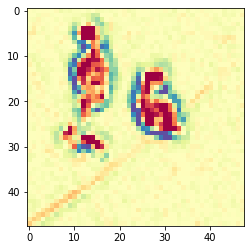

Epoch 198/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6930 - acc: 0.9665 - val_loss: 1.8949 - val_acc: 0.9019

Epoch 00198: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8949028320401629, 'val_acc': 0.9018691605496629, 'loss': 1.6930275558103742, 'acc': 0.9664942212044885, 'lr': 1e-06}


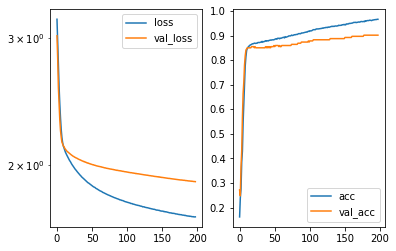

Predicted cell: Cells Probability: [[0.9692849]]
True Cell type: Cells
x [[0.16009627]]
True positional value x 0.2916666666666667
y [[0.7793102]]
True positional value y 0.7083333333333334


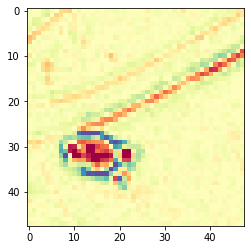

Epoch 199/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6921 - acc: 0.9667 - val_loss: 1.8940 - val_acc: 0.9019

Epoch 00199: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8940422657494234, 'val_acc': 0.9018691605496629, 'loss': 1.6921206682472576, 'acc': 0.9667405823558151, 'lr': 1e-06}


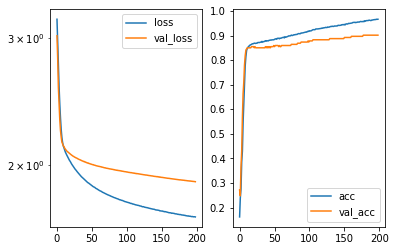

Predicted cell: Cells Probability: [[0.9568635]]
True Cell type: Cells
x [[0.70076716]]
True positional value x 0.7083333333333334
y [[0.5155927]]
True positional value y 0.5


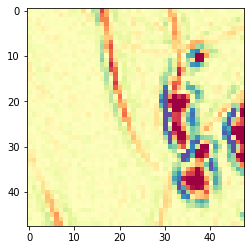

Epoch 200/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6912 - acc: 0.9670 - val_loss: 1.8938 - val_acc: 0.9019

Epoch 00200: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8937922615871252, 'val_acc': 0.9018691605496629, 'loss': 1.691214524369194, 'acc': 0.9669869499977188, 'lr': 1e-06}


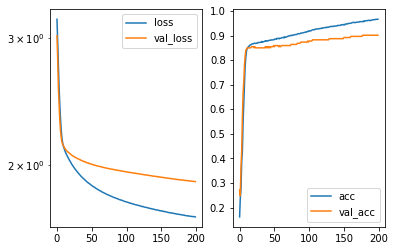

Predicted cell: Cells Probability: [[0.9880882]]
True Cell type: Cells
x [[0.3802918]]
True positional value x 0.5
y [[0.33886254]]
True positional value y 0.2916666666666667


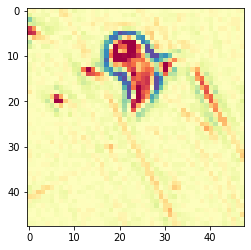

Epoch 201/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6911 - acc: 0.9672 - val_loss: 1.8933 - val_acc: 0.9112

Epoch 00201: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8932972979322773, 'val_acc': 0.9112149460293423, 'loss': 1.6910987849539798, 'acc': 0.9672333161417972, 'lr': 1e-06}


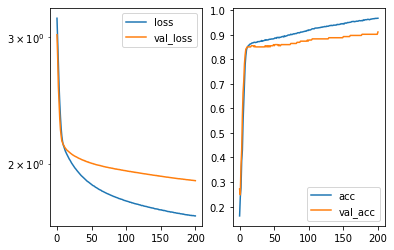

Predicted cell: Cells Probability: [[0.9926092]]
True Cell type: Cells
x [[0.18885298]]
True positional value x 0.2916666666666667
y [[0.6812433]]
True positional value y 0.7083333333333334


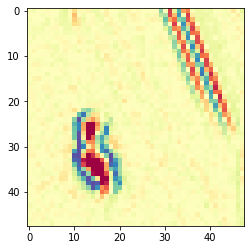

Epoch 202/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6895 - acc: 0.9667 - val_loss: 1.8931 - val_acc: 0.9112

Epoch 00202: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8931134961475835, 'val_acc': 0.9112149460293423, 'loss': 1.6895399410227128, 'acc': 0.966740584411654, 'lr': 1e-06}


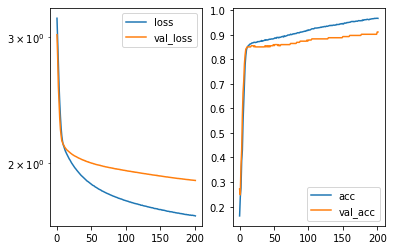

Predicted cell: Cells Probability: [[0.9744168]]
True Cell type: Cells
x [[0.25385857]]
True positional value x 0.2916666666666667
y [[0.44722584]]
True positional value y 0.2916666666666667


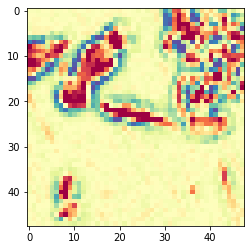

Epoch 203/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6890 - acc: 0.9675 - val_loss: 1.8925 - val_acc: 0.9112

Epoch 00203: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8925446338742693, 'val_acc': 0.9112149460293423, 'loss': 1.6889618988194528, 'acc': 0.9674796805384125, 'lr': 1e-06}


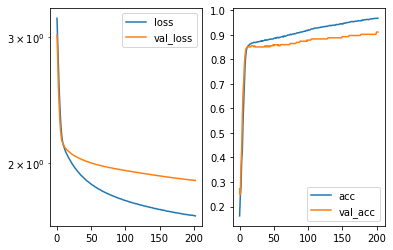

Predicted cell: Cells Probability: [[0.98864007]]
True Cell type: Cells
x [[0.69289565]]
True positional value x 0.7083333333333334
y [[0.49955752]]
True positional value y 0.2916666666666667


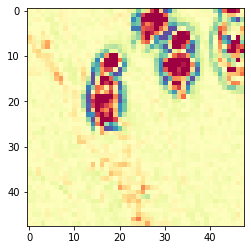

Epoch 204/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6883 - acc: 0.9680 - val_loss: 1.8918 - val_acc: 0.9112

Epoch 00204: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8918462367815392, 'val_acc': 0.9112149460293423, 'loss': 1.6883268917567273, 'acc': 0.967972413737012, 'lr': 1e-06}


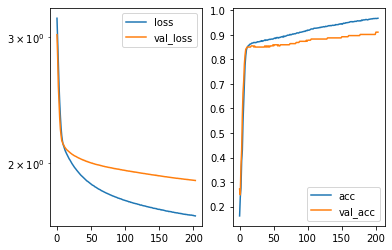

Predicted cell: Cells Probability: [[0.9899249]]
True Cell type: Cells
x [[0.16926365]]
True positional value x 0.5
y [[0.48727643]]
True positional value y 0.7083333333333334


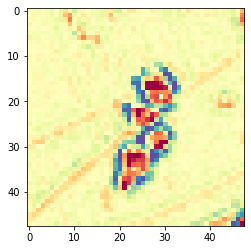

Epoch 205/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6880 - acc: 0.9675 - val_loss: 1.8913 - val_acc: 0.9112

Epoch 00205: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8913220467968521, 'val_acc': 0.9112149460293423, 'loss': 1.688012629754733, 'acc': 0.9674796861332313, 'lr': 1e-06}


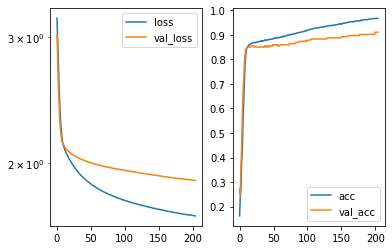

Predicted cell: Cells Probability: [[0.98896503]]
True Cell type: Cells
x [[0.2665075]]
True positional value x 0.2916666666666667
y [[0.3472156]]
True positional value y 0.5


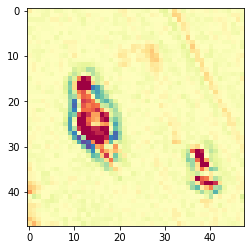

Epoch 206/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6875 - acc: 0.9685 - val_loss: 1.8911 - val_acc: 0.9159

Epoch 00206: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8910868658083622, 'val_acc': 0.9158878387691819, 'loss': 1.6874680670355011, 'acc': 0.9684651522220546, 'lr': 1e-06}


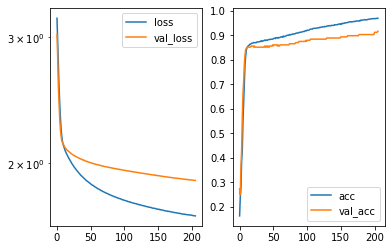

Predicted cell: Cells Probability: [[0.9478231]]
True Cell type: Cells
x [[0.33671597]]
True positional value x 0.2916666666666667
y [[0.6574692]]
True positional value y 0.5


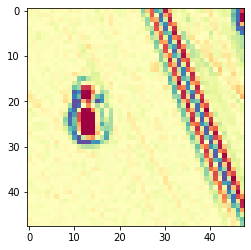

Epoch 207/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6875 - acc: 0.9677 - val_loss: 1.8907 - val_acc: 0.9159

Epoch 00207: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8906972140909355, 'val_acc': 0.9158878387691819, 'loss': 1.6875083683805239, 'acc': 0.9677260487530143, 'lr': 1e-06}


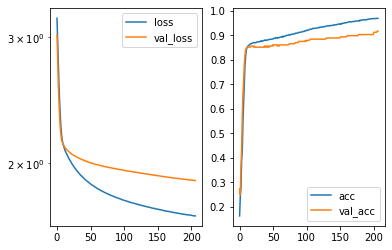

Predicted cell: Cells Probability: [[0.95067674]]
True Cell type: Cells
x [[0.3896049]]
True positional value x 0.2916666666666667
y [[0.79283136]]
True positional value y 0.7083333333333334


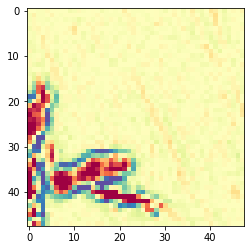

Epoch 208/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6871 - acc: 0.9682 - val_loss: 1.8902 - val_acc: 0.9159

Epoch 00208: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8902022114423949, 'val_acc': 0.9158878387691819, 'loss': 1.68711900899022, 'acc': 0.9682187763861642, 'lr': 1e-06}


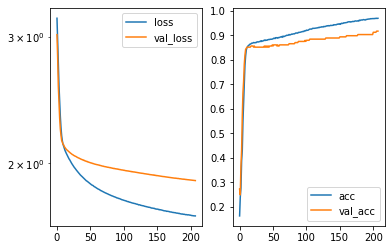

Predicted cell: Cells Probability: [[0.9337303]]
True Cell type: Cells
x [[0.45727858]]
True positional value x 0.5
y [[0.6773906]]
True positional value y 0.7083333333333334


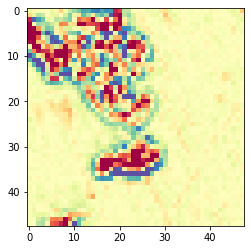

Epoch 209/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6862 - acc: 0.9690 - val_loss: 1.8896 - val_acc: 0.9159

Epoch 00209: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.88961609501705, 'val_acc': 0.9158878387691819, 'loss': 1.6861513581702379, 'acc': 0.9689578780783723, 'lr': 1e-06}


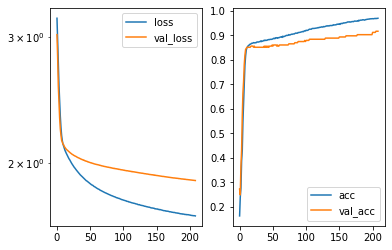

Predicted cell: Cells Probability: [[0.98050416]]
True Cell type: Cells
x [[0.6390439]]
True positional value x 0.5
y [[0.2354139]]
True positional value y 0.2916666666666667


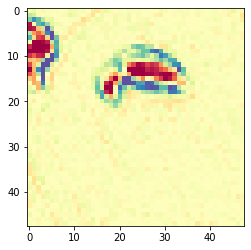

Epoch 210/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6855 - acc: 0.9687 - val_loss: 1.8894 - val_acc: 0.9159

Epoch 00210: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8894037108555017, 'val_acc': 0.9158878387691819, 'loss': 1.6854993349873217, 'acc': 0.9687115095847638, 'lr': 1e-06}


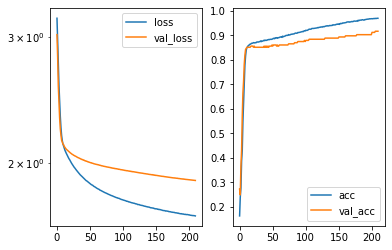

Predicted cell: Cells Probability: [[0.91178125]]
True Cell type: Normal
x [[0.39890257]]
True positional value x 0.5
y [[0.47974473]]
True positional value y 0.5


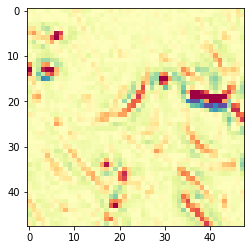

Epoch 211/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6855 - acc: 0.9695 - val_loss: 1.8886 - val_acc: 0.9206

Epoch 00211: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8886380240181897, 'val_acc': 0.9205607315090215, 'loss': 1.685482266208285, 'acc': 0.9694506071799787, 'lr': 1e-06}


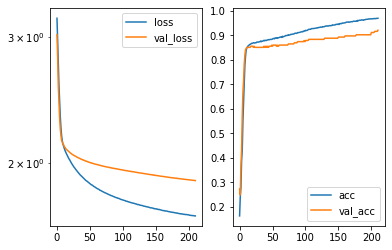

Predicted cell: Cells Probability: [[0.9914976]]
True Cell type: Cells
x [[0.49408495]]
True positional value x 0.5
y [[0.44807026]]
True positional value y 0.5


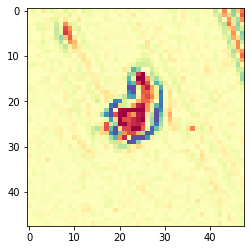

Epoch 212/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6849 - acc: 0.9695 - val_loss: 1.8888 - val_acc: 0.9206

Epoch 00212: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8887780514832968, 'val_acc': 0.9205607315090215, 'loss': 1.6849484449538377, 'acc': 0.9694506118643546, 'lr': 1e-06}


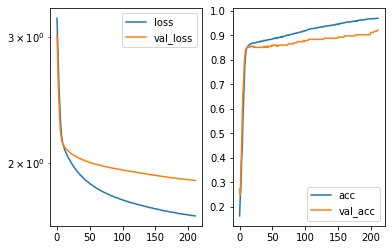

Predicted cell: Cells Probability: [[0.9564557]]
True Cell type: Normal
x [[0.5366767]]
True positional value x 0.5
y [[0.5455684]]
True positional value y 0.5


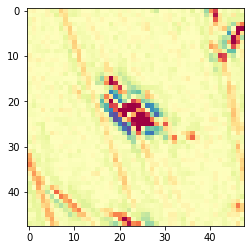

Epoch 213/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6841 - acc: 0.9692 - val_loss: 1.8879 - val_acc: 0.9206

Epoch 00213: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.887859075982994, 'val_acc': 0.9205607315090215, 'loss': 1.6840773708687007, 'acc': 0.9692042448392023, 'lr': 1e-06}


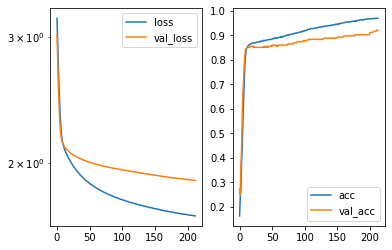

Predicted cell: Cells Probability: [[0.97169614]]
True Cell type: Cells
x [[0.16011858]]
True positional value x 0.2916666666666667
y [[0.7768552]]
True positional value y 0.7083333333333334


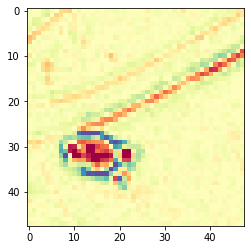

Epoch 214/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6838 - acc: 0.9709 - val_loss: 1.8877 - val_acc: 0.9206

Epoch 00214: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.88769901690082, 'val_acc': 0.9205607315090215, 'loss': 1.6837672772270085, 'acc': 0.970928809991697, 'lr': 1e-06}


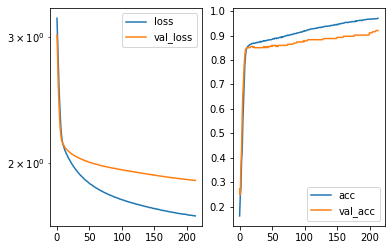

Predicted cell: Cells Probability: [[0.9798257]]
True Cell type: Cells
x [[0.53673124]]
True positional value x 0.5
y [[0.77362716]]
True positional value y 0.7083333333333334


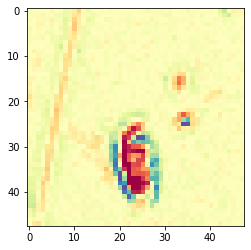

Epoch 215/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6838 - acc: 0.9699 - val_loss: 1.8869 - val_acc: 0.9206

Epoch 00215: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8868774710414566, 'val_acc': 0.9205607315090215, 'loss': 1.683787073605047, 'acc': 0.9699433435944977, 'lr': 1e-06}


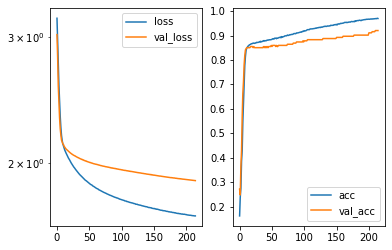

Predicted cell: Cells Probability: [[0.9903825]]
True Cell type: Cells
x [[0.75814486]]
True positional value x 0.7083333333333334
y [[0.337503]]
True positional value y 0.2916666666666667


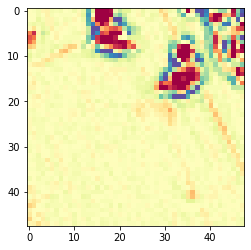

Epoch 216/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6824 - acc: 0.9704 - val_loss: 1.8865 - val_acc: 0.9206

Epoch 00216: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8864946955832365, 'val_acc': 0.9205607315090215, 'loss': 1.6823906229176113, 'acc': 0.9704360721087215, 'lr': 1e-06}


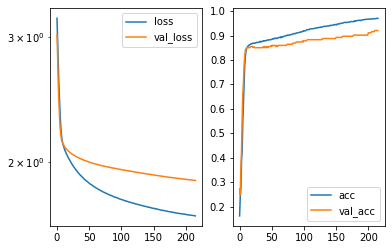

Predicted cell: Cells Probability: [[0.9864661]]
True Cell type: Cells
x [[0.2193749]]
True positional value x 0.2916666666666667
y [[0.61977965]]
True positional value y 0.7083333333333334


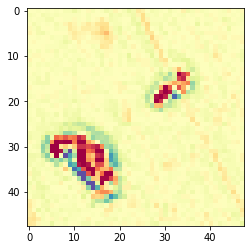

Epoch 217/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6824 - acc: 0.9687 - val_loss: 1.8859 - val_acc: 0.9206

Epoch 00217: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8858999147593418, 'val_acc': 0.9205607315090215, 'loss': 1.682357704736353, 'acc': 0.9687115081163075, 'lr': 1e-06}


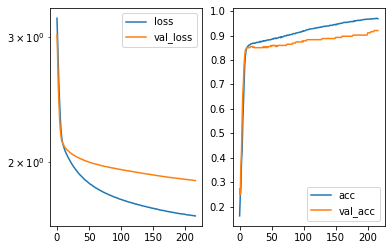

Predicted cell: Cells Probability: [[0.9958937]]
True Cell type: Cells
x [[0.6561092]]
True positional value x 0.7083333333333334
y [[0.49771115]]
True positional value y 0.2916666666666667


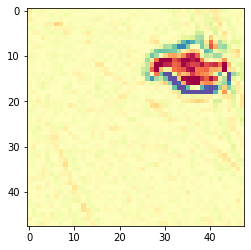

Epoch 218/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6813 - acc: 0.9699 - val_loss: 1.8860 - val_acc: 0.9206

Epoch 00218: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8859712799018788, 'val_acc': 0.9205607315090215, 'loss': 1.6812666457813636, 'acc': 0.9699433403492091, 'lr': 1e-06}


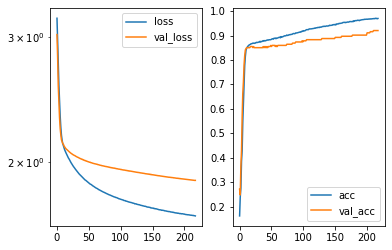

Predicted cell: Cells Probability: [[0.9635934]]
True Cell type: Cells
x [[0.41043386]]
True positional value x 0.7083333333333334
y [[0.35538933]]
True positional value y 0.2916666666666667


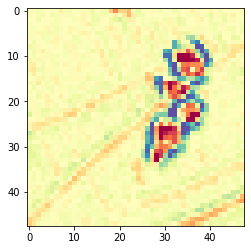

Epoch 219/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6804 - acc: 0.9714 - val_loss: 1.8850 - val_acc: 0.9206

Epoch 00219: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8849646421236412, 'val_acc': 0.9205607315090215, 'loss': 1.6804189520182942, 'acc': 0.9714215370374644, 'lr': 1e-06}


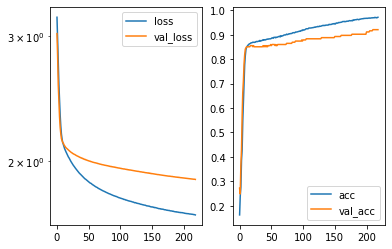

Predicted cell: Cells Probability: [[0.9933868]]
True Cell type: Cells
x [[0.27694318]]
True positional value x 0.2916666666666667
y [[0.47604337]]
True positional value y 0.7083333333333334


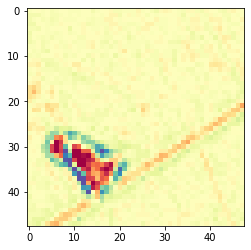

Epoch 220/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6814 - acc: 0.9695 - val_loss: 1.8855 - val_acc: 0.9206

Epoch 00220: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8855359554290771, 'val_acc': 0.9205607315090215, 'loss': 1.6814030723696303, 'acc': 0.9694506121727303, 'lr': 1e-06}


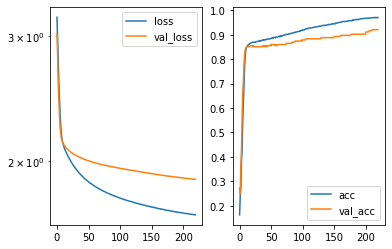

Predicted cell: Cells Probability: [[0.9466718]]
True Cell type: Cells
x [[0.76115435]]
True positional value x 0.7083333333333334
y [[0.35314983]]
True positional value y 0.2916666666666667


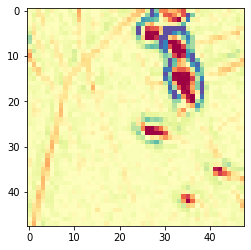

Epoch 221/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6799 - acc: 0.9709 - val_loss: 1.8842 - val_acc: 0.9206

Epoch 00221: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.884223470063967, 'val_acc': 0.9205607315090215, 'loss': 1.6799448653670126, 'acc': 0.9709288064674017, 'lr': 1e-06}


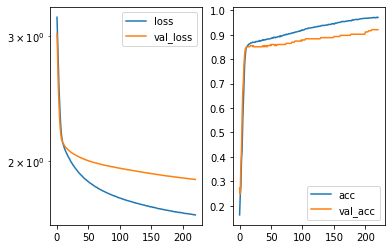

Predicted cell: Cells Probability: [[0.9884454]]
True Cell type: Cells
x [[0.36097884]]
True positional value x 0.7083333333333334
y [[0.32672918]]
True positional value y 0.5


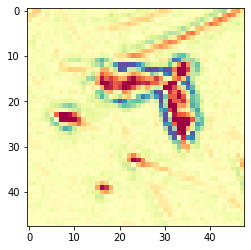

Epoch 222/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6809 - acc: 0.9707 - val_loss: 1.8841 - val_acc: 0.9206

Epoch 00222: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8841096886964601, 'val_acc': 0.9205607315090215, 'loss': 1.6808956060599858, 'acc': 0.9706824432308669, 'lr': 1e-06}


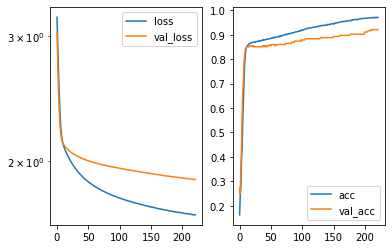

Predicted cell: Cells Probability: [[0.9961583]]
True Cell type: Cells
x [[0.57629263]]
True positional value x 0.5
y [[0.25338507]]
True positional value y 0.2916666666666667


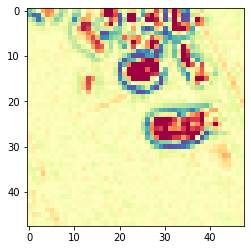

Epoch 223/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6801 - acc: 0.9714 - val_loss: 1.8833 - val_acc: 0.9206

Epoch 00223: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8832573389338556, 'val_acc': 0.9205607315090215, 'loss': 1.6800984211759808, 'acc': 0.9714215396660013, 'lr': 1e-06}


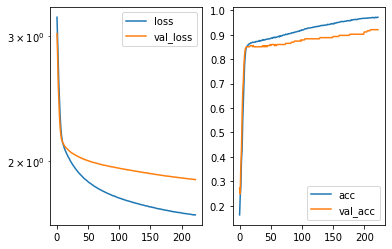

Predicted cell: Cells Probability: [[0.96867555]]
True Cell type: Cells
x [[0.4285546]]
True positional value x 0.5
y [[0.48571792]]
True positional value y 0.5


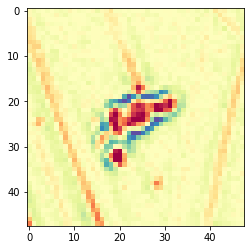

Epoch 224/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6791 - acc: 0.9719 - val_loss: 1.8829 - val_acc: 0.9206

Epoch 00224: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8828873823736316, 'val_acc': 0.9205607315090215, 'loss': 1.6790818963388, 'acc': 0.9719142717045204, 'lr': 1e-06}


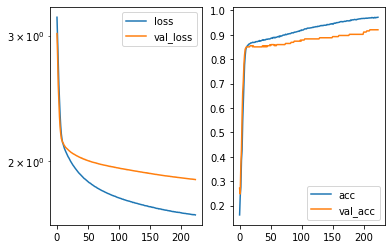

Predicted cell: Cells Probability: [[0.9882625]]
True Cell type: Cells
x [[0.38246235]]
True positional value x 0.5
y [[0.33391172]]
True positional value y 0.2916666666666667


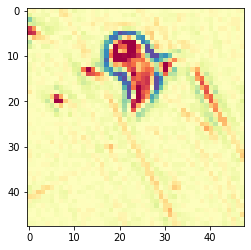

Epoch 225/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6778 - acc: 0.9724 - val_loss: 1.8826 - val_acc: 0.9206

Epoch 00225: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8825685398600926, 'val_acc': 0.9205607315090215, 'loss': 1.6777911516033566, 'acc': 0.9724070004977508, 'lr': 1e-06}


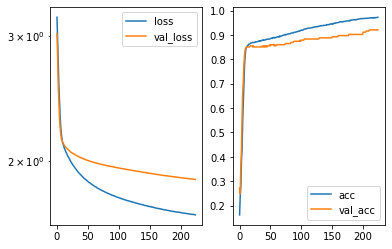

Predicted cell: Normal Probability: [[0.7764719]]
True Cell type: Normal
x [[0.6451566]]
True positional value x 0.5
y [[0.4302711]]
True positional value y 0.5


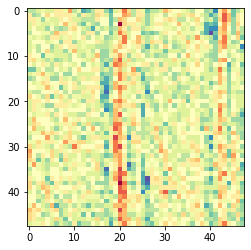

Epoch 226/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6790 - acc: 0.9719 - val_loss: 1.8820 - val_acc: 0.9206

Epoch 00226: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.882003256093676, 'val_acc': 0.9205607315090215, 'loss': 1.6789546894539633, 'acc': 0.9719142775489767, 'lr': 1e-06}


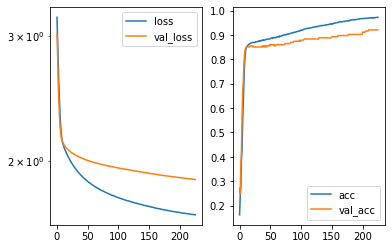

Predicted cell: Cells Probability: [[0.96439147]]
True Cell type: Cells
x [[0.40852228]]
True positional value x 0.7083333333333334
y [[0.35244226]]
True positional value y 0.2916666666666667


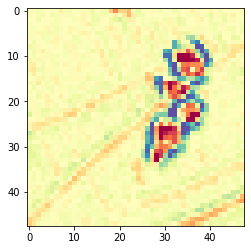

Epoch 227/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6769 - acc: 0.9724 - val_loss: 1.8821 - val_acc: 0.9206

Epoch 00227: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8821185793832085, 'val_acc': 0.9205607315090215, 'loss': 1.6768660217002274, 'acc': 0.9724070004977508, 'lr': 1e-06}


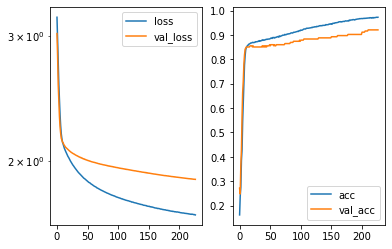

Predicted cell: Cells Probability: [[0.8400156]]
True Cell type: Cells
x [[0.5509363]]
True positional value x 0.5
y [[0.35973197]]
True positional value y 0.2916666666666667


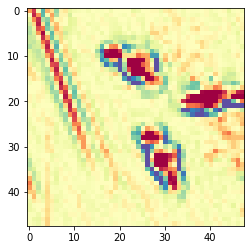

Epoch 228/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6769 - acc: 0.9719 - val_loss: 1.8812 - val_acc: 0.9206

Epoch 00228: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8811886867630148, 'val_acc': 0.9205607315090215, 'loss': 1.6769386506720874, 'acc': 0.9719142737603593, 'lr': 1e-06}


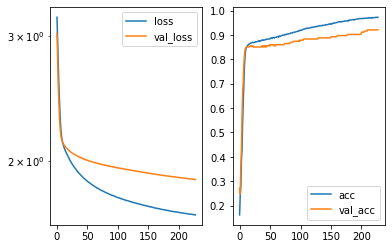

Predicted cell: Cells Probability: [[0.98070586]]
True Cell type: Cells
x [[0.535386]]
True positional value x 0.5
y [[0.7706801]]
True positional value y 0.7083333333333334


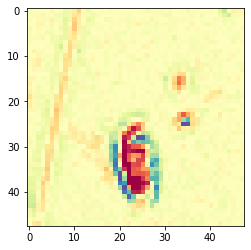

Epoch 229/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6768 - acc: 0.9724 - val_loss: 1.8813 - val_acc: 0.9206

Epoch 00229: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8813276970497916, 'val_acc': 0.9205607315090215, 'loss': 1.6767725269322795, 'acc': 0.9724070042863683, 'lr': 1e-06}


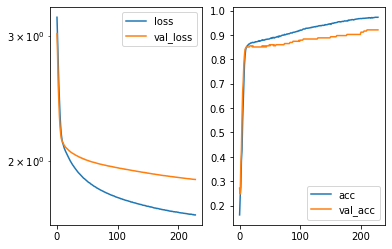

Predicted cell: Cells Probability: [[0.94372]]
True Cell type: Cells
x [[0.77892506]]
True positional value x 0.7083333333333334
y [[0.31763932]]
True positional value y 0.2916666666666667


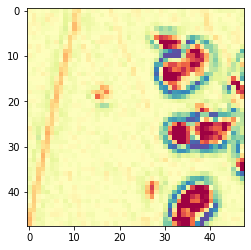

Epoch 230/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6772 - acc: 0.9739 - val_loss: 1.8803 - val_acc: 0.9206

Epoch 00230: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8803375903691086, 'val_acc': 0.9205607315090215, 'loss': 1.6771611570871414, 'acc': 0.9738851997851738, 'lr': 1e-06}


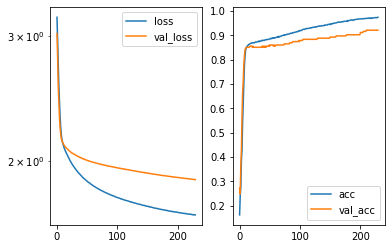

Predicted cell: Cells Probability: [[0.9935442]]
True Cell type: Cells
x [[0.37233666]]
True positional value x 0.2916666666666667
y [[0.806532]]
True positional value y 0.7083333333333334


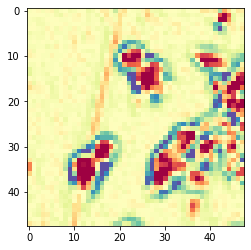

Epoch 231/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6763 - acc: 0.9731 - val_loss: 1.8806 - val_acc: 0.9252

Epoch 00231: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8806167852098696, 'val_acc': 0.9252336242488611, 'loss': 1.6763016448346344, 'acc': 0.9731461039667912, 'lr': 1e-06}


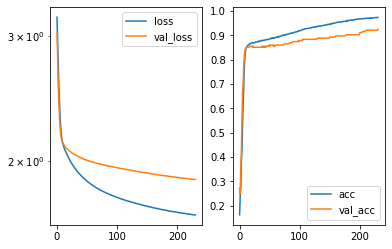

Predicted cell: Cells Probability: [[0.92314893]]
True Cell type: Cells
x [[0.26432672]]
True positional value x 0.5
y [[0.68222725]]
True positional value y 0.7083333333333334


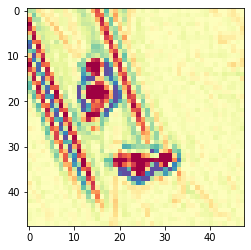

Epoch 232/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6755 - acc: 0.9746 - val_loss: 1.8796 - val_acc: 0.9252

Epoch 00232: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.879645024504617, 'val_acc': 0.9252336242488611, 'loss': 1.6755300041019225, 'acc': 0.9746242991572209, 'lr': 1e-06}


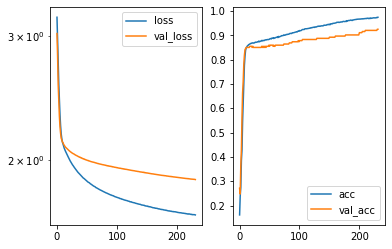

Predicted cell: Cells Probability: [[0.9871317]]
True Cell type: Cells
x [[0.48963368]]
True positional value x 0.5
y [[0.7570509]]
True positional value y 0.7083333333333334


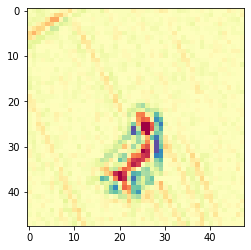

Epoch 233/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6741 - acc: 0.9749 - val_loss: 1.8794 - val_acc: 0.9252

Epoch 00233: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8793526475674638, 'val_acc': 0.9252336242488611, 'loss': 1.6740673182485843, 'acc': 0.974870668238212, 'lr': 1e-06}


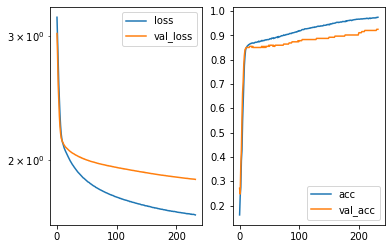

Predicted cell: Cells Probability: [[0.9076204]]
True Cell type: Cells
x [[0.5414466]]
True positional value x 0.7083333333333334
y [[0.5534454]]
True positional value y 0.5


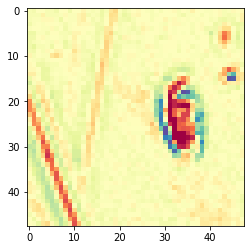

Epoch 234/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6739 - acc: 0.9736 - val_loss: 1.8786 - val_acc: 0.9252

Epoch 00234: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8786335047160354, 'val_acc': 0.9252336242488611, 'loss': 1.67392175134164, 'acc': 0.9736388371653908, 'lr': 1e-06}


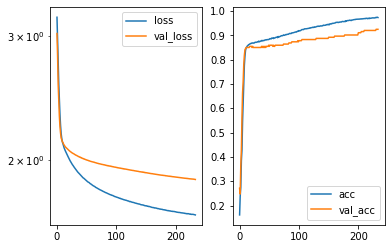

Predicted cell: Cells Probability: [[0.9687505]]
True Cell type: Cells
x [[0.42728052]]
True positional value x 0.5
y [[0.48222497]]
True positional value y 0.5


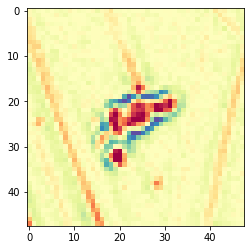

Epoch 235/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6732 - acc: 0.9744 - val_loss: 1.8787 - val_acc: 0.9252

Epoch 00235: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8786954267002711, 'val_acc': 0.9252336242488611, 'loss': 1.673172088907575, 'acc': 0.9743779321026996, 'lr': 1e-06}


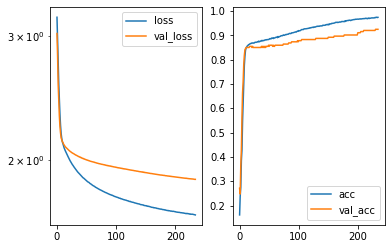

Predicted cell: Cells Probability: [[0.9434421]]
True Cell type: Cells
x [[0.21617396]]
True positional value x 0.2916666666666667
y [[0.5846781]]
True positional value y 0.7083333333333334


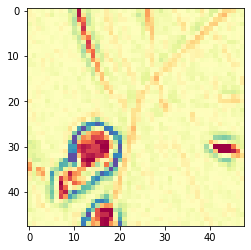

Epoch 236/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6730 - acc: 0.9741 - val_loss: 1.8780 - val_acc: 0.9252

Epoch 00236: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8779614952123054, 'val_acc': 0.9252336242488611, 'loss': 1.6730123727184765, 'acc': 0.9741315709513729, 'lr': 1e-06}


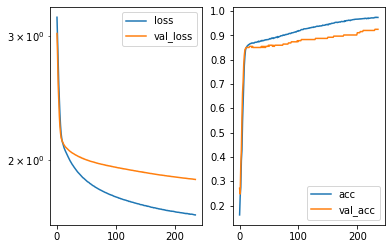

Predicted cell: Normal Probability: [[0.6009342]]
True Cell type: Normal
x [[0.75561863]]
True positional value x 0.5
y [[0.09246852]]
True positional value y 0.5


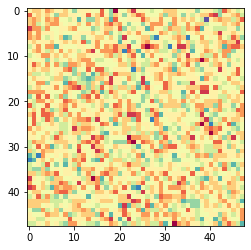

Epoch 237/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6730 - acc: 0.9751 - val_loss: 1.8777 - val_acc: 0.9252

Epoch 00237: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8776651709993308, 'val_acc': 0.9252336242488611, 'loss': 1.673007370715483, 'acc': 0.9751170323558205, 'lr': 1e-06}


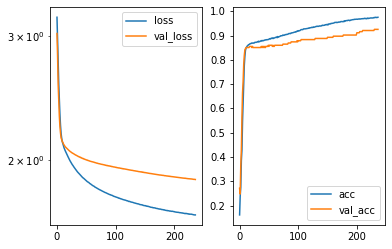

Predicted cell: Cells Probability: [[0.991088]]
True Cell type: Cells
x [[0.6533458]]
True positional value x 0.7083333333333334
y [[0.33082283]]
True positional value y 0.2916666666666667


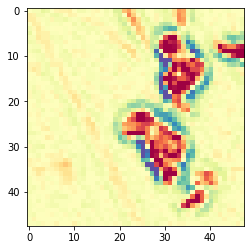

Epoch 238/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6721 - acc: 0.9756 - val_loss: 1.8770 - val_acc: 0.9252

Epoch 00238: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8769975766957363, 'val_acc': 0.9252336242488611, 'loss': 1.6721137748559904, 'acc': 0.9756097670228765, 'lr': 1e-06}


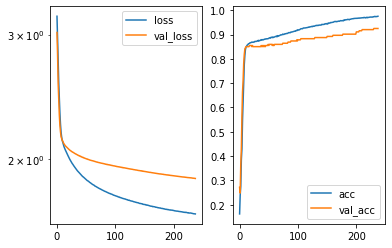

Predicted cell: Cells Probability: [[0.7567021]]
True Cell type: Cells
x [[0.6019676]]
True positional value x 0.7083333333333334
y [[0.25789174]]
True positional value y 0.2916666666666667


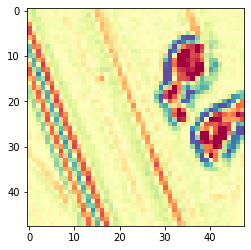

Epoch 239/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6719 - acc: 0.9759 - val_loss: 1.8771 - val_acc: 0.9252

Epoch 00239: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8770633813376738, 'val_acc': 0.9252336242488611, 'loss': 1.6718861333957944, 'acc': 0.9758561331669549, 'lr': 1e-06}


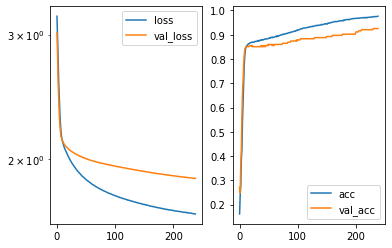

Predicted cell: Cells Probability: [[0.7162456]]
True Cell type: Cells
x [[0.8557139]]
True positional value x 0.7083333333333334
y [[0.6127481]]
True positional value y 0.7083333333333334


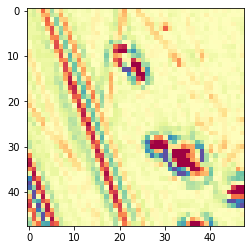

Epoch 240/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6720 - acc: 0.9751 - val_loss: 1.8763 - val_acc: 0.9252

Epoch 00240: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.876272094583957, 'val_acc': 0.9252336242488611, 'loss': 1.671986195864305, 'acc': 0.9751170379212702, 'lr': 1e-06}


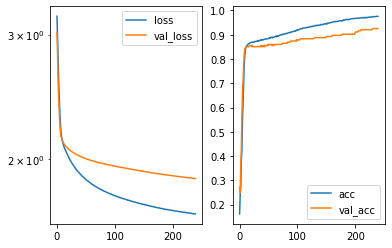

Predicted cell: Cells Probability: [[0.9045529]]
True Cell type: Cells
x [[0.18779683]]
True positional value x 0.2916666666666667
y [[0.27569428]]
True positional value y 0.2916666666666667


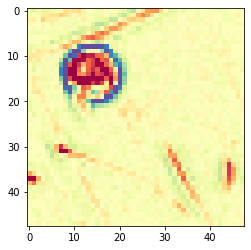

Epoch 241/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6716 - acc: 0.9759 - val_loss: 1.8766 - val_acc: 0.9252

Epoch 00241: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.876590775552197, 'val_acc': 0.9252336242488611, 'loss': 1.6715500134498387, 'acc': 0.9758561346354112, 'lr': 1e-06}


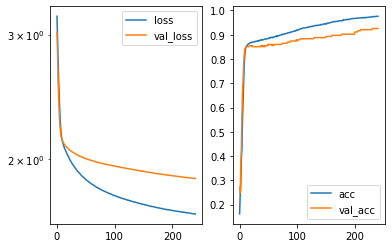

Predicted cell: Cells Probability: [[0.9872923]]
True Cell type: Cells
x [[0.4872709]]
True positional value x 0.5
y [[0.7586636]]
True positional value y 0.7083333333333334


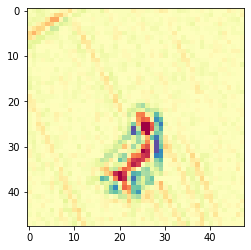

Epoch 242/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6715 - acc: 0.9756 - val_loss: 1.8753 - val_acc: 0.9252

Epoch 00242: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8753373567189011, 'val_acc': 0.9252336242488611, 'loss': 1.6715106759114817, 'acc': 0.9756097678745812, 'lr': 1e-06}


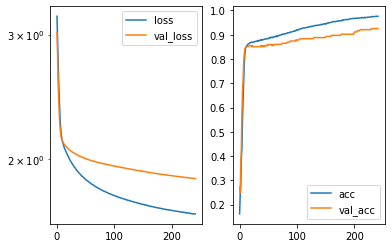

Predicted cell: Cells Probability: [[0.9661648]]
True Cell type: Cells
x [[0.76564264]]
True positional value x 0.7083333333333334
y [[0.45552006]]
True positional value y 0.5


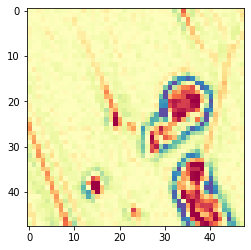

Epoch 243/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6702 - acc: 0.9749 - val_loss: 1.8754 - val_acc: 0.9252

Epoch 00243: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8753839374702668, 'val_acc': 0.9252336242488611, 'loss': 1.670182540781482, 'acc': 0.9748706656096751, 'lr': 1e-06}


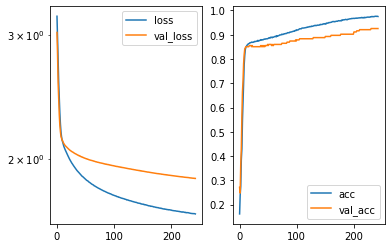

Predicted cell: Cells Probability: [[0.96636647]]
True Cell type: Cells
x [[0.40614608]]
True positional value x 0.7083333333333334
y [[0.35450643]]
True positional value y 0.2916666666666667


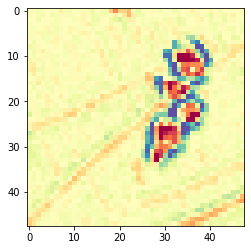

Epoch 244/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6698 - acc: 0.9746 - val_loss: 1.8748 - val_acc: 0.9299

Epoch 00244: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8747633762448748, 'val_acc': 0.9299065448413385, 'loss': 1.6697829008454848, 'acc': 0.9746242973803887, 'lr': 1e-06}


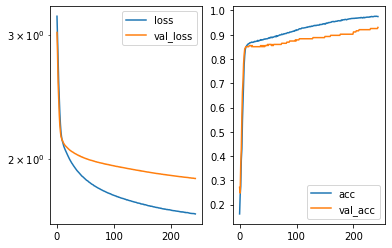

Predicted cell: Cells Probability: [[0.96932733]]
True Cell type: Cells
x [[0.5164519]]
True positional value x 0.5
y [[0.50422496]]
True positional value y 0.2916666666666667


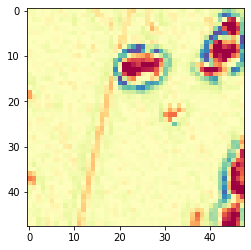

Epoch 245/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6701 - acc: 0.9759 - val_loss: 1.8743 - val_acc: 0.9299

Epoch 00245: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8743134313654677, 'val_acc': 0.9299065448413385, 'loss': 1.6701432514672327, 'acc': 0.9758561270141226, 'lr': 1e-06}


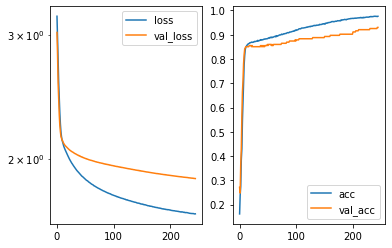

Predicted cell: Cells Probability: [[0.9308212]]
True Cell type: Cells
x [[0.2653246]]
True positional value x 0.5
y [[0.68330544]]
True positional value y 0.7083333333333334


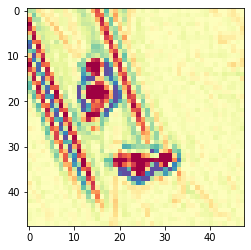

Epoch 246/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6690 - acc: 0.9766 - val_loss: 1.8745 - val_acc: 0.9299

Epoch 00246: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8745093401347366, 'val_acc': 0.9299065448413385, 'loss': 1.6690416387455544, 'acc': 0.9765952336990824, 'lr': 1e-06}


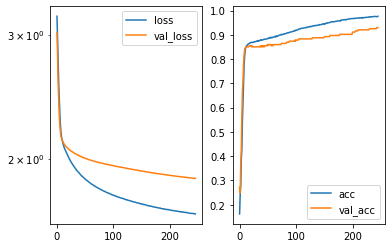

Predicted cell: Cells Probability: [[0.99244905]]
True Cell type: Cells
x [[0.49022776]]
True positional value x 0.5
y [[0.43309045]]
True positional value y 0.5


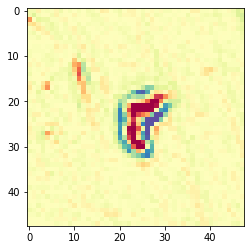

Epoch 247/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6680 - acc: 0.9763 - val_loss: 1.8734 - val_acc: 0.9299

Epoch 00247: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.873408599434612, 'val_acc': 0.9299065448413385, 'loss': 1.668028424925098, 'acc': 0.976348863149635, 'lr': 1e-06}


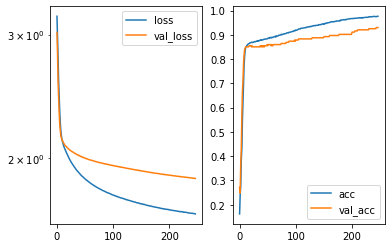

Predicted cell: Cells Probability: [[0.939943]]
True Cell type: Cells
x [[0.5939092]]
True positional value x 0.7083333333333334
y [[0.6821726]]
True positional value y 0.7083333333333334


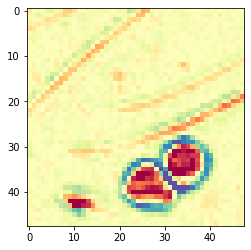

Epoch 248/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6686 - acc: 0.9766 - val_loss: 1.8741 - val_acc: 0.9299

Epoch 00248: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8740988858392305, 'val_acc': 0.9299065448413385, 'loss': 1.668561623054762, 'acc': 0.9765952281336328, 'lr': 1e-06}


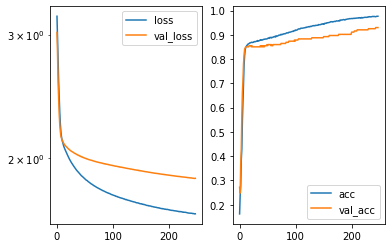

Predicted cell: Cells Probability: [[0.991955]]
True Cell type: Cells
x [[0.7167997]]
True positional value x 0.7083333333333334
y [[0.20478284]]
True positional value y 0.2916666666666667


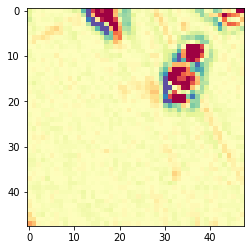

Epoch 249/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6688 - acc: 0.9761 - val_loss: 1.8726 - val_acc: 0.9299

Epoch 00249: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8726166898959151, 'val_acc': 0.9299065448413385, 'loss': 1.6688025244999238, 'acc': 0.9761024934665767, 'lr': 1e-06}


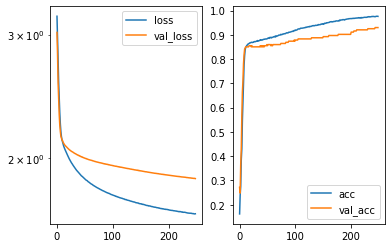

Predicted cell: Cells Probability: [[0.98020554]]
True Cell type: Cells
x [[0.18440777]]
True positional value x 0.2916666666666667
y [[0.24595591]]
True positional value y 0.2916666666666667


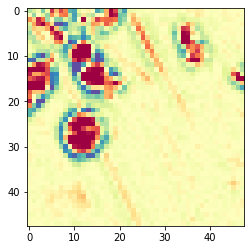

Epoch 250/250
4059/4059 [==============================] - 9s 2ms/step - loss: 1.6681 - acc: 0.9768 - val_loss: 1.8731 - val_acc: 0.9299

Epoch 00250: saving model to /home/sancere/Kepler/Incucyte/model/incucyteresnetd38SMALL.h5
{'val_loss': 1.8731025579933809, 'val_acc': 0.9299065448413385, 'loss': 1.6681469909426436, 'acc': 0.9768415948797782, 'lr': 1e-06}


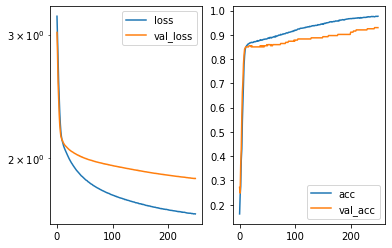

Predicted cell: Cells Probability: [[0.61211133]]
True Cell type: Normal
x [[0.4262816]]
True positional value x 0.5
y [[0.4670636]]
True positional value y 0.5


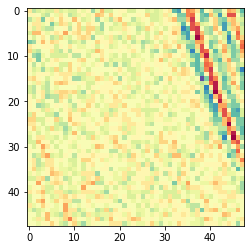

In [5]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
